<a href="https://colab.research.google.com/github/lagrom/Hw12_Regression/blob/main/HW12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Instituto Tecnológico y de Estudios Superiores de Occidente</center></h1>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/d/db/Logo_ITESO_normal.jpg" width="200">

## **Masters in Data Science**

### Convex Optimization

<h3>HW 12: Regression in R</h3></center>

**Professor:**

> Dr. Juan Diego Sánchez Torres

**Team:**


- Luis Alfonso Guerrero Montaño
- Juan Pablo Acevedo Robles
- Roberto Carlos Vázquez Flores
- Alex Medina Anguiano
- Angel Wong Dan

# Problem 1: Warm up

After reading Chapters 3 and 4, solve the following exercises
in a step-by-step fashion:
1. (Section 3.7) 3.8, 3.9, and 4.10.



## Section 3.7

### Exercise 8 

This question involves the use of simple linear regression on the Auto
data set.

In [ ]:
install.packages("ISLR")


The downloaded binary packages are in
	/var/folders/qz/n1m12d9n5bd0zyrmpkz4_qzm0000gn/T//RtmpZQtJSl/downloaded_packages


In [ ]:
library(ISLR)
auto_df = ISLR::Auto

In [ ]:
head(auto_df)

mpg cylinders displacement horsepower weight acceleration year origin
1 18  8         307          130        3504   12.0         70   1     
2 15  8         350          165        3693   11.5         70   1     
3 18  8         318          150        3436   11.0         70   1     
4 16  8         304          150        3433   12.0         70   1     
5 17  8         302          140        3449   10.5         70   1     
6 15  8         429          198        4341   10.0         70   1     
  name                     
1 chevrolet chevelle malibu
2 buick skylark 320        
3 plymouth satellite       
4 amc rebel sst            
5 ford torino              
6 ford galaxie 500

* **(a)** Use the `lm()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the
`summary()` function to print the results. Comment on the output.


In [ ]:
lm.fit = lm(mpg ~ horsepower, data = auto_df)
summary(lm.fit)


Call:
lm(formula = mpg ~ horsepower, data = auto_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


For example:
* 
  + **i.** Is there a relationship between the predictor and the response?
  > The p-values for the regression coefficients are 
nearly zero. This implies statistical significance, which in turn mean that there is a relationship.

  + **ii.** How strong is the relationship between the predictor and the response?
  > The $R^{2}$ value indicates that about 61% of the variation in the response variable (mpg) is due to the predictor variable (horsepower).

  + **iii.** Is the relationship between the predictor and the response positive or negative?
  > The regression coefficient for ‘horsepower’ is negative. Hence, the relationship is negative.

  + **iv.** What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?
  > Mpg associated with a horsepower of 98:

In [ ]:
predict(lm.fit, data.frame(horsepower = c(98)), interval = "confidence")

fit      lwr      upr     
1 24.46708 23.97308 24.96108

* 
 + 
> Associated 95% confidence and prediction intervals:











In [ ]:
predict(lm.fit, data.frame(horsepower = c(98)), interval = "prediction")

fit      lwr     upr     
1 24.46708 14.8094 34.12476

* **(b)** Plot the response and the predictor. Use the `abline()` function to display the least squares regression line.

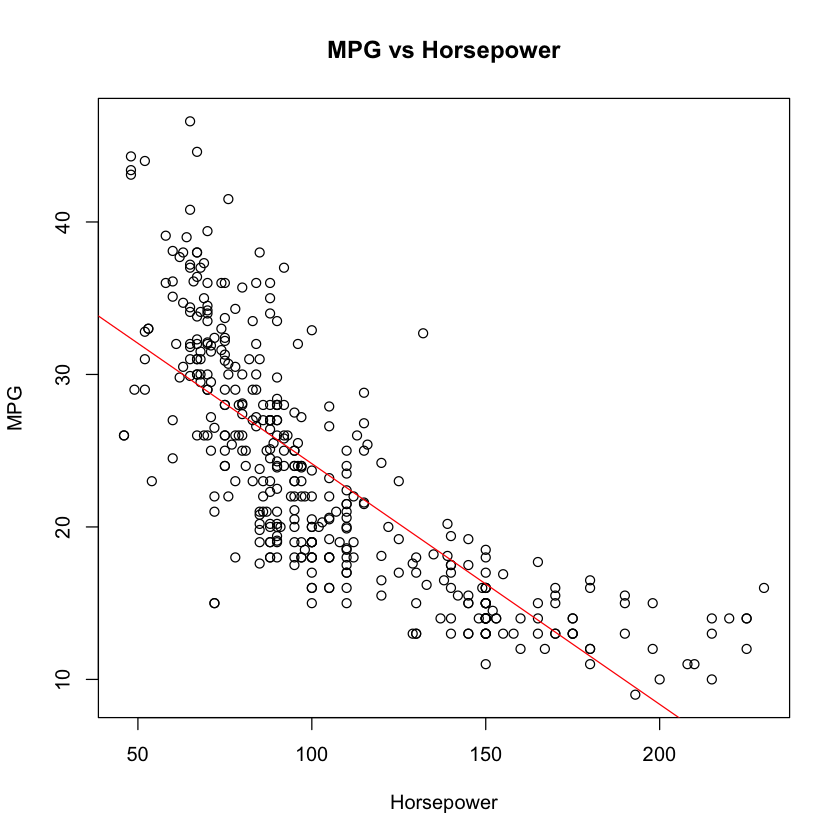

In [ ]:
plot(auto_df$mpg ~ auto_df$horsepower, main = "MPG vs Horsepower", xlab = "Horsepower", ylab = "MPG")
abline(coef = coef(lm.fit), col = "red")

* **(c)** Use the `plot()` function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

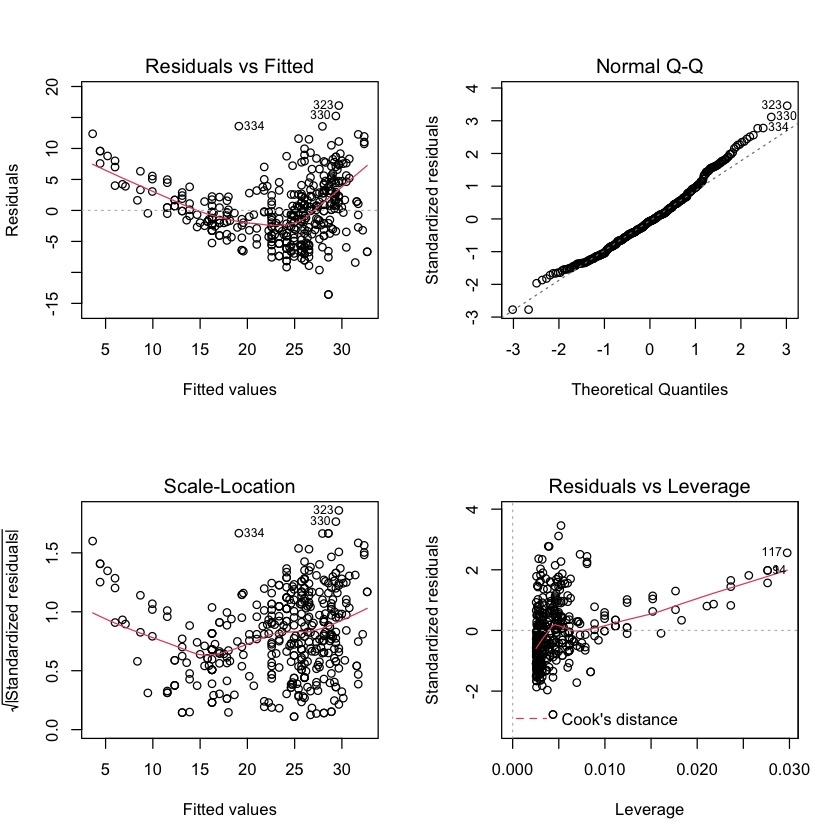

In [ ]:
 par(mfrow = c(2, 2))
 plot(lm.fit)

### Exercise 9

This question involves the use of multiple linear regression on the
`Auto` data set.

* **(a)** Produce a scatterplot matrix which includes all of the variables in the data set.

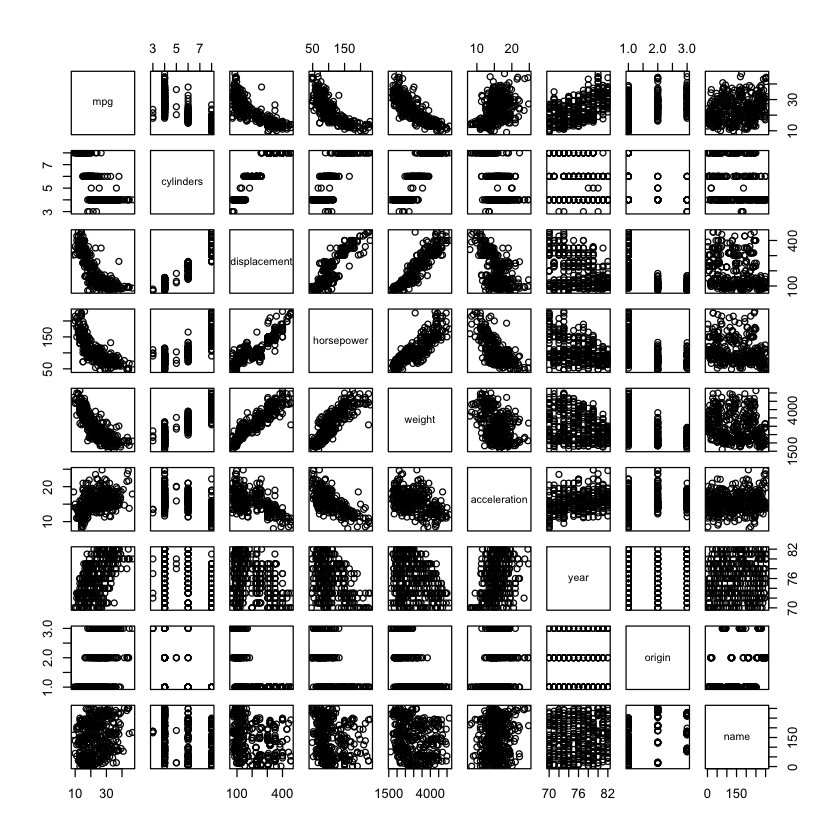

In [ ]:
pairs(auto_df)

* **(b)** Compute the matrix of correlations between the variables using the function `cor()`. You will need to exclude the `name` variable, which is qualitative.

In [ ]:
  cor(Auto[, names(Auto) != "name"])

mpg        cylinders  displacement horsepower weight    
mpg           1.0000000 -0.7776175 -0.8051269   -0.7784268 -0.8322442
cylinders    -0.7776175  1.0000000  0.9508233    0.8429834  0.8975273
displacement -0.8051269  0.9508233  1.0000000    0.8972570  0.9329944
horsepower   -0.7784268  0.8429834  0.8972570    1.0000000  0.8645377
weight       -0.8322442  0.8975273  0.9329944    0.8645377  1.0000000
acceleration  0.4233285 -0.5046834 -0.5438005   -0.6891955 -0.4168392
year          0.5805410 -0.3456474 -0.3698552   -0.4163615 -0.3091199
origin        0.5652088 -0.5689316 -0.6145351   -0.4551715 -0.5850054
             acceleration year       origin    
mpg           0.4233285    0.5805410  0.5652088
cylinders    -0.5046834   -0.3456474 -0.5689316
displacement -0.5438005   -0.3698552 -0.6145351
horsepower   -0.6891955   -0.4163615 -0.4551715
weight       -0.4168392   -0.3091199 -0.5850054
acceleration  1.0000000    0.2903161  0.2127458
year          0.2903161    1.0000000  0.1815277
origin        0.2127458    0.1815277  1.0000000

* **(c)** Use the `lm()` function to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Use the `summary()` function to print the results.

In [ ]:
model = lm(mpg ~ .-name, data = auto_df)
summary(model)


Call:
lm(formula = mpg ~ . - name, data = auto_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


Comment on the output. For instance:  
* 
    + **i.** Is there a relationship between the predictors and the response?
    > Yes, there is. R-squared value implies that 82% of the changes in the response can be explained by the predictors in this regression model.

    + **ii.** Which predictors appear to have a statistically significant relationship to the response?
    > Displacement, weight, year, origin.

    + **iii.** What does the coefficient for the year variable suggest?
    > The mpg value increases with each year that passes. Specifically, mpg increase by 1.43 each year.


* **(d)** Use the `plot()` function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?  


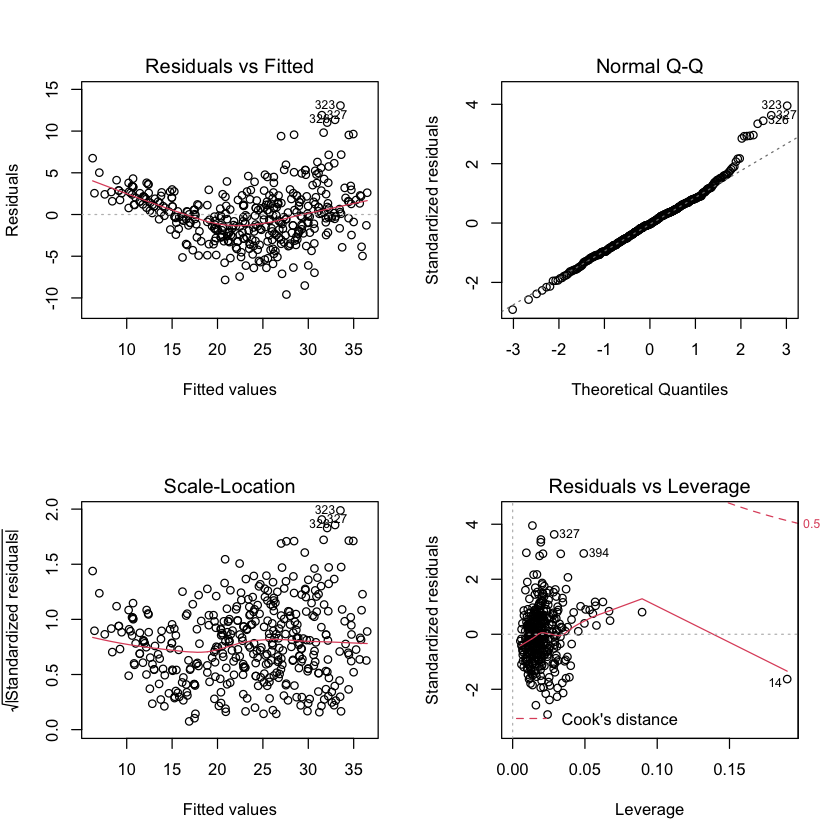

In [ ]:
par(mfrow = c(2, 2))
plot(model)

> 1. The first graph shows that there is a non-linear relationship.  
> 2. The second graph shows that the residuals are normally distributed but skewed.  
> 3. The last graph shows that there are no leverage points. However, there on observation that stands out as a potential leverage point (the number 14).

* **(e)** Use the `*` and `:` symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically
significant?



In [ ]:
model = lm(mpg ~ .-name+displacement:weight, data = auto_df)
summary(model)


Call:
lm(formula = mpg ~ . - name + displacement:weight, data = auto_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9027 -1.8092 -0.0946  1.5549 12.1687 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -5.389e+00  4.301e+00  -1.253   0.2109    
cylinders            1.175e-01  2.943e-01   0.399   0.6899    
displacement        -6.837e-02  1.104e-02  -6.193 1.52e-09 ***
horsepower          -3.280e-02  1.238e-02  -2.649   0.0084 ** 
weight              -1.064e-02  7.136e-04 -14.915  < 2e-16 ***
acceleration         6.724e-02  8.805e-02   0.764   0.4455    
year                 7.852e-01  4.553e-02  17.246  < 2e-16 ***
origin               5.610e-01  2.622e-01   2.139   0.0331 *  
displacement:weight  2.269e-05  2.257e-06  10.054  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.964 on 383 degrees of freedom
Multiple R-squared:  0.8588,	Adjusted R-squared:  0.8558 
F-st

In [ ]:
model = lm(mpg ~ .-name+displacement:cylinders+displacement:weight+acceleration:horsepower, data = auto_df)
summary(model)


Call:
lm(formula = mpg ~ . - name + displacement:cylinders + displacement:weight + 
    acceleration:horsepower, data = auto_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3344 -1.6333  0.0188  1.4740 11.9723 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -1.725e+01  5.328e+00  -3.237  0.00131 ** 
cylinders                6.354e-01  6.106e-01   1.041  0.29870    
displacement            -6.805e-02  1.337e-02  -5.088 5.68e-07 ***
horsepower               6.026e-02  2.601e-02   2.317  0.02105 *  
weight                  -8.864e-03  1.097e-03  -8.084 8.43e-15 ***
acceleration             6.257e-01  1.592e-01   3.931  0.00010 ***
year                     7.845e-01  4.470e-02  17.549  < 2e-16 ***
origin                   4.668e-01  2.595e-01   1.799  0.07284 .  
cylinders:displacement  -1.337e-03  2.726e-03  -0.490  0.62415    
displacement:weight      2.071e-05  3.638e-06   5.694 2.49e-08 ***
horsepower:acceleration 

In [ ]:
model = lm(mpg ~ .-name+displacement:cylinders+displacement:weight+year:origin+acceleration:horsepower, data = auto_df)
summary(model)


Call:
lm(formula = mpg ~ . - name + displacement:cylinders + displacement:weight + 
    year:origin + acceleration:horsepower, data = auto_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6504 -1.6476  0.0381  1.4254 12.7893 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              5.287e+00  9.074e+00   0.583 0.560429    
cylinders                4.249e-01  6.079e-01   0.699 0.485011    
displacement            -7.322e-02  1.334e-02  -5.490 7.38e-08 ***
horsepower               5.252e-02  2.586e-02   2.031 0.042913 *  
weight                  -8.689e-03  1.086e-03  -7.998 1.54e-14 ***
acceleration             5.796e-01  1.582e-01   3.665 0.000283 ***
year                     5.116e-01  9.976e-02   5.129 4.66e-07 ***
origin                  -1.220e+01  4.161e+00  -2.933 0.003560 ** 
cylinders:displacement  -4.368e-04  2.712e-03  -0.161 0.872156    
displacement:weight      1.992e-05  3.608e-06   5.522 6.21e-08 ***
year:origi

In [ ]:
model = lm(mpg ~ .-name-cylinders-acceleration+year:origin+displacement:weight+
                  displacement:weight+acceleration:horsepower+acceleration:weight, data = auto_df)
summary(model)


Call:
lm(formula = mpg ~ . - name - cylinders - acceleration + year:origin + 
    displacement:weight + displacement:weight + acceleration:horsepower + 
    acceleration:weight, data = auto_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5074 -1.6324  0.0599  1.4577 12.7376 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.868e+01  7.796e+00   2.396 0.017051 *  
displacement            -7.794e-02  9.026e-03  -8.636  < 2e-16 ***
horsepower               8.719e-02  3.167e-02   2.753 0.006183 ** 
weight                  -1.350e-02  1.287e-03 -10.490  < 2e-16 ***
year                     4.911e-01  9.825e-02   4.998 8.83e-07 ***
origin                  -1.262e+01  4.109e+00  -3.071 0.002288 ** 
year:origin              1.686e-01  5.277e-02   3.195 0.001516 ** 
displacement:weight      2.253e-05  2.184e-06  10.312  < 2e-16 ***
horsepower:acceleration -9.164e-03  2.222e-03  -4.125 4.56e-05 ***
weight:acceleration      2

* 
    >From all the 4 models, the last model is the only one with all variables being significant.

* **(f)** Try a few different transformations of the variables, such as $log(x)$, $\sqrt{x}$
$x$, $x^2$. Comment on your findings.

### Exercise 10

This question should be answered using the `Carseats` data set.

* **(a)** Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [ ]:
carseats_df = ISLR::Carseats
head(carseats_df)

Sales CompPrice Income Advertising Population Price ShelveLoc Age Education
1  9.50 138        73    11          276        120   Bad       42  17       
2 11.22 111        48    16          260         83   Good      65  10       
3 10.06 113        35    10          269         80   Medium    59  12       
4  7.40 117       100     4          466         97   Medium    55  14       
5  4.15 141        64     3          340        128   Bad       38  13       
6 10.81 124       113    13          501         72   Bad       78  16       
  Urban US 
1 Yes   Yes
2 Yes   Yes
3 Yes   Yes
4 Yes   Yes
5 Yes   No 
6 No    Yes

In [ ]:
lm.fit = lm(Sales ~ Price+Urban+US, data = carseats_df)
summary(lm.fit)


Call:
lm(formula = Sales ~ Price + Urban + US, data = carseats_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16



* **(b)** Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!
>When price increases by 1000 and other predictors are held constant, sales decrease by 54.459 unit sales. In otherwords, when price increases by $1000, the number of carseats sold decrease by 54,459.  
A store’s sale is not affected by whether or not it is in a Urban area.  
A store in the US sales 1200 more carseats (in average) than a store that is abroad.

* **(c)** Write out the model in equation form, being careful to handle the qualitative variables properly.
>$Sales = 13.043 - 0.054 Price - 0.021UrbanYes + 1.20 USYes$

* **(d)** For which of the predictors can you reject the null hypothesis $H_0$ : βj = 0?
>The predictor ‘Urban’. Its p-value is not statistically significant with a value of 0.936.


* **(e)** On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.


In [ ]:
lm.fit2 = lm(Sales ~ Price+US, data = carseats_df)
summary(lm.fit2)


Call:
lm(formula = Sales ~ Price + US, data = carseats_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16



* **(f)** How well do the models in (a) and (e) fit the data?
>Based on their respective R-square values(in summary tables), these two models are mediocre (only 24% change in response explained).


* **(g)** Using the model from (e), obtain 95 % confidence intervals for
the coefficient(s).


In [ ]:
confint(lm.fit2)

2.5 %       97.5 %     
(Intercept) 11.79032020 14.27126531
Price       -0.06475984 -0.04419543
USYes        0.69151957  1.70776632

* **(h)** Is there evidence of outliers or high leverage observations in the
model from (e)?

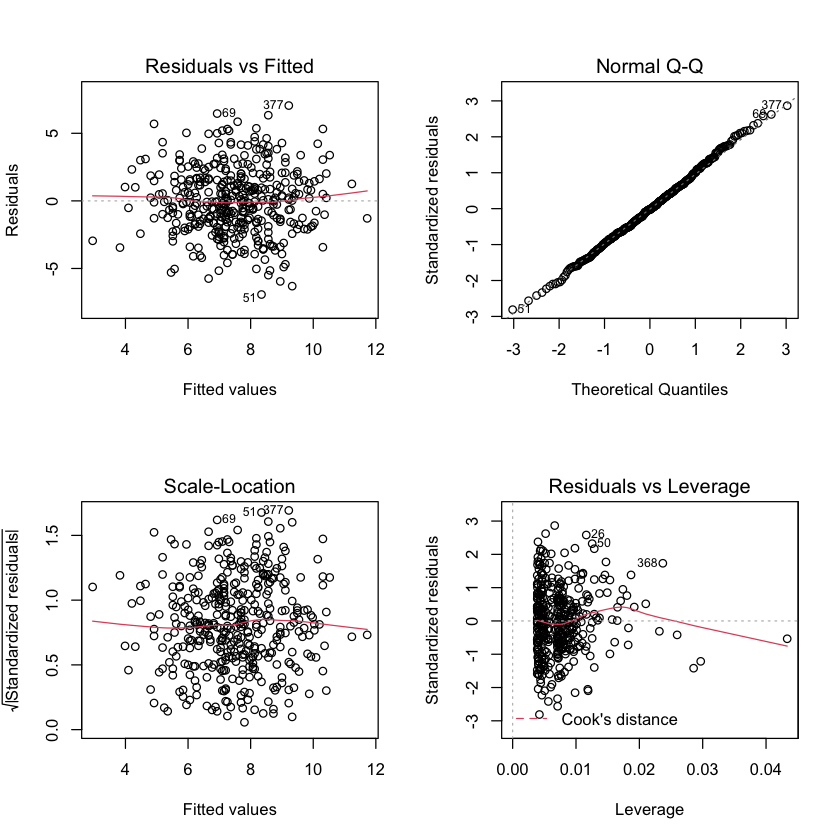

In [ ]:
par(mfrow = c(2, 2))
plot(lm.fit2)

* 
>Based on the Normal.q-q pot and the Residuals vs Leverage plot, there are no evidence of such points.

## Section 4.7
2. (Section 4.7) 4.10 and 4.11.



### Exercise 10

This question should be answered using the `Weekly` data set, which is part of the `ISLR2` package. This data is similar in nature to the `Smarket` data from this chapter’s lab, except that it contains 1, 089
weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

* **(a)** Produce some numerical and graphical summaries of the `Weekly` data. Do there appear to be any patterns?

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

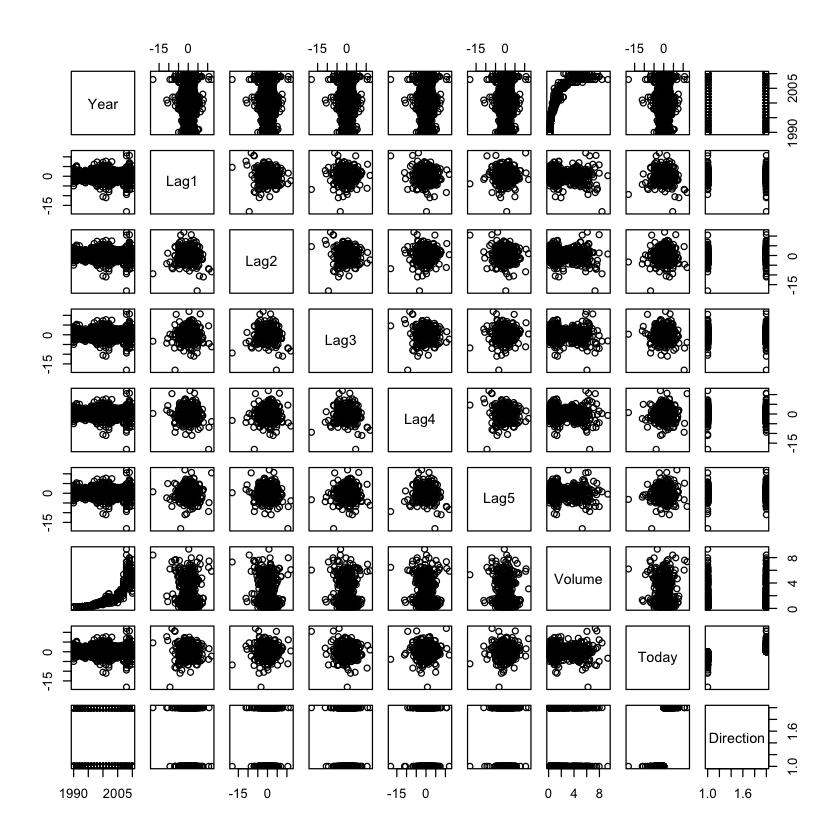

In [ ]:
weekly_df = ISLR::Weekly
summary(weekly_df)
pairs(weekly_df)

* 
>The data shows 44.4% “Down” weekly returns and 55.6% “Up” weekly returns. No other patterns.

In [ ]:
484 / 1089

[1] 0.4444444

In [ ]:
cor(weekly_df[, -9])

Year        Lag1         Lag2        Lag3        Lag4        
Year    1.00000000 -0.032289274 -0.03339001 -0.03000649 -0.031127923
Lag1   -0.03228927  1.000000000 -0.07485305  0.05863568 -0.071273876
Lag2   -0.03339001 -0.074853051  1.00000000 -0.07572091  0.058381535
Lag3   -0.03000649  0.058635682 -0.07572091  1.00000000 -0.075395865
Lag4   -0.03112792 -0.071273876  0.05838153 -0.07539587  1.000000000
Lag5   -0.03051910 -0.008183096 -0.07249948  0.06065717 -0.075675027
Volume  0.84194162 -0.064951313 -0.08551314 -0.06928771 -0.061074617
Today  -0.03245989 -0.075031842  0.05916672 -0.07124364 -0.007825873
       Lag5         Volume      Today       
Year   -0.030519101  0.84194162 -0.032459894
Lag1   -0.008183096 -0.06495131 -0.075031842
Lag2   -0.072499482 -0.08551314  0.059166717
Lag3    0.060657175 -0.06928771 -0.071243639
Lag4   -0.075675027 -0.06107462 -0.007825873
Lag5    1.000000000 -0.05851741  0.011012698
Volume -0.058517414  1.00000000 -0.033077783
Today   0.011012698 -0.03307778  1.000000000

* 
>The only substantial positive correlation is between “Year” and “Volume”. In addition, the correlations between the “Lag” variables and today’s returns are very low, it does not show any unusual patterns.

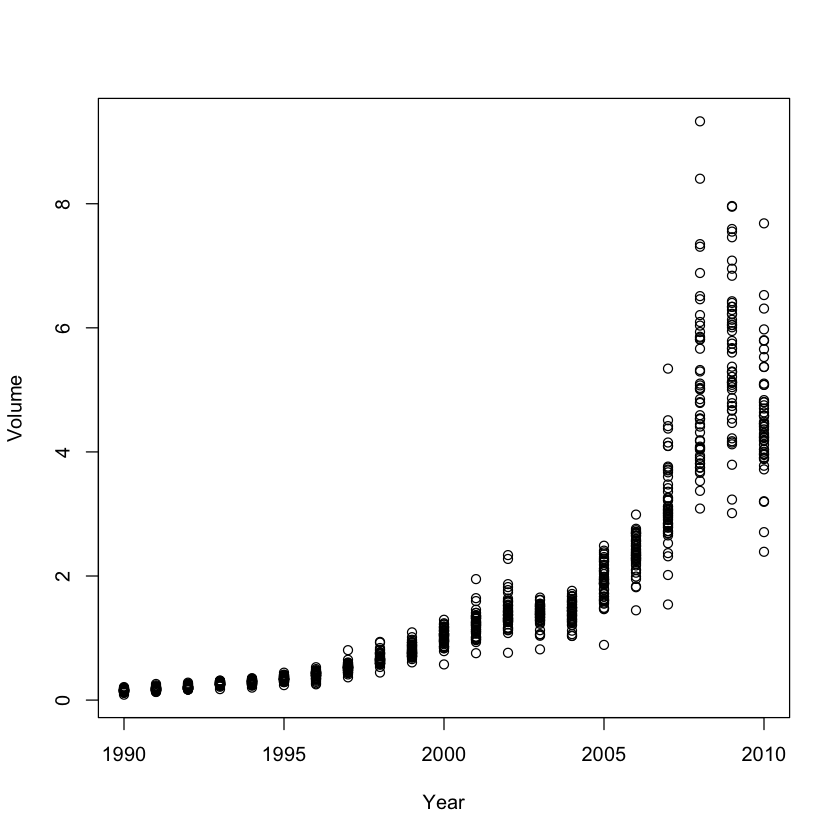

In [ ]:
attach(weekly_df)
plot(Year, Volume)

* **(b)** Use the full data set to perform a logistic regression with `Direction` as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [ ]:
glm.fit = glm(Direction ~ . -Today, data = weekly_df, family = binomial)
summary(glm.fit)$coef

Estimate     Std. Error  z value     Pr(>|z|) 
(Intercept) 17.225822231 37.89052190  0.45462088 0.6493820
Year        -0.008499918  0.01899083 -0.44758011 0.6544563
Lag1        -0.040687571  0.02644652 -1.53848459 0.1239302
Lag2         0.059448637  0.02697031  2.20422531 0.0275085
Lag3        -0.015477987  0.02670309 -0.57963289 0.5621622
Lag4        -0.027316278  0.02648478 -1.03139539 0.3023554
Lag5        -0.014022185  0.02640947 -0.53095285 0.5954515
Volume       0.003256253  0.06883640  0.04730423 0.9622708

* 
>It would seem that “Lag2” is the only predictor statistically significant as its p-value is less than 0.05.

* **(c)** Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [ ]:
glm.probs = predict(glm.fit, weekly_df)
glm.pred = rep("Down", 1089)
glm.pred[glm.probs > .5] = "Up"
table(glm.pred, Direction)

        Direction
glm.pred Down  Up
    Down  464 562
    Up     20  43

* 
>The percentage of correct predictions on the training data is 56.38. For weeks when the market goes down, the model is right only 11.5702479% of the time.

* **(d)** Now fit the logistic regression model using a training data period from 1990 to 2008, with `Lag2` as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

In [ ]:
train = (Year < 2009)
Weekly.2009.2010 = Weekly[!train,] 
Direction.2009.2010 = Direction[!train] # test y

glm.fit = glm(Direction ~ Lag2, data = weekly_df, family = binomial, subset = train)
summary(glm.fit)$coef

Estimate   Std. Error z value  Pr(>|z|)  
(Intercept) 0.20325743 0.06428036 3.162046 0.00156665
Lag2        0.05809527 0.02870446 2.023911 0.04297934

In [ ]:
glm.probs = predict(glm.fit, Weekly.2009.2010, type = "response")
glm.pred = rep("Down", length(glm.probs))
glm.pred[glm.probs > .5] = "Up"
table(glm.pred, Direction.2009.2010)

        Direction.2009.2010
glm.pred Down Up
    Down    9  5
    Up     34 56

* **(e)** Repeat (d) using LDA.

In [ ]:
library(MASS)

lda.fit = lda(Direction ~ Lag2, data = weekly_df, subset = train)
lda.fit

Call:
lda(Direction ~ Lag2, data = weekly_df, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

In [ ]:
lda.pred = predict(lda.fit, Weekly.2009.2010)
lda.class = lda.pred$class
table(lda.class, Direction.2009.2010)

         Direction.2009.2010
lda.class Down Up
     Down    9  5
     Up     34 56

* **(f)** Repeat (d) using QDA.

In [ ]:
qda.fit = qda(Direction ~ Lag2, data = weekly_df, subset = train)
qda.fit

Call:
qda(Direction ~ Lag2, data = weekly_df, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

In [ ]:
qda.pred = predict(qda.fit, Weekly.2009.2010)
qda.class = qda.pred$class
table(qda.class, Direction.2009.2010)

         Direction.2009.2010
qda.class Down Up
     Down    0  0
     Up     43 61


* **(g)** Repeat (d) using KNN with K = 1.

In [ ]:
library(class)
train.X <- as.matrix(Lag2[train])
test.X <- as.matrix(Lag2[!train])
train.Direction = Direction[train]
set.seed(1)

knn.pred = knn(train.X, test.X, train.Direction, k = 1)
table(knn.pred, Direction.2009.2010)

        Direction.2009.2010
knn.pred Down Up
    Down   21 30
    Up     22 31

* **(h)** Repeat (d) using naive Bayes.

In [ ]:
#install.packages("e1071")

In [ ]:
library(e1071)

In [ ]:
nb.fit = e1071::naiveBayes(Direction ~ Lag2, data = weekly_df, subset = train)
nb.fit


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
     Down        Up 
0.4477157 0.5522843 

Conditional probabilities:
      Lag2
Y             [,1]     [,2]
  Down -0.03568254 2.199504
  Up    0.26036581 2.317485


In [ ]:
nb.pred = predict(nb.fit, Weekly.2009.2010, type="class")
nb.class = nb.pred
table(nb.class, Direction.2009.2010)

        Direction.2009.2010
nb.class Down Up
    Down    0  0
    Up     43 61

* **(i)** Which of these methods appears to provide the best results on this data?
>If we compare the overall test error rates, we see that logistic regression and LDA have the minimum error rates, followed by QDA and KNN with K = 1.

* **(j)** Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

### Exercise 11

In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set.

* **(a)** Create a binary variable, `mpg01`, that contains a 1 if `mpg` contains a value above its median, and a 0 if `mpg` contains a value below its median. You can compute the median using the `median()` function. Note you may find it helpful to use the `data.frame()` function to create a single data set containing both `mpg01` and the other Auto variables.

In [ ]:
mpg01 = rep(0, length(auto_df$mpg))
mpg01[auto_df$mpg > median(auto_df$mpg)] = 1
Auto = data.frame(Auto, mpg01)
head(Auto)

mpg cylinders displacement horsepower weight acceleration year origin
1 18  8         307          130        3504   12.0         70   1     
2 15  8         350          165        3693   11.5         70   1     
3 18  8         318          150        3436   11.0         70   1     
4 16  8         304          150        3433   12.0         70   1     
5 17  8         302          140        3449   10.5         70   1     
6 15  8         429          198        4341   10.0         70   1     
  name                      mpg01
1 chevrolet chevelle malibu 0    
2 buick skylark 320         0    
3 plymouth satellite        0    
4 amc rebel sst             0    
5 ford torino               0    
6 ford galaxie 500          0

* **(b)** Explore the data graphically in order to investigate the association between `mpg01` and the other features. Which of the other features seem most likely to be useful in predicting `mpg01`? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

In [ ]:
cor(Auto[, -9])

mpg        cylinders  displacement horsepower weight    
mpg           1.0000000 -0.7776175 -0.8051269   -0.7784268 -0.8322442
cylinders    -0.7776175  1.0000000  0.9508233    0.8429834  0.8975273
displacement -0.8051269  0.9508233  1.0000000    0.8972570  0.9329944
horsepower   -0.7784268  0.8429834  0.8972570    1.0000000  0.8645377
weight       -0.8322442  0.8975273  0.9329944    0.8645377  1.0000000
acceleration  0.4233285 -0.5046834 -0.5438005   -0.6891955 -0.4168392
year          0.5805410 -0.3456474 -0.3698552   -0.4163615 -0.3091199
origin        0.5652088 -0.5689316 -0.6145351   -0.4551715 -0.5850054
mpg01         0.8369392 -0.7591939 -0.7534766   -0.6670526 -0.7577566
             acceleration year       origin     mpg01     
mpg           0.4233285    0.5805410  0.5652088  0.8369392
cylinders    -0.5046834   -0.3456474 -0.5689316 -0.7591939
displacement -0.5438005   -0.3698552 -0.6145351 -0.7534766
horsepower   -0.6891955   -0.4163615 -0.4551715 -0.6670526
weight       -0.4168392   -0.3091199 -0.5850054 -0.7577566
acceleration  1.0000000    0.2903161  0.2127458  0.3468215
year          0.2903161    1.0000000  0.1815277  0.4299042
origin        0.2127458    0.1815277  1.0000000  0.5136984
mpg01         0.3468215    0.4299042  0.5136984  1.0000000

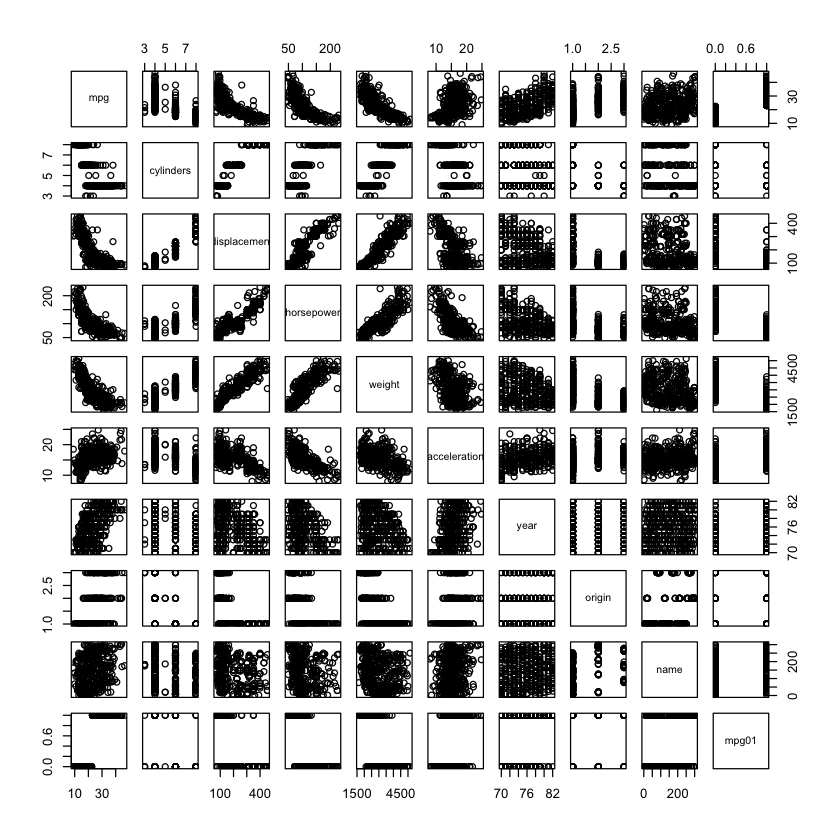

In [ ]:
pairs(Auto)

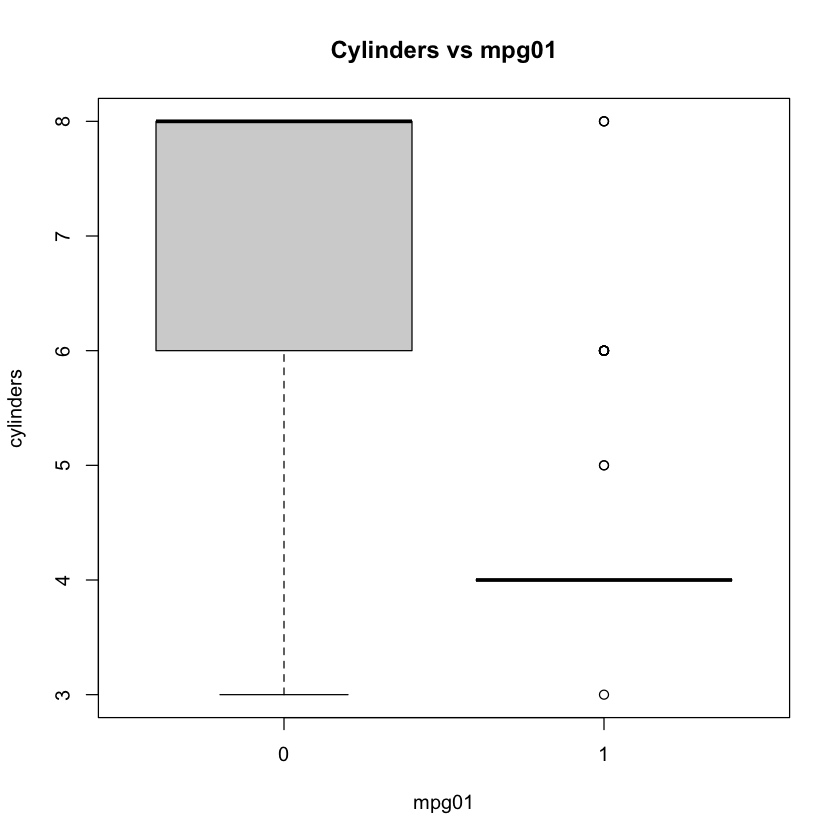

In [ ]:
boxplot(cylinders ~ mpg01, data = Auto, main = "Cylinders vs mpg01")

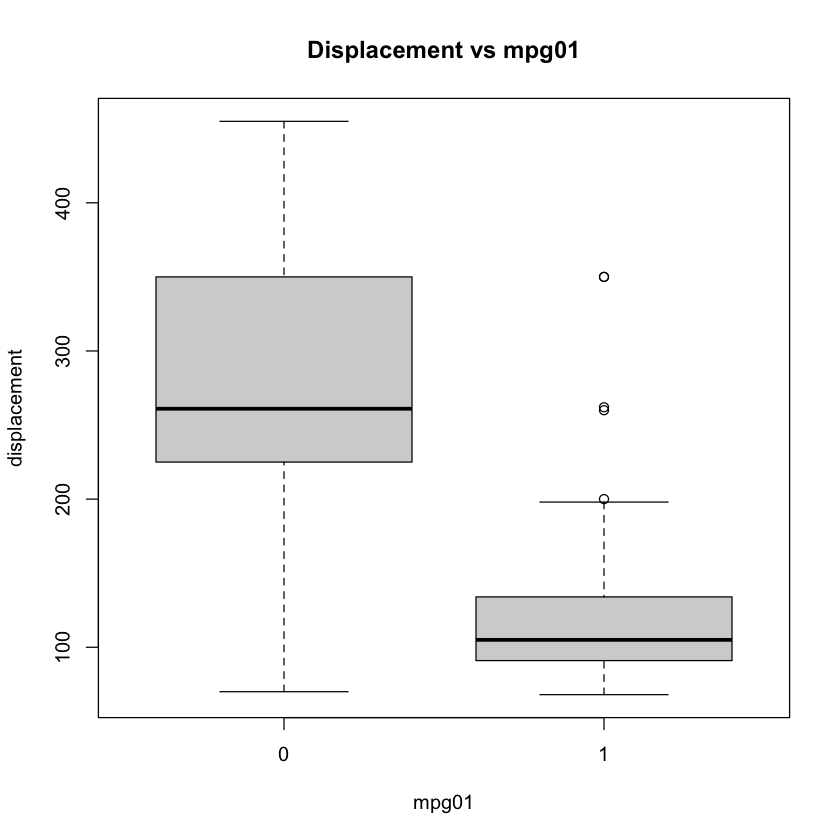

In [ ]:
boxplot(displacement ~ mpg01, data = Auto, main = "Displacement vs mpg01")

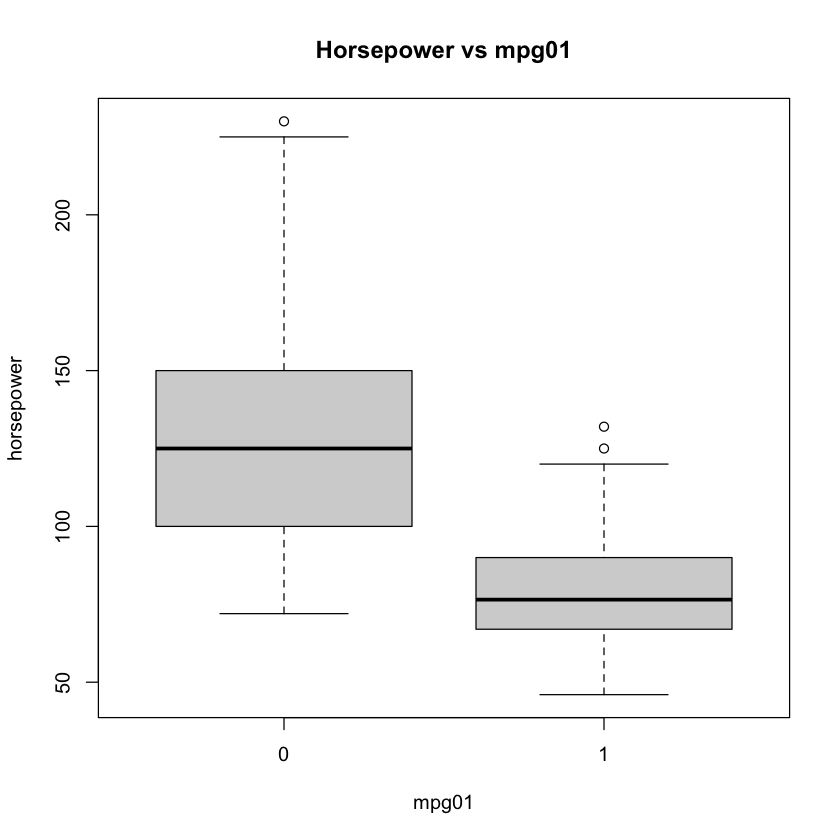

In [ ]:
boxplot(horsepower ~ mpg01, data = Auto, main = "Horsepower vs mpg01")

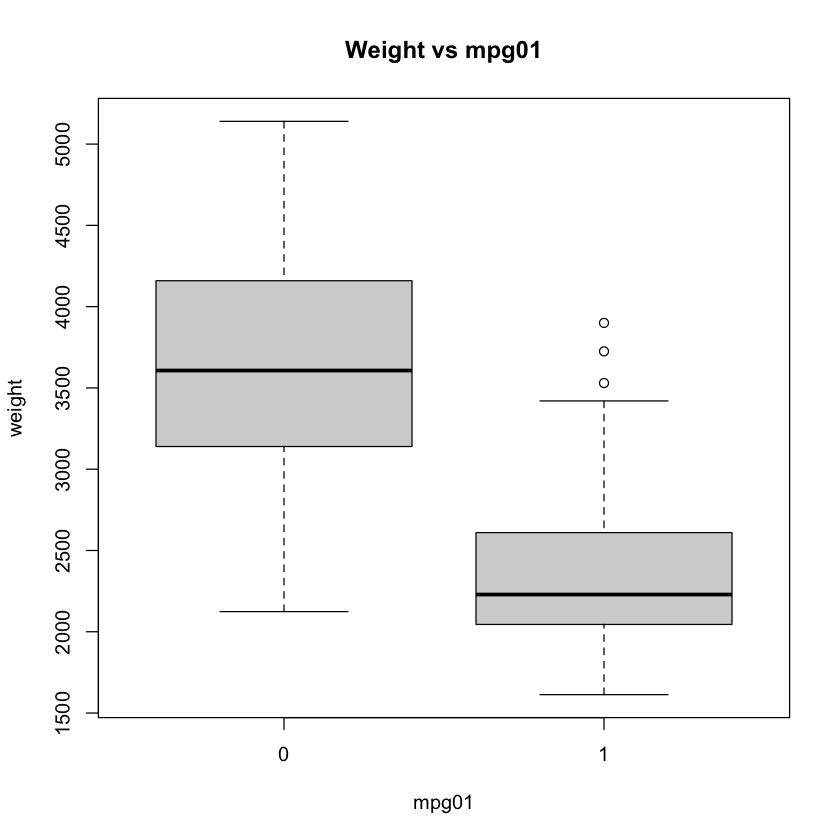

In [ ]:
boxplot(weight ~ mpg01, data = Auto, main = "Weight vs mpg01")

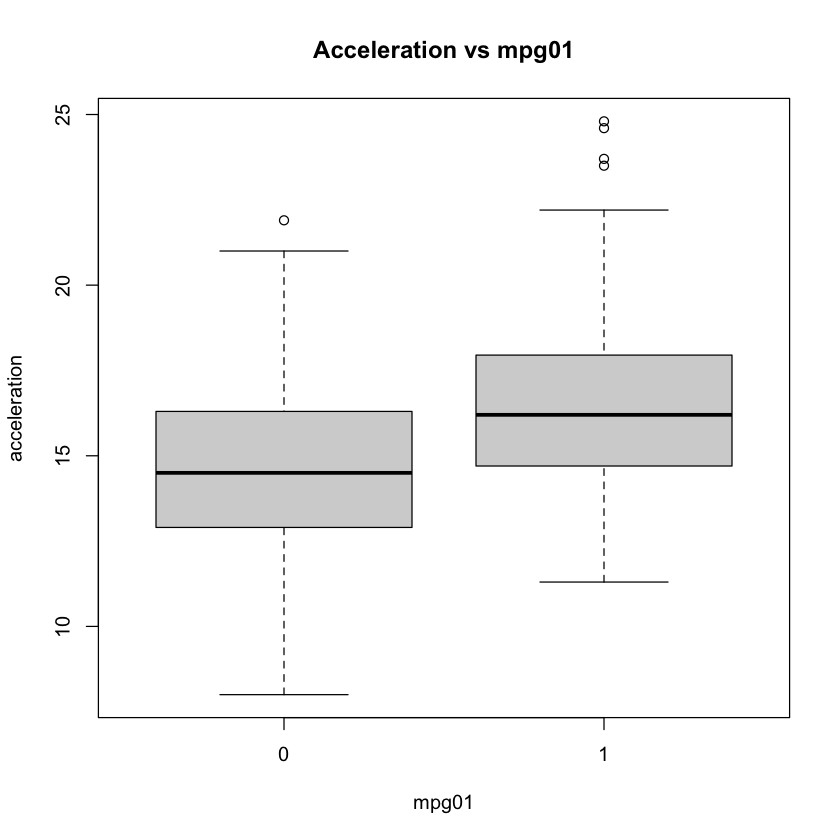

In [ ]:
boxplot(acceleration ~ mpg01, data = Auto, main = "Acceleration vs mpg01")

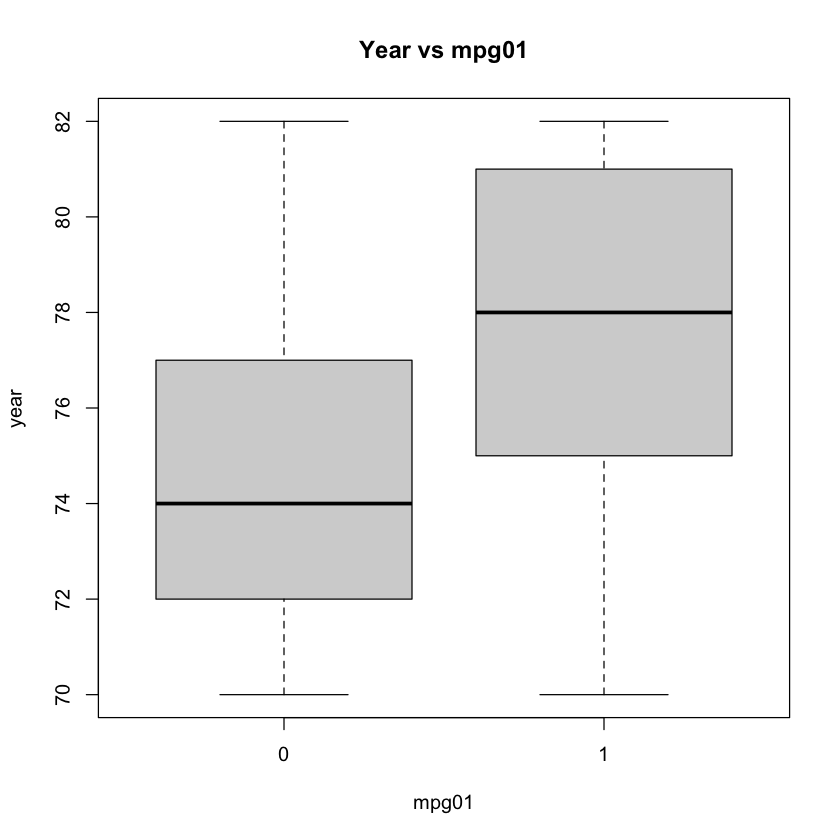

In [ ]:
boxplot(year ~ mpg01, data = Auto, main = "Year vs mpg01")

* **(c)** Split the data into a training set and a test set.

In [ ]:
train = (auto_df$year%%2 == 1) 
Auto.train = Auto[train, ]
Auto.test = Auto[!train, ]

* **(d)** Perform LDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [ ]:
lda.fit = lda(mpg01 ~ cylinders + displacement + horsepower + weight, data = Auto, subset = train)
lda.fit

Call:
lda(mpg01 ~ cylinders + displacement + horsepower + weight, data = Auto, 
    subset = train)

Prior probabilities of groups:
        0         1 
0.5494505 0.4505495 

Group means:
  cylinders displacement horsepower   weight
0  6.720000     274.5200  127.20000 3635.360
1  4.329268     121.2317   80.08537 2362.573

Coefficients of linear discriminants:
                       LD1
cylinders    -0.2236481608
displacement -0.0049304166
horsepower    0.0046318546
weight       -0.0008259969

In [ ]:
mpg01.test = mpg01[!train]
lda.pred = predict(lda.fit, Auto.test)
lda.class = lda.pred$class
table(lda.class, mpg01.test)

         mpg01.test
lda.class   0   1
        0  81   3
        1  15 111

* 
>The test error rate is:

In [ ]:
mean(lda.class != mpg01.test)

[1] 0.08571429

* **(e)** Perform QDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [ ]:
qda.fit = qda(mpg01 ~ cylinders + displacement + horsepower + weight, data = Auto, subset = train)
qda.fit

Call:
qda(mpg01 ~ cylinders + displacement + horsepower + weight, data = Auto, 
    subset = train)

Prior probabilities of groups:
        0         1 
0.5494505 0.4505495 

Group means:
  cylinders displacement horsepower   weight
0  6.720000     274.5200  127.20000 3635.360
1  4.329268     121.2317   80.08537 2362.573

In [ ]:
qda.pred = predict(qda.fit, Auto.test)
qda.class = qda.pred$class
table(qda.class, mpg01.test)

         mpg01.test
qda.class   0   1
        0  81   6
        1  15 108

In [ ]:
mean(qda.class != mpg01.test)

[1] 0.1

* **(f)** Perform logistic regression on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [ ]:
glm.fit = glm(mpg01 ~ cylinders + displacement + horsepower + weight, data = Auto, subset = train, family = binomial)
summary(glm.fit)$coef

Estimate     Std. Error   z value   Pr(>|z|)    
(Intercept)   8.478359668 2.0804121653  4.075327 4.594975e-05
cylinders     0.538769052 0.4339011589  1.241686 2.143524e-01
displacement -0.020747232 0.0105174024 -1.972657 4.853461e-02
horsepower   -0.041461625 0.0178661386 -2.320682 2.030402e-02
weight       -0.001327385 0.0008948719 -1.483324 1.379884e-01

In [ ]:
glm.probs = predict(glm.fit, Auto.test, type = "response")
glm.pred = rep(0, length(glm.probs))
glm.pred[glm.probs > .5] = 1
table(glm.pred, mpg01.test)

        mpg01.test
glm.pred   0   1
       0  83   7
       1  13 107

In [ ]:
mean(glm.pred != mpg01.test)

[1] 0.0952381

* **(g)** Perform naive Bayes on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [ ]:
nb.fit = e1071::naiveBayes(mpg01 ~ cylinders + displacement + horsepower + weight, data = Auto, subset = train)
nb.fit


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         1 
0.5494505 0.4505495 

Conditional probabilities:
   cylinders
Y       [,1]      [,2]
  0 6.720000 1.4289927
  1 4.329268 0.9169848

   displacement
Y       [,1]     [,2]
  0 274.5200 90.30761
  1 121.2317 48.84602

   horsepower
Y        [,1]     [,2]
  0 127.20000 36.18359
  1  80.08537 16.88684

   weight
Y       [,1]     [,2]
  0 3635.360 726.2133
  1 2362.573 471.3271


In [ ]:
nb.pred = predict(nb.fit, Auto.test)
nb.class = nb.pred
table(nb.class,mpg01.test)

        mpg01.test
nb.class   0   1
       0  82   4
       1  14 110

In [ ]:
mean(nb.class != mpg01.test)

[1] 0.08571429

* **(h)** Perform KNN on the training data, with several values of K, in order to predict `mpg01`. Use only the variables that seemed most associated with `mpg01` in (b). What test errors do you obtain? 
Which value of K seems to perform the best on this data set?

In [ ]:
train.X = cbind(auto_df$cylinders, auto_df$displacement, auto_df$horsepower, auto_df$weight)[train, ]
test.X = cbind(auto_df$cylinders, auto_df$displacement, auto_df$horsepower,auto_df$weight)[!train, ]
train.mpg01 = mpg01[train]
set.seed(1)
knn.pred = knn(train.X, test.X, train.mpg01, k = 1)
table(knn.pred, mpg01.test )

        mpg01.test
knn.pred  0  1
       0 84 22
       1 12 92

In [ ]:
mean(knn.pred != mpg01.test)

[1] 0.1619048

(How to mount google drive)

In [ ]:
#*****Working as of Friday 13th November 2020

#Go this URL https://co lab.to/r whilst signed into colab and that should do it.

#You can check if R in Runtime -> Change runtime type, but it should already be setup.

#enter image description here

#To mount google drive:

#install.packages("googledrive")
#library("googledrive")

#if (file.exists("/usr/local/lib/python3.6/dist-packages/google/colab/_ipython.py")){ 
#  install.packages("R.utils")
#  library("R.utils")
#  library("httr")
#  my_check <- function() {return(TRUE)}
#  reassignInPackage("is_interactive", pkgName = "httr", my_check)
#  options(rlang_interactive=TRUE)
#}    

#And authenticate google drive

#drive_auth(use_oob = TRUE, cache = TRUE)

# Problem 2: Application Problems

Note that some details are missing for all the following examples, the problems lack a complete explanation, and the code
may need adequate comments. In this form, you must present
a proper mathematical formulation, a brief background of
the problem (and its bibliographical references) and, a much
better explanation.



## The olsrr Package

In [ ]:
# Install release version from CRAN
#install.packages("olsrr", verbose=TRUE)

# Install development version from GitHub
# install.packages("devtools")
#devtools::install_github("rsquaredacademy/olsrr")

#install.packages('olsrr')
#tar("library.tar.gz", "/usr/local/lib/R/site-library")

### (a) Introduction to olsrr

In [ ]:
library(olsrr)


Attaching package: 'olsrr'


The following object is masked from 'package:MASS':

    cement


The following object is masked from 'package:datasets':

    rivers




#### Regression

In [ ]:
ols_regress(mpg ~ disp + hp + wt + qsec, data = mtcars)

                         Model Summary                          
---------------------------------------------------------------
R                       0.914       RMSE                 2.409 
R-Squared               0.835       MSE                  6.875 
Adj. R-Squared          0.811       Coef. Var           13.051 
Pred R-Squared          0.771       AIC                159.070 
MAE                     1.858       SBC                167.864 
---------------------------------------------------------------
 RMSE: Root Mean Square Error 
 MSE: Mean Square Error 
 MAE: Mean Absolute Error 
 AIC: Akaike Information Criteria 
 SBC: Schwarz Bayesian Criteria 

                               ANOVA                                 
--------------------------------------------------------------------
                Sum of                                              
               Squares        DF    Mean Square      F         Sig. 
----------------------------------------------------------

In the presence of interaction terms in the model, the predictors are scaled and centered before computing the standardized betas. `ols_regress()` will detect interaction terms automatically but in case you have created a new variable instead of using the inline function *, you can indicate the presence of interaction terms by setting iterm to TRUE.

#### Residual vs Fitted Values Plot

Plot to detect non-linearity, unequal error variances, and outliers.

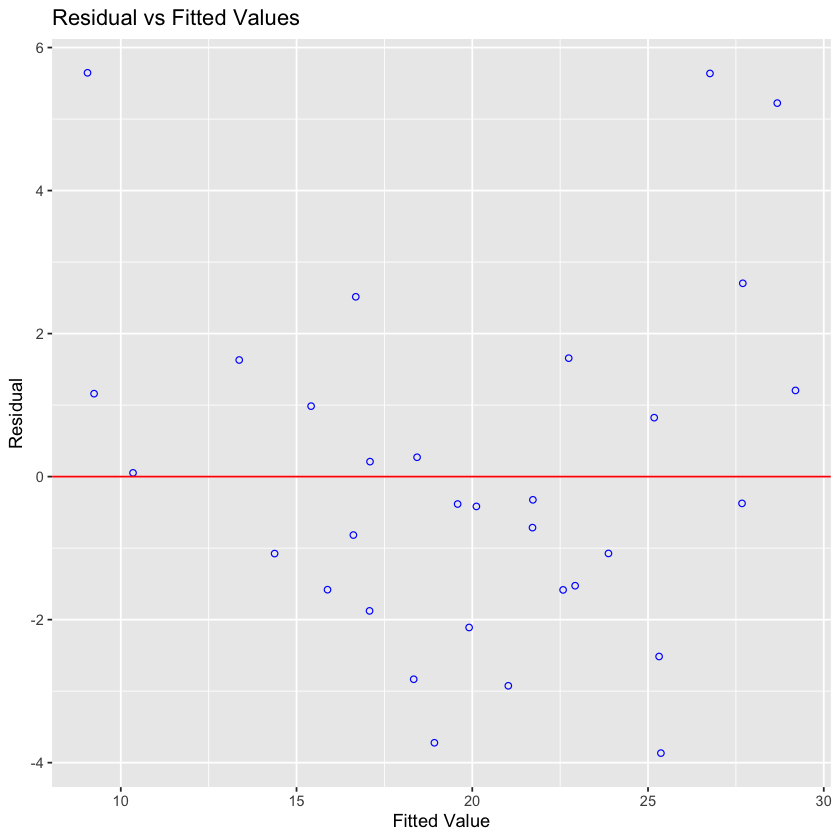

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_resid_fit(model)


#### DFBETAs Panel

DFBETAs measure the difference in each parameter estimate with and without the influential observation. dfbetas_panel creates plots to detect influential observations using DFBETAs.

[[1]]
NULL


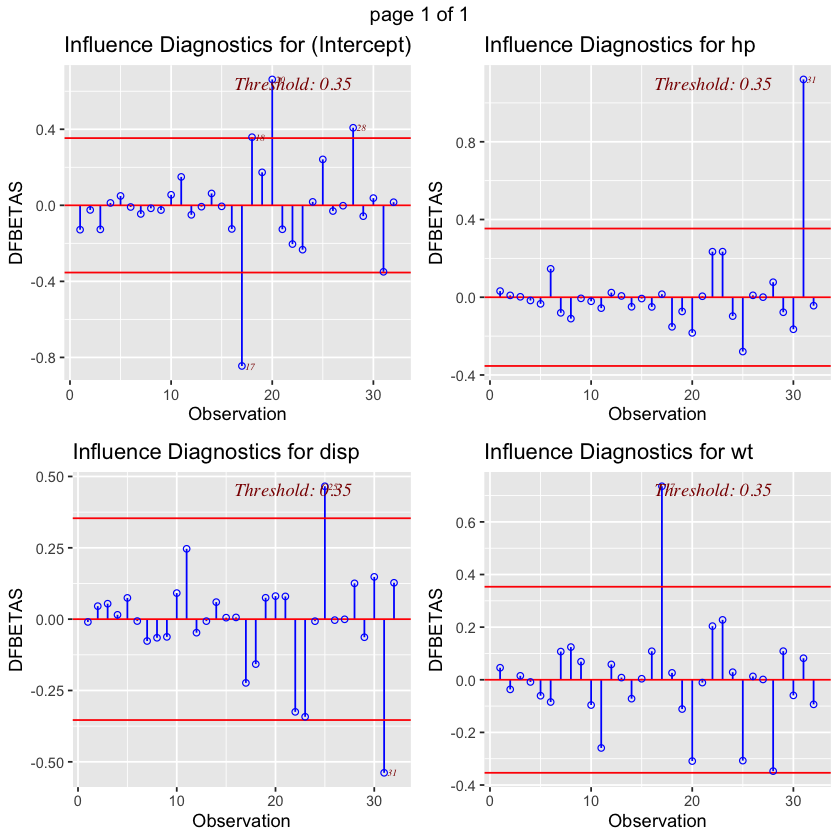

In [ ]:
model <- lm(mpg ~ disp + hp + wt, data = mtcars)
ols_plot_dfbetas(model)

#### Residual Fit Spread Plot

Plot to detect non-linearity, influential observations and outliers.

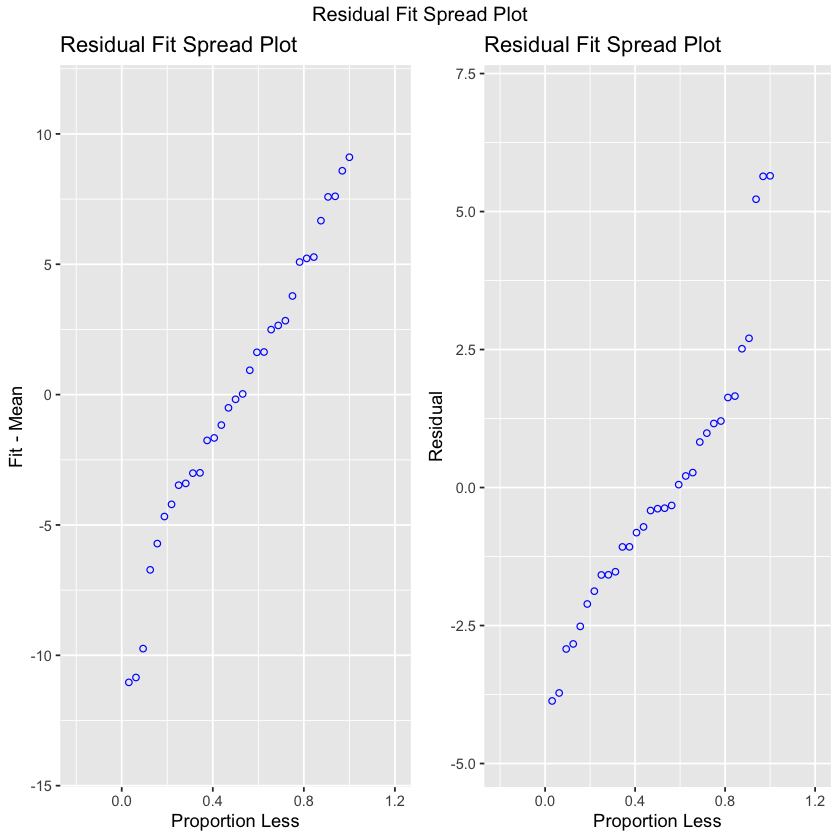

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_resid_fit_spread(model)

#### Breusch Pagan Test

Breusch Pagan test is used to test for herteroskedasticity (non-constant error variance). It tests whether the variance of the errors from a regression is dependent on the values of the independent variables. It is a $χ^2$ test.

In [ ]:
model <- lm(mpg ~ disp + hp + wt + drat, data = mtcars)
ols_test_breusch_pagan(model)


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

             Data               
 -------------------------------
 Response : mpg 
 Variables: fitted values of mpg 

       Test Summary         
 ---------------------------
 DF            =    1 
 Chi2          =    1.429672 
 Prob > Chi2   =    0.231818 

#### Collinearity Diagnostics

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_coll_diag(model)

Tolerance and Variance Inflation Factor
---------------------------------------
  Variables Tolerance      VIF
1      disp 0.1252279 7.985439
2        hp 0.1935450 5.166758
3        wt 0.1445726 6.916942
4      qsec 0.3191708 3.133119


Eigenvalue and Condition Index
------------------------------
   Eigenvalue Condition Index   intercept        disp          hp           wt
1 4.721487187        1.000000 0.000123237 0.001132468 0.001413094 0.0005253393
2 0.216562203        4.669260 0.002617424 0.036811051 0.027751289 0.0002096014
3 0.050416837        9.677242 0.001656551 0.120881424 0.392366164 0.0377028008
4 0.010104757       21.616057 0.025805998 0.777260487 0.059594623 0.7017528428
5 0.001429017       57.480524 0.969796790 0.063914571 0.518874831 0.2598094157
          qsec
1 0.0001277169
2 0.0046789491
3 0.0001952599
4 0.0024577686
5 0.9925403056

#### Stepwise Regression

Build regression model from a set of candidate predictor variables by entering and removing predictors based on p values, in a stepwise manner until there is no variable left to enter or remove any more.

##### Variable Selection

In [ ]:
# stepwise regression
model <- lm(y ~ ., data = surgical)
ols_step_both_p(model)



                                Stepwise Summary                                
------------------------------------------------------------------------------
Step    Variable             AIC        SBC       SBIC        R2       Adj. R2 
------------------------------------------------------------------------------
 0      Base Model         802.606    806.584    646.794    0.00000    0.00000 
 1      liver_test (+)     771.875    777.842    616.009    0.45454    0.44405 
 2      alc_heavy (+)      761.439    769.395    605.506    0.56674    0.54975 
 3      enzyme_test (+)    750.509    760.454    595.297    0.65900    0.63854 
 4      pindex (+)         735.715    747.649    582.943    0.75015    0.72975 
 5      bcs (+)            730.620    744.543    579.638    0.78091    0.75808 
------------------------------------------------------------------------------

Final Model Output 
------------------

                           Model Summary                            
----------

##### Plot

[[1]]
NULL


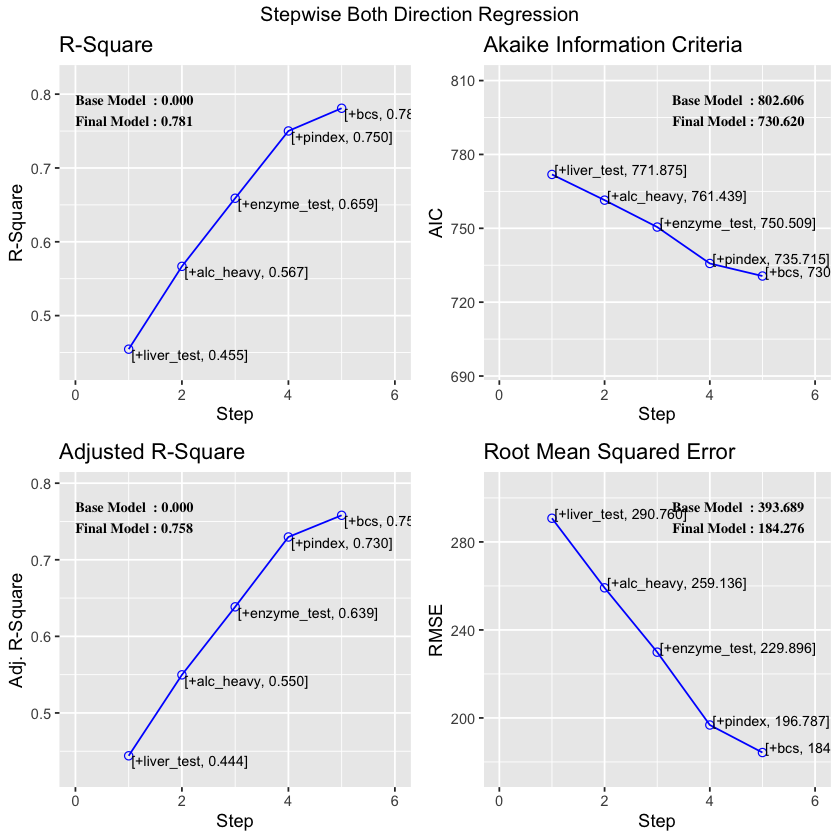

In [ ]:
model <- lm(y ~ ., data = surgical)
k <- ols_step_both_p(model)
plot(k)

#### Stepwise AIC Backward Regression

Build regression model from a set of candidate predictor variables by removing predictors based on Akaike Information Criteria, in a stepwise manner until there is no variable left to remove any more.

##### Variable Selection

In [ ]:
# stepwise aic backward regression
model <- lm(y ~ ., data = surgical)
k <- ols_step_backward_aic(model)
k



                             Stepwise Summary                              
-------------------------------------------------------------------------
Step    Variable        AIC        SBC       SBIC        R2       Adj. R2 
-------------------------------------------------------------------------
 0      Full Model    736.390    756.280    586.665    0.78184    0.74305 
 1      alc_mod       734.407    752.308    583.884    0.78177    0.74856 
 2      gender        732.494    748.406    581.290    0.78142    0.75351 
 3      age           730.620    744.543    578.844    0.78091    0.75808 
-------------------------------------------------------------------------

Final Model Output 
------------------

                           Model Summary                            
-------------------------------------------------------------------
R                         0.884       RMSE                 184.276 
R-Squared                 0.781       MSE                38202.426 
Adj. R-Squa

##### Plot

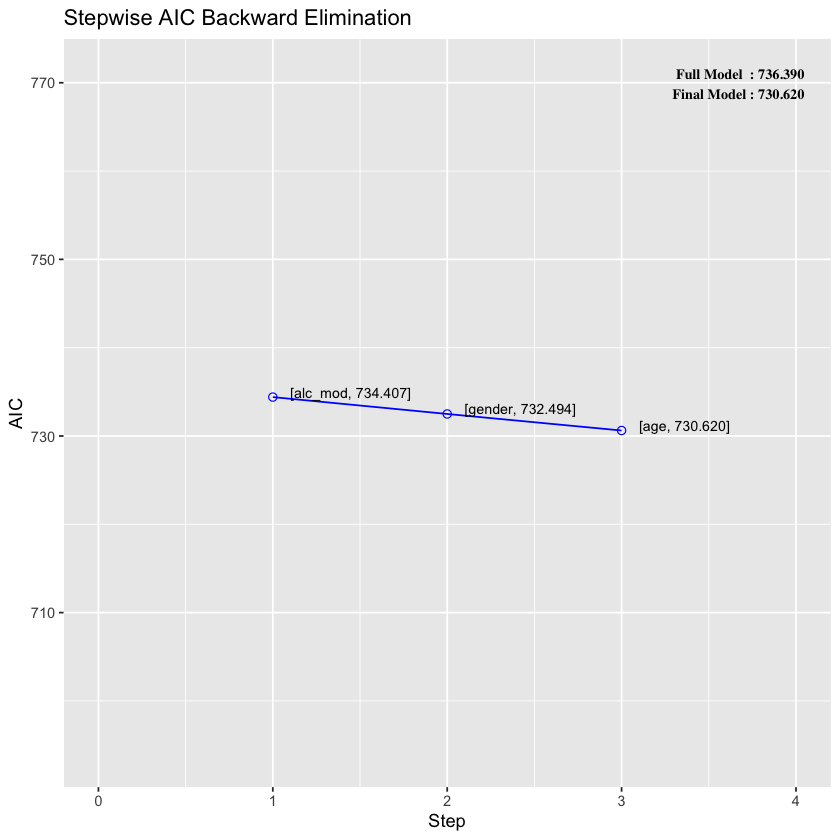

In [ ]:
model <- lm(y ~ ., data = surgical)
k <- ols_step_backward_aic(model)
plot(k)

### (b) Variable Selection Methods

#### All Possible Regression

All subset regression tests all possible subsets of the set of potential independent variables. If there are K potential independent variables (besides the constant), then there are $2k$ distinct subsets of them to be tested. For example, if you have 10 candidate independent variables, the number of subsets to be tested is 210, which is 1024, and if you have 20 candidate variables, the number is 220, which is more than one million.

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_step_all_possible(model)

   Index N      Predictors  R-Square Adj. R-Square Mallow's Cp
3      1 1              wt 0.7528328     0.7445939  0.70869536
1      2 1            disp 0.7183433     0.7089548  0.67512054
2      3 1              hp 0.6024373     0.5891853  0.50969578
4      4 1            qsec 0.1752963     0.1478062  0.07541973
8      5 2           hp wt 0.8267855     0.8148396  0.78108710
10     6 2         wt qsec 0.8264161     0.8144448  0.77856272
6      7 2         disp wt 0.7809306     0.7658223  0.72532105
5      8 2         disp hp 0.7482402     0.7308774  0.69454380
7      9 2       disp qsec 0.7215598     0.7023571  0.66395284
9     10 2         hp qsec 0.6368769     0.6118339  0.52014395
14    11 3      hp wt qsec 0.8347678     0.8170643  0.78199548
11    12 3      disp hp wt 0.8268361     0.8082829  0.76789526
13    13 3    disp wt qsec 0.8264170     0.8078189  0.76988533
12    14 3    disp hp qsec 0.7541953     0.7278591  0.68301440
15    15 4 disp hp wt qsec 0.8351443     0.8107212  0.7

The plot method shows the panel of fit criteria for all possible regression methods.

[[1]]
NULL

[[2]]
NULL


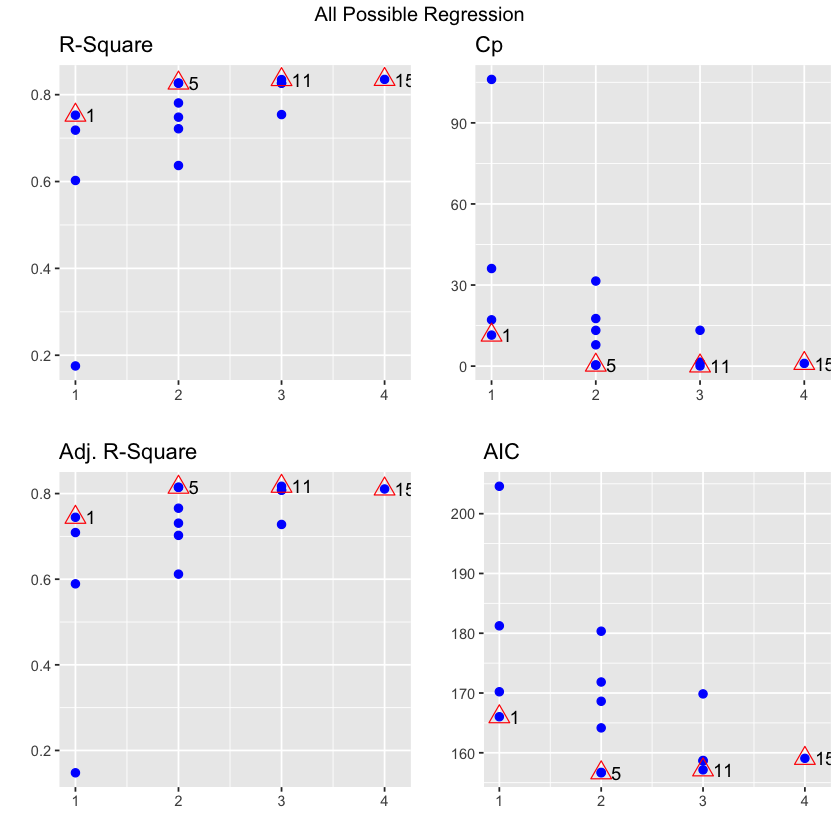

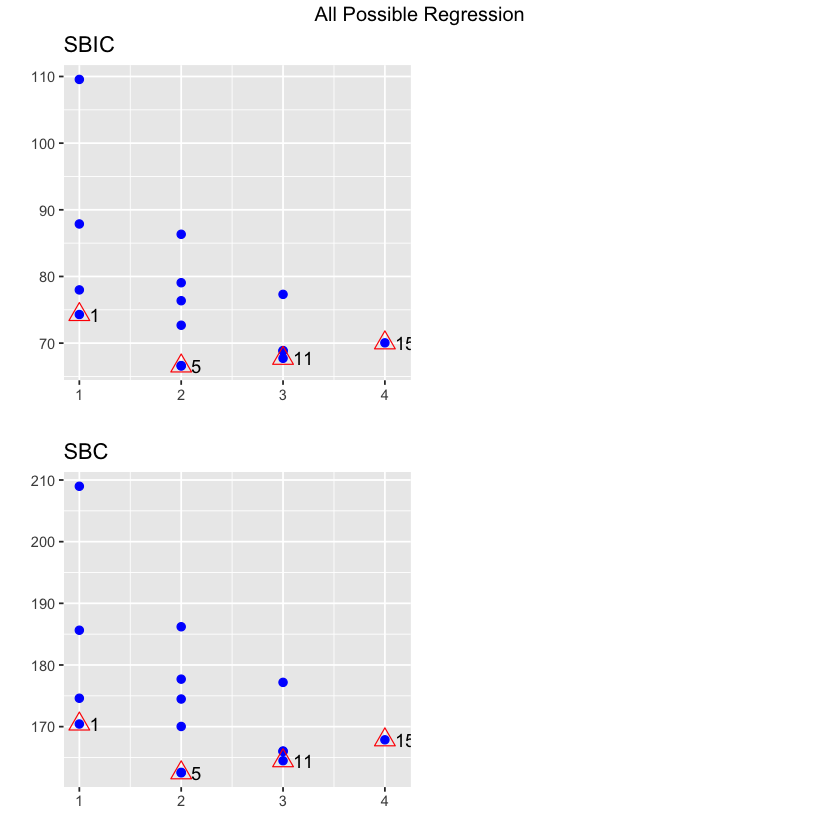

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
k <- ols_step_all_possible(model)
plot(k)

#### Best Subset Regression

Select the subset of predictors that do the best at meeting some well-defined objective criterion, such as having the largest $R^2$ value or the smallest MSE, Mallow’s Cp or AIC.

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_step_best_subset(model)

   Best Subsets Regression    
------------------------------
Model Index    Predictors
------------------------------
     1         wt              
     2         hp wt           
     3         hp wt qsec      
     4         disp hp wt qsec 
------------------------------

                                                   Subsets Regression Summary                                                    
---------------------------------------------------------------------------------------------------------------------------------
                       Adj.        Pred                                                                                           
Model    R-Square    R-Square    R-Square     C(p)        AIC        SBIC        SBC         MSEP       FPE       HSP       APC  
---------------------------------------------------------------------------------------------------------------------------------
  1        0.7528      0.7446      0.7087    12.4809    166.0294    74

The plot method shows the panel of fit criteria for best subset regression methods.

[[1]]
NULL

[[2]]
NULL


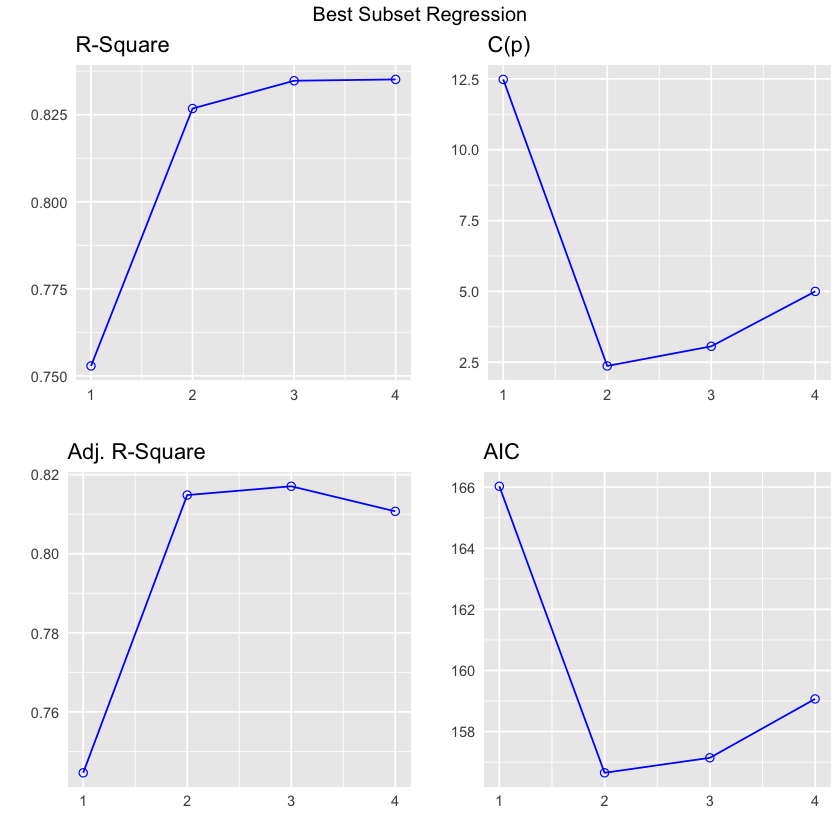

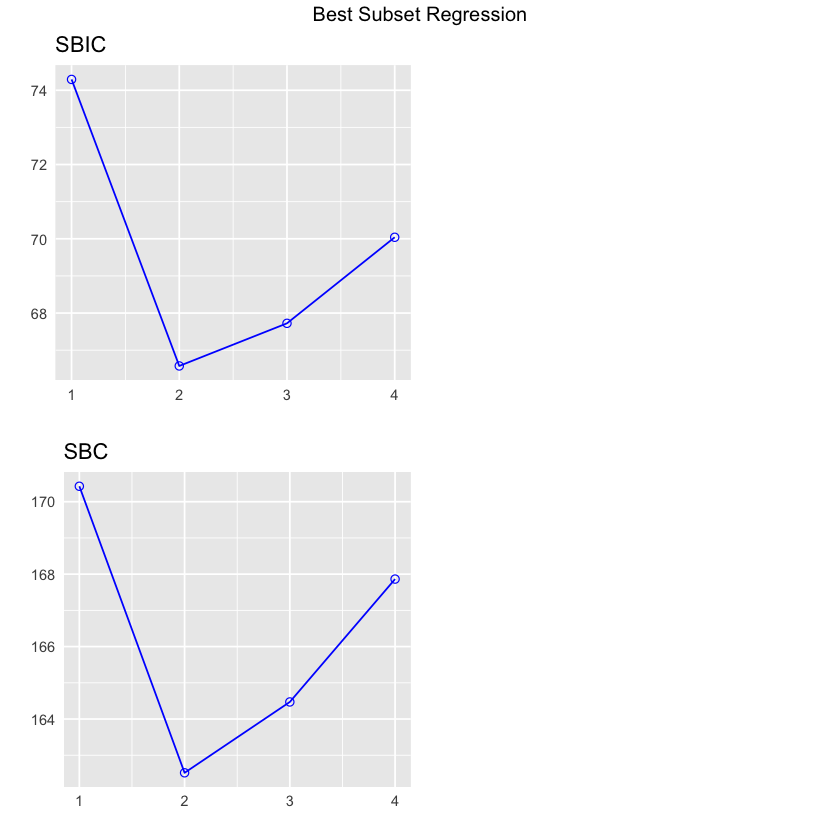

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
k <- ols_step_best_subset(model)
plot(k)

#### Stepwise Forward Regression

Build regression model from a set of candidate predictor variables by entering predictors based on p values, in a stepwise manner until there is no variable left to enter any more. The model should include all the candidate predictor variables. If details is set to TRUE, each step is displayed.

##### Variable Selection

In [ ]:
# stepwise forward regression
model <- lm(y ~ ., data = surgical)
ols_step_forward_p(model)



                              Stepwise Summary                              
--------------------------------------------------------------------------
Step    Variable         AIC        SBC       SBIC        R2       Adj. R2 
--------------------------------------------------------------------------
 0      Base Model     802.606    806.584    646.794    0.00000    0.00000 
 1      liver_test     771.875    777.842    616.009    0.45454    0.44405 
 2      alc_heavy      761.439    769.395    605.506    0.56674    0.54975 
 3      enzyme_test    750.509    760.454    595.297    0.65900    0.63854 
 4      pindex         735.715    747.649    582.943    0.75015    0.72975 
 5      bcs            730.620    744.543    579.638    0.78091    0.75808 
--------------------------------------------------------------------------

Final Model Output 
------------------

                           Model Summary                            
------------------------------------------------------

##### Plot

[[1]]
NULL


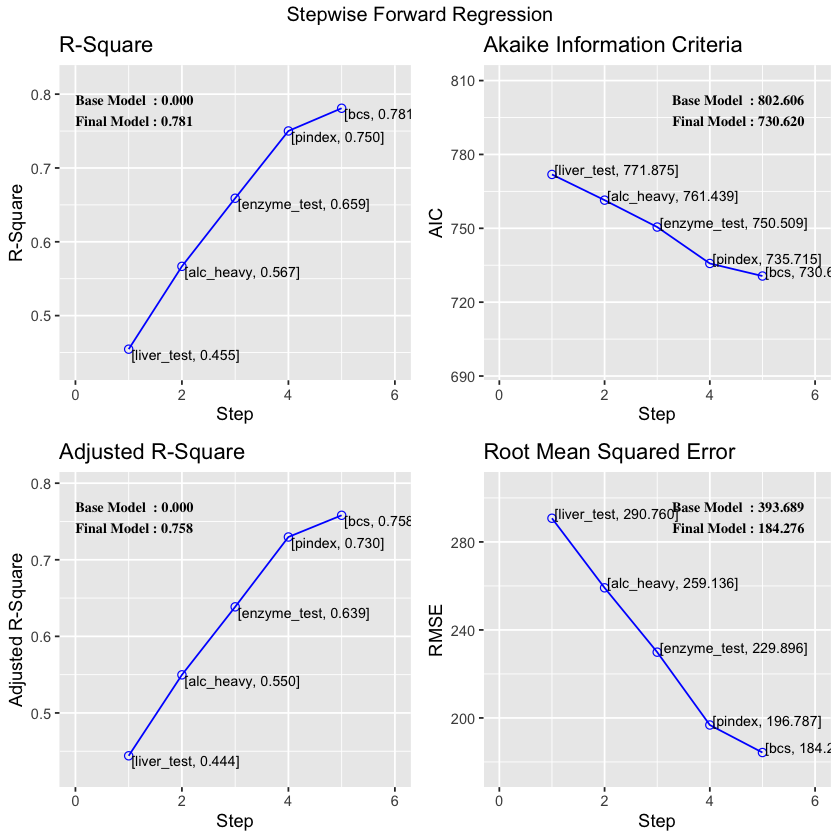

In [ ]:
model <- lm(y ~ ., data = surgical)
k <- ols_step_forward_p(model)
plot(k)

##### Detailed Output

In [ ]:
# stepwise forward regression
model <- lm(y ~ ., data = surgical)
ols_step_forward_p(model, details = TRUE)

Forward Selection Method 
------------------------

Candidate Terms: 

1. bcs 
2. pindex 
3. enzyme_test 
4. liver_test 
5. age 
6. gender 
7. alc_mod 
8. alc_heavy 


Step   => 0 
Model  => y ~ 1 
R2     => 0 

Initiating stepwise selection... 

                     Selection Metrics Table                      
-----------------------------------------------------------------
Predictor      Pr(>|t|)    R-Squared    Adj. R-Squared      AIC   
-----------------------------------------------------------------
liver_test      0.00000        0.455             0.444    771.875 
enzyme_test     0.00000        0.334             0.322    782.629 
pindex          0.00155        0.177             0.161    794.100 
alc_heavy       0.00172        0.174             0.158    794.301 
bcs             0.01025        0.120             0.103    797.697 
alc_mod         0.19286        0.032             0.014    802.828 
gender          0.20972        0.030             0.011    802.956 
age             0.



                              Stepwise Summary                              
--------------------------------------------------------------------------
Step    Variable         AIC        SBC       SBIC        R2       Adj. R2 
--------------------------------------------------------------------------
 0      Base Model     802.606    806.584    646.794    0.00000    0.00000 
 1      liver_test     771.875    777.842    616.009    0.45454    0.44405 
 2      alc_heavy      761.439    769.395    605.506    0.56674    0.54975 
 3      enzyme_test    750.509    760.454    595.297    0.65900    0.63854 
 4      pindex         735.715    747.649    582.943    0.75015    0.72975 
 5      bcs            730.620    744.543    579.638    0.78091    0.75808 
--------------------------------------------------------------------------

Final Model Output 
------------------

                           Model Summary                            
------------------------------------------------------

#### Stepwise Backward Regression

Build regression model from a set of candidate predictor variables by removing predictors based on p values, in a stepwise manner until there is no variable left to remove any more. The model should include all the candidate predictor variables. If details is set to TRUE, each step is displayed.

##### Variable Selection

In [ ]:
# stepwise backward regression
model <- lm(y ~ ., data = surgical)
ols_step_backward_p(model)



                             Stepwise Summary                              
-------------------------------------------------------------------------
Step    Variable        AIC        SBC       SBIC        R2       Adj. R2 
-------------------------------------------------------------------------
 0      Full Model    736.390    756.280    586.665    0.78184    0.74305 
 1      alc_mod       734.407    752.308    584.276    0.78177    0.74856 
 2      gender        732.494    748.406    581.938    0.78142    0.75351 
 3      age           730.620    744.543    579.638    0.78091    0.75808 
-------------------------------------------------------------------------

Final Model Output 
------------------

                           Model Summary                            
-------------------------------------------------------------------
R                         0.884       RMSE                 184.276 
R-Squared                 0.781       MSE                38202.426 
Adj. R-Squa

##### Plot

[[1]]
NULL


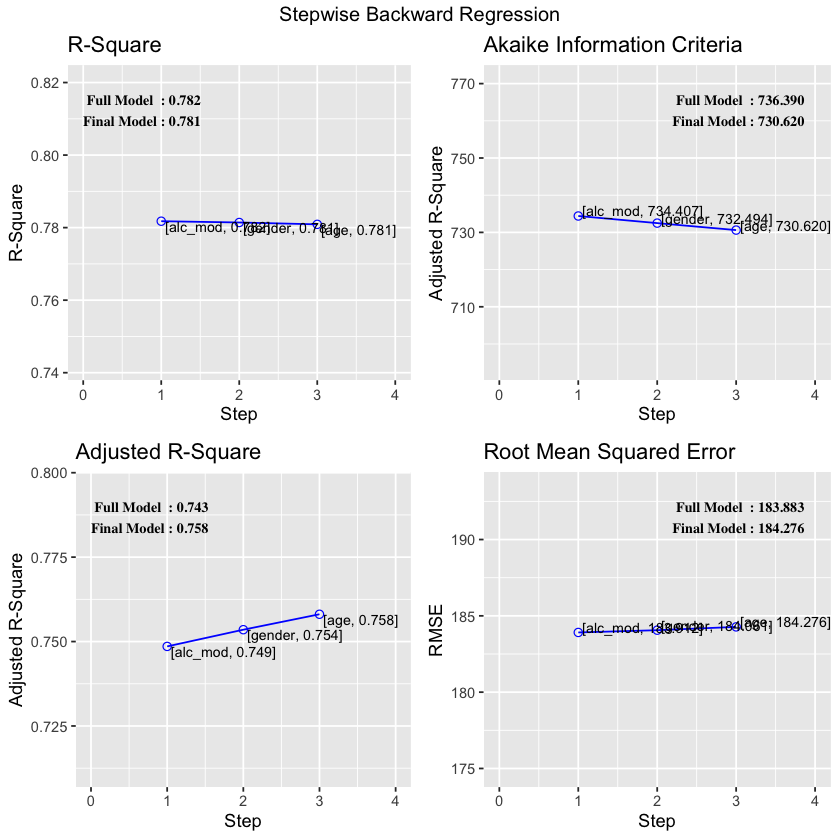

In [ ]:
model <- lm(y ~ ., data = surgical)
k <- ols_step_backward_p(model)
plot(k)

##### Detailed Output

In [ ]:
# stepwise backward regression
model <- lm(y ~ ., data = surgical)
ols_step_backward_p(model, details = TRUE)

Backward Elimination Method 
---------------------------

Candidate Terms: 

1. bcs 
2. pindex 
3. enzyme_test 
4. liver_test 
5. age 
6. gender 
7. alc_mod 
8. alc_heavy 


Step   => 0 
Model  => y ~ bcs + pindex + enzyme_test + liver_test + age + gender + alc_mod + alc_heavy 
R2     => 0.782 

Initiating stepwise selection... 

Step     => 1 
Removed  => alc_mod 
Model    => y ~ bcs + pindex + enzyme_test + liver_test + age + gender + alc_heavy 
R2       => 0.78177 

Step     => 2 
Removed  => gender 
Model    => y ~ bcs + pindex + enzyme_test + liver_test + age + alc_heavy 
R2       => 0.78142 

Step     => 3 
Removed  => age 
Model    => y ~ bcs + pindex + enzyme_test + liver_test + alc_heavy 
R2       => 0.78091 


No more variables to be removed.

Variables Removed: 

=> alc_mod 
=> gender 
=> age 




                             Stepwise Summary                              
-------------------------------------------------------------------------
Step    Variable        AIC        SBC       SBIC        R2       Adj. R2 
-------------------------------------------------------------------------
 0      Full Model    736.390    756.280    586.665    0.78184    0.74305 
 1      alc_mod       734.407    752.308    584.276    0.78177    0.74856 
 2      gender        732.494    748.406    581.938    0.78142    0.75351 
 3      age           730.620    744.543    579.638    0.78091    0.75808 
-------------------------------------------------------------------------

Final Model Output 
------------------

                           Model Summary                            
-------------------------------------------------------------------
R                         0.884       RMSE                 184.276 
R-Squared                 0.781       MSE                38202.426 
Adj. R-Squa

#### Stepwise Regression
Build regression model from a set of candidate predictor variables by entering and removing predictors based on p values, in a stepwise manner until there is no variable left to enter or remove any more. The model should include all the candidate predictor variables. If details is set to TRUE, each step is displayed.

##### Variable Selection

In [ ]:
# stepwise regression
model <- lm(y ~ ., data = surgical)
ols_step_both_p(model)



                                Stepwise Summary                                
------------------------------------------------------------------------------
Step    Variable             AIC        SBC       SBIC        R2       Adj. R2 
------------------------------------------------------------------------------
 0      Base Model         802.606    806.584    646.794    0.00000    0.00000 
 1      liver_test (+)     771.875    777.842    616.009    0.45454    0.44405 
 2      alc_heavy (+)      761.439    769.395    605.506    0.56674    0.54975 
 3      enzyme_test (+)    750.509    760.454    595.297    0.65900    0.63854 
 4      pindex (+)         735.715    747.649    582.943    0.75015    0.72975 
 5      bcs (+)            730.620    744.543    579.638    0.78091    0.75808 
------------------------------------------------------------------------------

Final Model Output 
------------------

                           Model Summary                            
----------

##### Plot

[[1]]
NULL


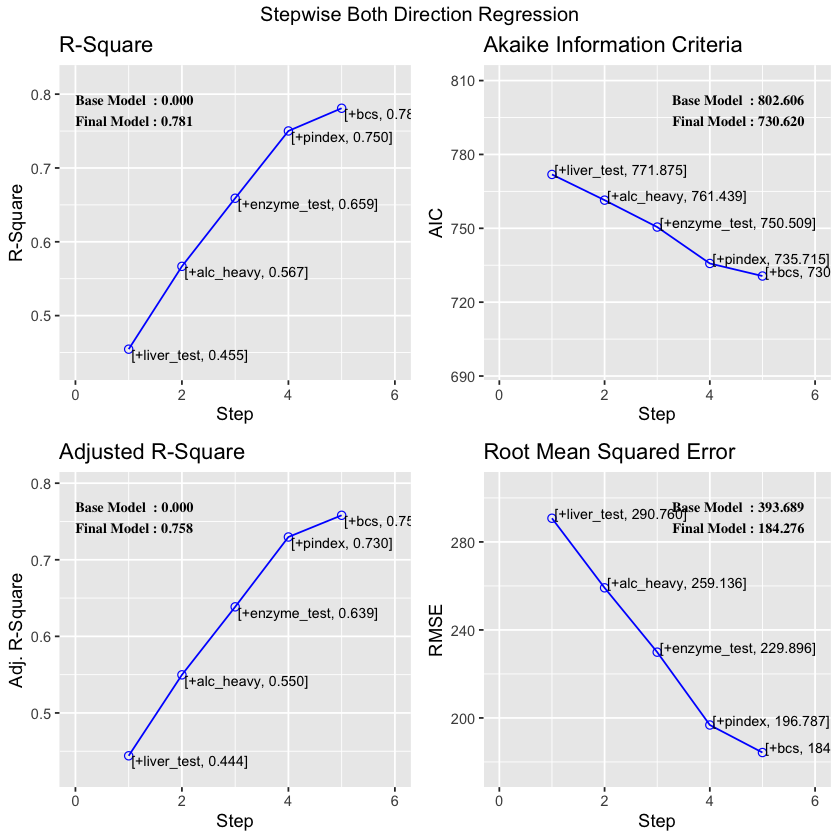

In [ ]:
model <- lm(y ~ ., data = surgical)
k <- ols_step_both_p(model)
plot(k)

##### Detailed Output

In [ ]:
# stepwise regression
model <- lm(y ~ ., data = surgical)
ols_step_both_p(model, details = TRUE)

Stepwise Selection Method 
-------------------------

Candidate Terms: 

1. bcs 
2. pindex 
3. enzyme_test 
4. liver_test 
5. age 
6. gender 
7. alc_mod 
8. alc_heavy 


Step   => 0 
Model  => y ~ 1 
R2     => 0 

Initiating stepwise selection... 

Step      => 1 
Selected  => liver_test 
Model     => y ~ liver_test 
R2        => 0.455 

Step      => 2 
Selected  => alc_heavy 
Model     => y ~ liver_test + alc_heavy 
R2        => 0.567 

Step      => 3 
Selected  => enzyme_test 
Model     => y ~ liver_test + alc_heavy + enzyme_test 
R2        => 0.659 

Step      => 4 
Selected  => pindex 
Model     => y ~ liver_test + alc_heavy + enzyme_test + pindex 
R2        => 0.75 

Step      => 5 
Selected  => bcs 
Model     => y ~ liver_test + alc_heavy + enzyme_test + pindex + bcs 
R2        => 0.781 


No more variables to be added or removed.




                                Stepwise Summary                                
------------------------------------------------------------------------------
Step    Variable             AIC        SBC       SBIC        R2       Adj. R2 
------------------------------------------------------------------------------
 0      Base Model         802.606    806.584    646.794    0.00000    0.00000 
 1      liver_test (+)     771.875    777.842    616.009    0.45454    0.44405 
 2      alc_heavy (+)      761.439    769.395    605.506    0.56674    0.54975 
 3      enzyme_test (+)    750.509    760.454    595.297    0.65900    0.63854 
 4      pindex (+)         735.715    747.649    582.943    0.75015    0.72975 
 5      bcs (+)            730.620    744.543    579.638    0.78091    0.75808 
------------------------------------------------------------------------------

Final Model Output 
------------------

                           Model Summary                            
----------

#### Stepwise AIC Forward Regression

Build regression model from a set of candidate predictor variables by entering predictors based on Akaike Information Criteria, in a stepwise manner until there is no variable left to enter any more. The model should include all the candidate predictor variables. If details is set to TRUE, each step is displayed.

##### Variable Selection

In [ ]:
# stepwise aic forward regression
model <- lm(y ~ ., data = surgical)
ols_step_forward_aic(model)



                              Stepwise Summary                              
--------------------------------------------------------------------------
Step    Variable         AIC        SBC       SBIC        R2       Adj. R2 
--------------------------------------------------------------------------
 0      Base Model     802.606    806.584    646.794    0.00000    0.00000 
 1      liver_test     771.875    777.842    616.009    0.45454    0.44405 
 2      alc_heavy      761.439    769.395    605.506    0.56674    0.54975 
 3      enzyme_test    750.509    760.454    595.297    0.65900    0.63854 
 4      pindex         735.715    747.649    582.943    0.75015    0.72975 
 5      bcs            730.620    744.543    579.638    0.78091    0.75808 
--------------------------------------------------------------------------

Final Model Output 
------------------

                           Model Summary                            
------------------------------------------------------

##### Plot

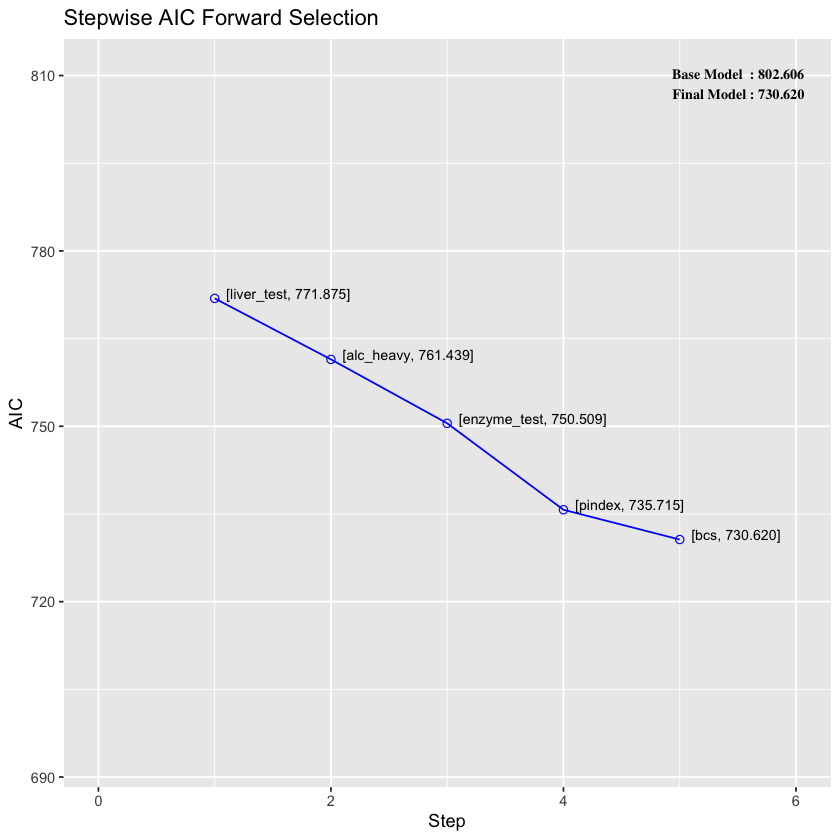

In [ ]:
model <- lm(y ~ ., data = surgical)
k <- ols_step_forward_aic(model)
plot(k)

##### Detailed Output

In [ ]:
# stepwise aic forward regression
model <- lm(y ~ ., data = surgical)
ols_step_forward_aic(model, details = TRUE)

Forward Selection Method 
------------------------

Candidate Terms: 

1. bcs 
2. pindex 
3. enzyme_test 
4. liver_test 
5. age 
6. gender 
7. alc_mod 
8. alc_heavy 


Step     => 0 
Model    => y ~ 1 
AIC      => 802.606 

Initiating stepwise selection... 

                       Table: Adding New Variables                        
-------------------------------------------------------------------------
Predictor      DF      AIC        SBC       SBIC        R2       Adj. R2  
-------------------------------------------------------------------------
liver_test      1    771.875    777.842    616.009    0.45454     0.44405 
enzyme_test     1    782.629    788.596    626.220    0.33435     0.32154 
pindex          1    794.100    800.067    637.196    0.17680     0.16097 
alc_heavy       1    794.301    800.268    637.389    0.17373     0.15784 
bcs             1    797.697    803.664    640.655    0.12010     0.10318 
alc_mod         1    802.828    808.795    645.601    0.03239     0.



                              Stepwise Summary                              
--------------------------------------------------------------------------
Step    Variable         AIC        SBC       SBIC        R2       Adj. R2 
--------------------------------------------------------------------------
 0      Base Model     802.606    806.584    646.794    0.00000    0.00000 
 1      liver_test     771.875    777.842    616.009    0.45454    0.44405 
 2      alc_heavy      761.439    769.395    605.506    0.56674    0.54975 
 3      enzyme_test    750.509    760.454    595.297    0.65900    0.63854 
 4      pindex         735.715    747.649    582.943    0.75015    0.72975 
 5      bcs            730.620    744.543    579.638    0.78091    0.75808 
--------------------------------------------------------------------------

Final Model Output 
------------------

                           Model Summary                            
------------------------------------------------------

#### Stepwise AIC Backward Regression

Build regression model from a set of candidate predictor variables by removing predictors based on Akaike Information Criteria, in a stepwise manner until there is no variable left to remove any more. The model should include all the candidate predictor variables. If details is set to TRUE, each step is displayed.

##### Variable Selection

In [ ]:
# stepwise aic backward regression
model <- lm(y ~ ., data = surgical)
k <- ols_step_backward_aic(model)
k



                             Stepwise Summary                              
-------------------------------------------------------------------------
Step    Variable        AIC        SBC       SBIC        R2       Adj. R2 
-------------------------------------------------------------------------
 0      Full Model    736.390    756.280    586.665    0.78184    0.74305 
 1      alc_mod       734.407    752.308    583.884    0.78177    0.74856 
 2      gender        732.494    748.406    581.290    0.78142    0.75351 
 3      age           730.620    744.543    578.844    0.78091    0.75808 
-------------------------------------------------------------------------

Final Model Output 
------------------

                           Model Summary                            
-------------------------------------------------------------------
R                         0.884       RMSE                 184.276 
R-Squared                 0.781       MSE                38202.426 
Adj. R-Squa

##### Plot

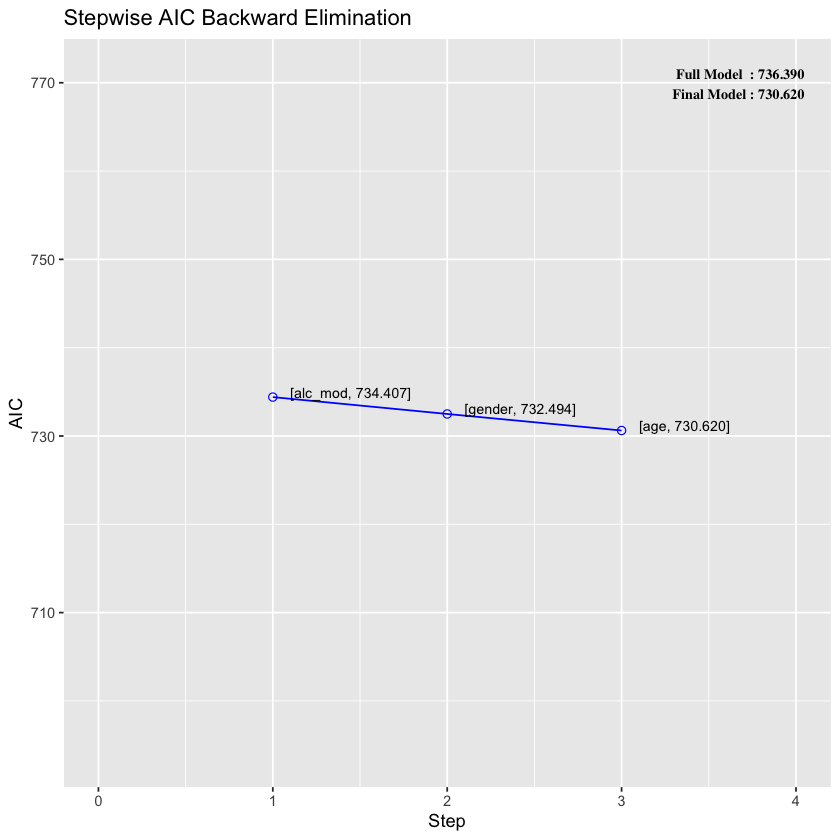

In [ ]:
model <- lm(y ~ ., data = surgical)
k <- ols_step_backward_aic(model)
plot(k)

##### Detailed Output

In [ ]:
# stepwise aic backward regression
model <- lm(y ~ ., data = surgical)
ols_step_backward_aic(model, details = TRUE)

Backward Elimination Method 
---------------------------

Candidate Terms: 

1. bcs 
2. pindex 
3. enzyme_test 
4. liver_test 
5. age 
6. gender 
7. alc_mod 
8. alc_heavy 


Step     => 0 
Model    => y ~ bcs + pindex + enzyme_test + liver_test + age + gender + alc_mod + alc_heavy 
AIC      => 736.3899 

Initiating stepwise selection... 

                   Table: Removing Existing Variables                    
------------------------------------------------------------------------
Predictor      DF      AIC        SBC       SBIC        R2       Adj. R2 
------------------------------------------------------------------------
alc_mod         1    734.407    752.308    584.276    0.78177    0.74856 
gender          1    734.478    752.379    584.323    0.78148    0.74823 
age             1    734.544    752.445    584.367    0.78121    0.74792 
liver_test      1    735.878    753.779    585.255    0.77574    0.74162 
bcs             1    741.677    759.577    589.203    0.75032    0.71



                             Stepwise Summary                              
-------------------------------------------------------------------------
Step    Variable        AIC        SBC       SBIC        R2       Adj. R2 
-------------------------------------------------------------------------
 0      Full Model    736.390    756.280    586.665    0.78184    0.74305 
 1      alc_mod       734.407    752.308    583.884    0.78177    0.74856 
 2      gender        732.494    748.406    581.290    0.78142    0.75351 
 3      age           730.620    744.543    578.844    0.78091    0.75808 
-------------------------------------------------------------------------

Final Model Output 
------------------

                           Model Summary                            
-------------------------------------------------------------------
R                         0.884       RMSE                 184.276 
R-Squared                 0.781       MSE                38202.426 
Adj. R-Squa

#### Stepwise AIC Regression

Build regression model from a set of candidate predictor variables by entering and removing predictors based on Akaike Information Criteria, in a stepwise manner until there is no variable left to enter or remove any more. The model should include all the candidate predictor variables. If details is set to TRUE, each step is displayed.

##### Variable Selection

In [ ]:
# stepwise aic regression
model <- lm(y ~ ., data = surgical)
ols_step_both_aic(model)



                                Stepwise Summary                                
------------------------------------------------------------------------------
Step    Variable             AIC        SBC       SBIC        R2       Adj. R2 
------------------------------------------------------------------------------
 0      Base Model         802.606    806.584    646.794    0.00000    0.00000 
 1      liver_test (+)     771.875    777.842    616.009    0.45454    0.44405 
 2      alc_heavy (+)      761.439    769.395    605.506    0.56674    0.54975 
 3      enzyme_test (+)    750.509    760.454    595.297    0.65900    0.63854 
 4      pindex (+)         735.715    747.649    582.943    0.75015    0.72975 
 5      bcs (+)            730.620    744.543    579.638    0.78091    0.75808 
------------------------------------------------------------------------------

Final Model Output 
------------------

                           Model Summary                            
----------

##### Plot

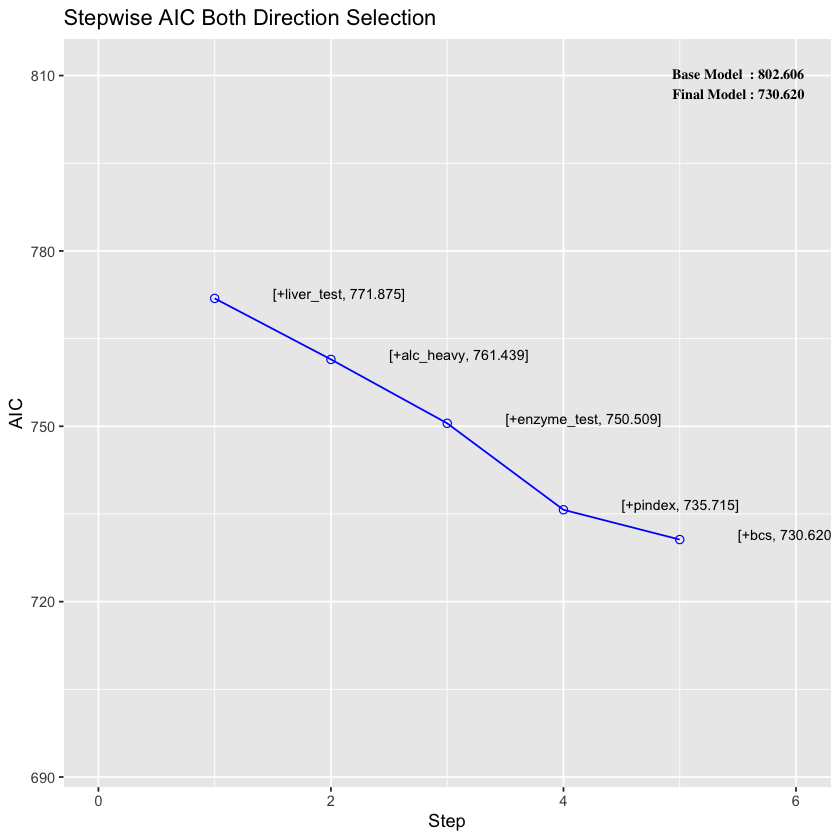

In [ ]:
model <- lm(y ~ ., data = surgical)
k <- ols_step_both_aic(model)
plot(k)

##### Detailed Output

In [ ]:
# stepwise aic regression
model <- lm(y ~ ., data = surgical)
ols_step_both_aic(model, details = TRUE)

Stepwise Selection Method 
-------------------------

Candidate Terms: 

1. bcs 
2. pindex 
3. enzyme_test 
4. liver_test 
5. age 
6. gender 
7. alc_mod 
8. alc_heavy 


Step     => 0 
Model    => y ~ 1 
AIC      => 802.606 

Initiating stepwise selection... 

                       Table: Adding New Variables                        
-------------------------------------------------------------------------
Predictor      DF      AIC        SBC       SBIC        R2       Adj. R2  
-------------------------------------------------------------------------
bcs             1    797.697    803.664    640.655    0.12010     0.10318 
pindex          1    794.100    800.067    637.196    0.17680     0.16097 
enzyme_test     1    782.629    788.596    626.220    0.33435     0.32154 
liver_test      1    771.875    777.842    616.009    0.45454     0.44405 
age             1    803.834    809.801    646.572    0.01420    -0.00476 
gender          1    802.956    808.923    645.725    0.03009     



                                Stepwise Summary                                
------------------------------------------------------------------------------
Step    Variable             AIC        SBC       SBIC        R2       Adj. R2 
------------------------------------------------------------------------------
 0      Base Model         802.606    806.584    646.794    0.00000    0.00000 
 1      liver_test (+)     771.875    777.842    616.009    0.45454    0.44405 
 2      alc_heavy (+)      761.439    769.395    605.506    0.56674    0.54975 
 3      enzyme_test (+)    750.509    760.454    595.297    0.65900    0.63854 
 4      pindex (+)         735.715    747.649    582.943    0.75015    0.72975 
 5      bcs (+)            730.620    744.543    579.638    0.78091    0.75808 
------------------------------------------------------------------------------

Final Model Output 
------------------

                           Model Summary                            
----------

### (c) Residual Diagnostics module 3 - activity 4 2

#### Introduction

`olsrr` offers tools for detecting violation of standard regression assumptions. Here we take a look at residual diagnostics. The standard regression assumptions include the following about residuals/errors:

* The error has a normal distribution (normality assumption).
* The errors have mean zero.
* The errors have same but unknown variance (homoscedasticity assumption).
* The error are independent of each other (independent errors assumption).

#### Residual QQ Plot

Graph for detecting violation of normality assumption.

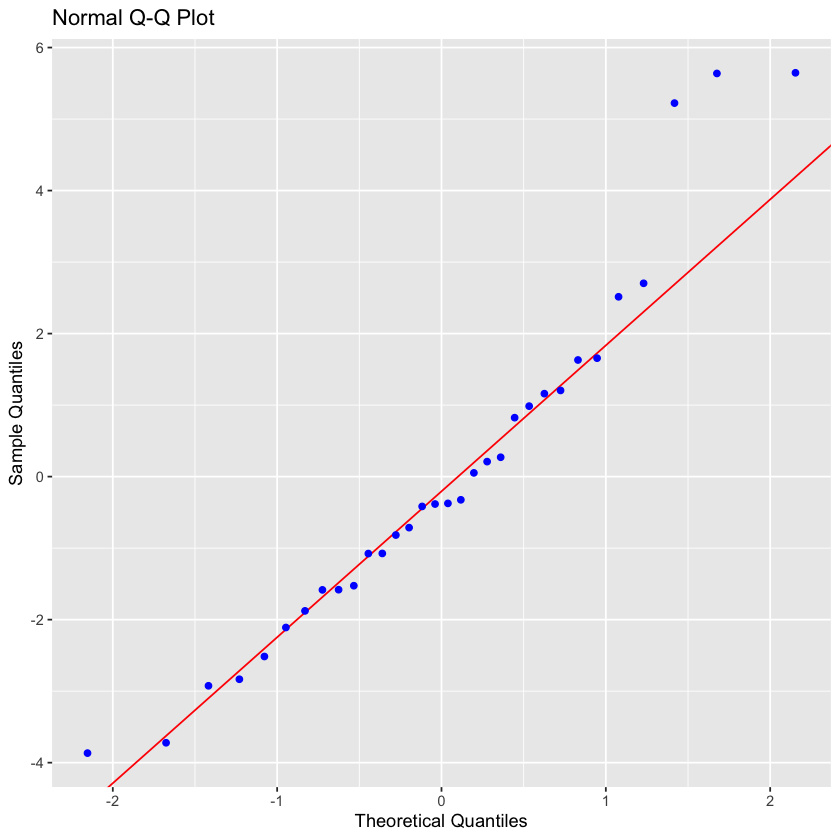

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_resid_qq(model)

#### Residual Normality Test

Test for detecting violation of normality assumption.

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_test_normality(model)

-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9366         0.0600 
Kolmogorov-Smirnov        0.1152         0.7464 
Cramer-von Mises          2.8122         0.0000 
Anderson-Darling          0.5859         0.1188 
-----------------------------------------------

Correlation between observed residuals and expected residuals under normality.

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_test_correlation(model)

[1] 0.970066

#### Residual vs Fitted Values Plot

It is a scatter plot of residuals on the y axis and fitted values on the x axis to detect non-linearity, unequal error variances, and outliers.

Characteristics of a well behaved residual vs fitted plot:

* The residuals spread randomly around the 0 line indicating that the relationship is linear.
* The residuals form an approximate horizontal band around the 0 line indicating homogeneity of error variance.
* No one residual is visibly away from the random pattern of the residuals indicating that there are no outliers.

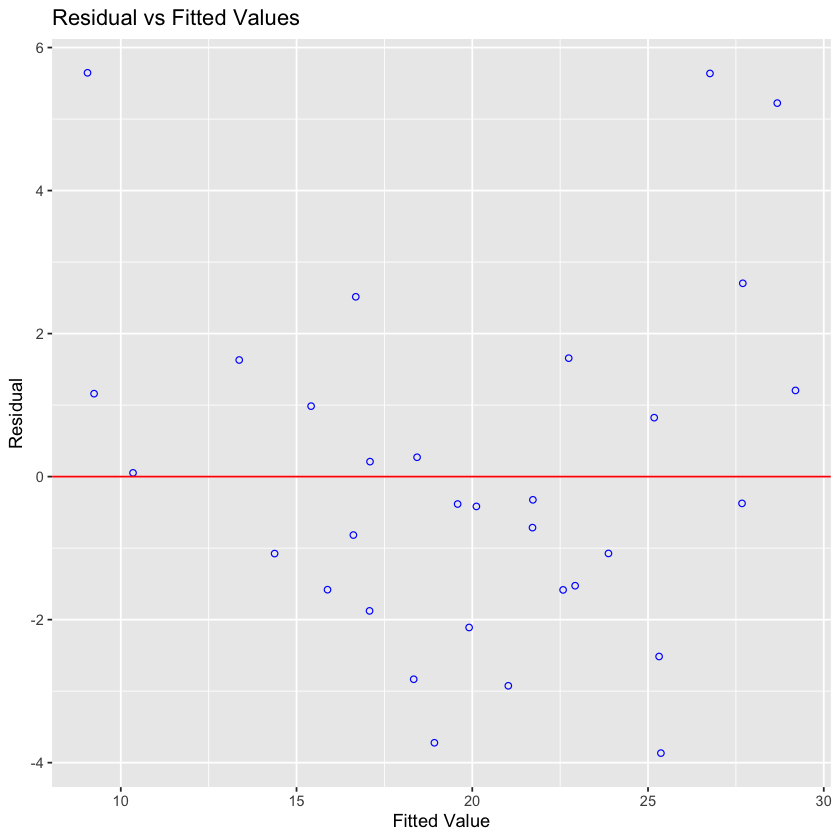

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_resid_fit(model)

#### Residual Histogram

Histogram of residuals for detecting violation of normality assumption.

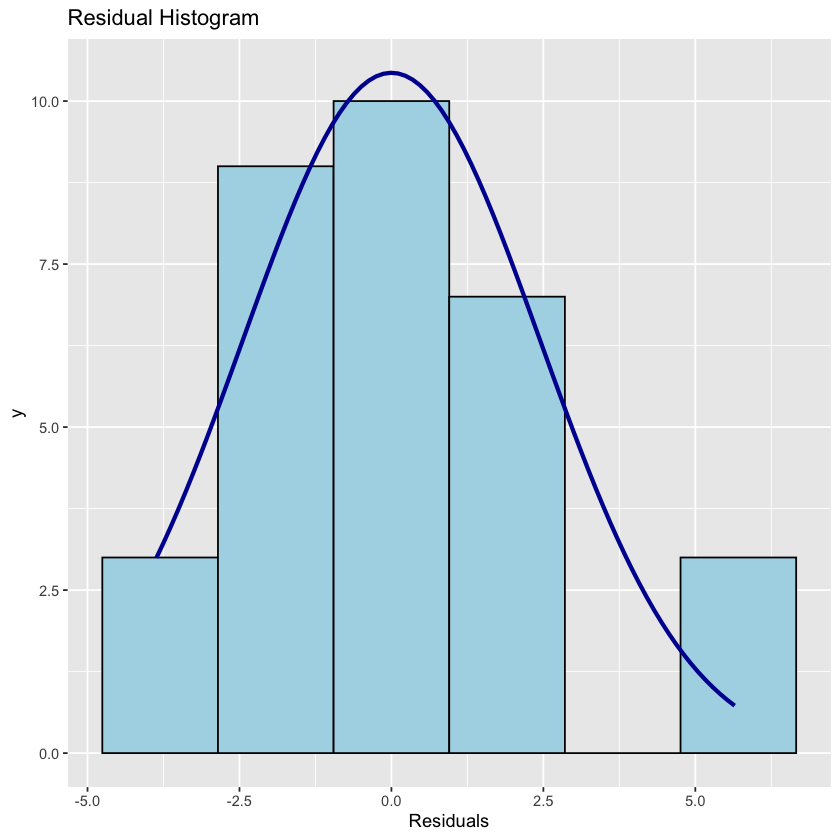

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_resid_hist(model)

### (d) Heteroscedasticity

#### Introduction

One of the assumptions made about residuals/errors in OLS regression is that the errors have the same but unknown variance. This is known as constant variance or homoscedasticity. When this assumption is violated, the problem is known as heteroscedasticity.

Consequences of Heteroscedasticity

* The OLS estimators and regression predictions based on them remains unbiased and consistent.
* The OLS estimators are no longer the BLUE (Best Linear Unbiased Estimators) because they are no longer efficient, so the regression predictions will be inefficient too.
* Because of the inconsistency of the covariance matrix of the estimated regression coefficients, the tests of hypotheses, (t-test, F-test) are no longer valid.

olsrr provides the following 4 tests for detecting heteroscedasticity:

* Bartlett Test
* Breusch Pagan Test
* Score Test
* F Test

#### Bartlett Test

Bartlett’s test is used to test if variances across samples is equal. It is sensitive to departures from normality. The Levene test is an alternative test that is less sensitive to departures from normality.

You can perform the test using 2 continuous variables, one continuous and one grouping variable, a formula or a linear model.

##### Use grouping variable

In [ ]:
ols_test_bartlett(hsb, 'read', group_var = 'female')


    Bartlett's Test of Homogenity of Variances    
------------------------------------------------
Ho: Variances are equal across groups
Ha: Variances are unequal for atleast two groups

        Test Summary         
 ----------------------------
 DF            =    1 
 Chi2          =    0.1866579 
 Prob > Chi2   =    0.6657129 

##### Using variables

In [ ]:
ols_test_bartlett(hsb, 'read', 'write')


    Bartlett's Test of Homogenity of Variances    
------------------------------------------------
Ho: Variances are equal across groups
Ha: Variances are unequal for atleast two groups

        Data          
 ---------------------
 Variables: read write 

        Test Summary         
 ----------------------------
 DF            =    1 
 Chi2          =    1.222871 
 Prob > Chi2   =    0.2687979 

#### Breusch Pagan Test

Breusch Pagan Test was introduced by Trevor Breusch and Adrian Pagan in 1979. It is used to test for heteroskedasticity in a linear regression model and assumes that the error terms are normally distributed. It tests whether the variance of the errors from a regression is dependent on the values of the independent variables. It is a $\chi^2$ test.

You can perform the test using the fitted values of the model, the predictors in the model and a subset of the independent variables. It includes options to perform multiple tests and p value adjustments. The options for p value adjustments include Bonferroni, Sidak and Holm’s method.

##### Use fitted values of the model

In [ ]:
model <- lm(mpg ~ disp + hp + wt + drat, data = mtcars)
ols_test_breusch_pagan(model)


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

             Data               
 -------------------------------
 Response : mpg 
 Variables: fitted values of mpg 

       Test Summary         
 ---------------------------
 DF            =    1 
 Chi2          =    1.429672 
 Prob > Chi2   =    0.231818 

##### Use independent variables of the model

In [ ]:
model <- lm(mpg ~ disp + hp + wt + drat, data = mtcars)
ols_test_breusch_pagan(model, rhs = TRUE)


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

           Data            
 --------------------------
 Response : mpg 
 Variables: disp hp wt drat 

        Test Summary         
 ----------------------------
 DF            =    4 
 Chi2          =    1.513808 
 Prob > Chi2   =    0.8241927 

##### Use independent variables of the model and perform multiple tests

In [ ]:
model <- lm(mpg ~ disp + hp + wt + drat, data = mtcars)
ols_test_breusch_pagan(model, rhs = TRUE, multiple = TRUE)


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

           Data            
 --------------------------
 Response : mpg 
 Variables: disp hp wt drat 

        Test Summary (Unadjusted p values)       
 ----------------------------------------------
  Variable           chi2       df        p     
 ----------------------------------------------
  disp             1.2355345     1    0.2663334 
  hp               0.9209878     1    0.3372157 
  wt               1.2529988     1    0.2629805 
  drat             1.1668486     1    0.2800497 
 ----------------------------------------------
  simultaneous     1.5138083     4    0.8241927 
 ----------------------------------------------

##### Bonferroni p value Adjustment

In [ ]:
model <- lm(mpg ~ disp + hp + wt + drat, data = mtcars)
ols_test_breusch_pagan(model, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

           Data            
 --------------------------
 Response : mpg 
 Variables: disp hp wt drat 

        Test Summary (Bonferroni p values)       
 ----------------------------------------------
  Variable           chi2       df        p     
 ----------------------------------------------
  disp             1.2355345     1    1.0000000 
  hp               0.9209878     1    1.0000000 
  wt               1.2529988     1    1.0000000 
  drat             1.1668486     1    1.0000000 
 ----------------------------------------------
  simultaneous     1.5138083     4    0.8241927 
 ----------------------------------------------

##### Sidak p value Adjustment

In [ ]:
model <- lm(mpg ~ disp + hp + wt + drat, data = mtcars)
ols_test_breusch_pagan(model, rhs = TRUE, multiple = TRUE, p.adj = 'sidak')


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

           Data            
 --------------------------
 Response : mpg 
 Variables: disp hp wt drat 

          Test Summary (Sidak p values)          
 ----------------------------------------------
  Variable           chi2       df        p     
 ----------------------------------------------
  disp             1.2355345     1    0.7102690 
  hp               0.9209878     1    0.8070305 
  wt               1.2529988     1    0.7049362 
  drat             1.1668486     1    0.7313356 
 ----------------------------------------------
  simultaneous     1.5138083     4    0.8241927 
 ----------------------------------------------

##### Holm’s p value Adjustment

In [ ]:
model <- lm(mpg ~ disp + hp + wt + drat, data = mtcars)
ols_test_breusch_pagan(model, rhs = TRUE, multiple = TRUE, p.adj = 'holm')


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

           Data            
 --------------------------
 Response : mpg 
 Variables: disp hp wt drat 

          Test Summary (Holm's p values)         
 ----------------------------------------------
  Variable           chi2       df        p     
 ----------------------------------------------
  disp             1.2355345     1    0.7990002 
  hp               0.9209878     1    0.3372157 
  wt               1.2529988     1    1.0000000 
  drat             1.1668486     1    0.5600994 
 ----------------------------------------------
  simultaneous     1.5138083     4    0.8241927 
 ----------------------------------------------

#### Score Test

Test for heteroskedasticity under the assumption that the errors are independent and identically distributed (i.i.d.). You can perform the test using the fitted values of the model, the predictors in the model and a subset of the independent variables.

##### Use fitted values of the model

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_test_score(model)


 Score Test for Heteroskedasticity
 ---------------------------------
 Ho: Variance is homogenous
 Ha: Variance is not homogenous

 Variables: fitted values of mpg 

        Test Summary         
 ----------------------------
 DF            =    1 
 Chi2          =    0.5163959 
 Prob > Chi2   =    0.4723832 

##### Use independent variables of the model

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_test_score(model, rhs = TRUE)


 Score Test for Heteroskedasticity
 ---------------------------------
 Ho: Variance is homogenous
 Ha: Variance is not homogenous

 Variables: disp hp wt qsec 

        Test Summary         
 ----------------------------
 DF            =    4 
 Chi2          =    2.039404 
 Prob > Chi2   =    0.7285114 

##### Specify variables

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_test_score(model, vars = c('disp', 'hp'))


 Score Test for Heteroskedasticity
 ---------------------------------
 Ho: Variance is homogenous
 Ha: Variance is not homogenous

 Variables: disp hp 

        Test Summary         
 ----------------------------
 DF            =    2 
 Chi2          =    0.9983196 
 Prob > Chi2   =    0.6070405 

#### F Test

F Test for heteroskedasticity under the assumption that the errors are independent and identically distributed (i.i.d.). You can perform the test using the fitted values of the model, the predictors in the model and a subset of the independent variables.

##### Use fitted values of the model

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_test_f(model)


 F Test for Heteroskedasticity
 -----------------------------
 Ho: Variance is homogenous
 Ha: Variance is not homogenous

 Variables: fitted values of mpg 

      Test Summary        
 -------------------------
 Num DF     =    1 
 Den DF     =    30 
 F          =    0.4920617 
 Prob > F   =    0.4884154 

##### Use independent variables of the model

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_test_f(model, rhs = TRUE)


 F Test for Heteroskedasticity
 -----------------------------
 Ho: Variance is homogenous
 Ha: Variance is not homogenous

 Variables: disp hp wt qsec 

      Test Summary        
 -------------------------
 Num DF     =    4 
 Den DF     =    27 
 F          =    0.4594694 
 Prob > F   =    0.7647271 

##### Specify variables

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_test_f(model, vars = c('disp', 'hp'))


 F Test for Heteroskedasticity
 -----------------------------
 Ho: Variance is homogenous
 Ha: Variance is not homogenous

 Variables: disp hp 

      Test Summary        
 -------------------------
 Num DF     =    2 
 Den DF     =    29 
 F          =    0.4669306 
 Prob > F   =    0.631555 

### (e) Measures of Influence

#### Introduction

It is possible for a single observation to have a great influence on the results of a regression analysis. It is therefore important to detect influential observations and to take them into consideration when interpreting the results.

olsrr offers the following tools to detect influential observations:

* Cook’s D Bar Plot
* Cook’s D Chart
* DFBETAs Panel
* DFFITs Plot
* Studentized Residual Plot
* Standardized Residual Chart
* Studentized Residuals vs Leverage Plot
* Deleted Studentized Residual vs Fitted Values Plot
* Hadi Plot
* Potential Residual Plot

#### Cook’s D Bar Plot

Bar Plot of Cook’s distance to detect observations that strongly influence fitted values of the model. Cook’s distance was introduced by American statistician R Dennis Cook in 1977. It is used to identify influential data points. It depends on both the residual and leverage i.e it takes it account both the x value and y value of the observation.

Steps to compute Cook’s distance:

* delete observations one at a time.
* refit the regression model on remaining (n−1) observations
* examine how much all of the fitted values change when the ith observation is deleted.

A data point having a large cook’s d indicates that the data point strongly influences the fitted values.

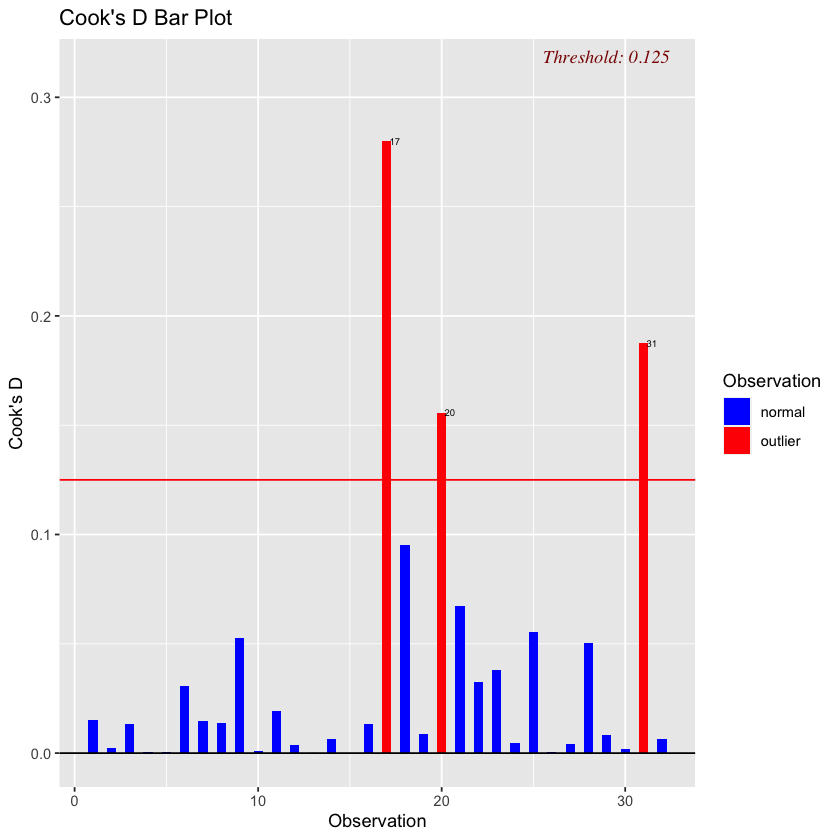

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_cooksd_bar(model)

#### Cook’s D Chart

Chart of Cook’s distance to detect observations that strongly influence fitted values of the model.

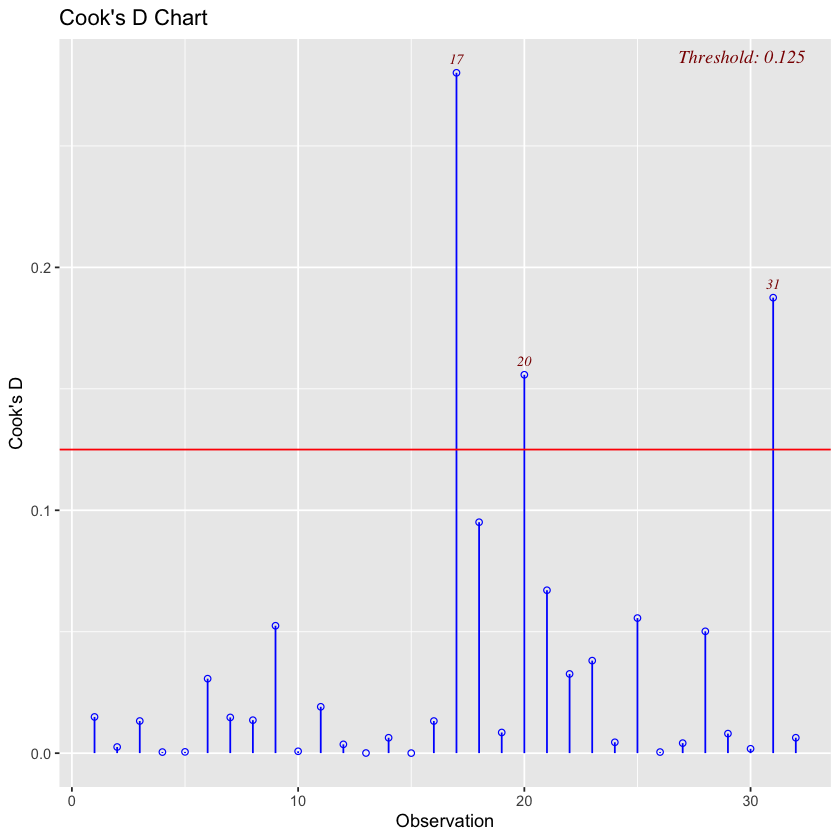

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_cooksd_chart(model)

#### DFBETAs Panel

DFBETA measures the difference in each parameter estimate with and without the influential point. There is a DFBETA for each data point i.e if there are n observations and k variables, there will be $n∗k$ DFBETAs. In general, large values of DFBETAS indicate observations that are influential in estimating a given parameter. Belsley, Kuh, and Welsch recommend 2 as a general cutoff value to indicate influential observations and $\frac{2}{\sqrt{n}}$ as a size-adjusted cutoff.

[[1]]
NULL


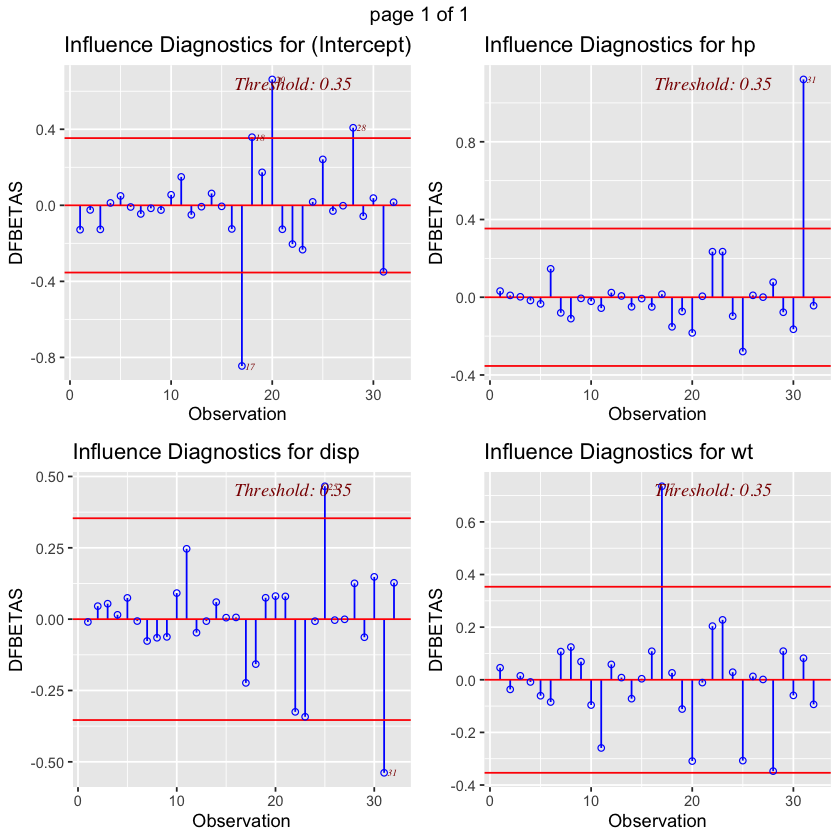

In [ ]:
model <- lm(mpg ~ disp + hp + wt, data = mtcars)
ols_plot_dfbetas(model)

#### DFFITS Plot

Proposed by Welsch and Kuh (1977). It is the scaled difference between the $i^{th}$ fitted value obtained from the full data and the $i^{th}$ fitted value obtained by deleting the $i^{th}$ observation. DFFIT - difference in fits, is used to identify influential data points. It quantifies the number of standard deviations that the fitted value changes when the ith data point is omitted.

Steps to compute DFFITs:

* delete observations one at a time.
* refit the regression model on remaining observations
* examine how much all of the fitted values change when the ith observation is deleted.
An observation is deemed influential if the absolute value of its DFFITS value is greater than:

${2}*{\frac{\sqrt{(p + 1)}}{(n - p -1)}}$

where n is the number of observations and p is the number of predictors including intercept.

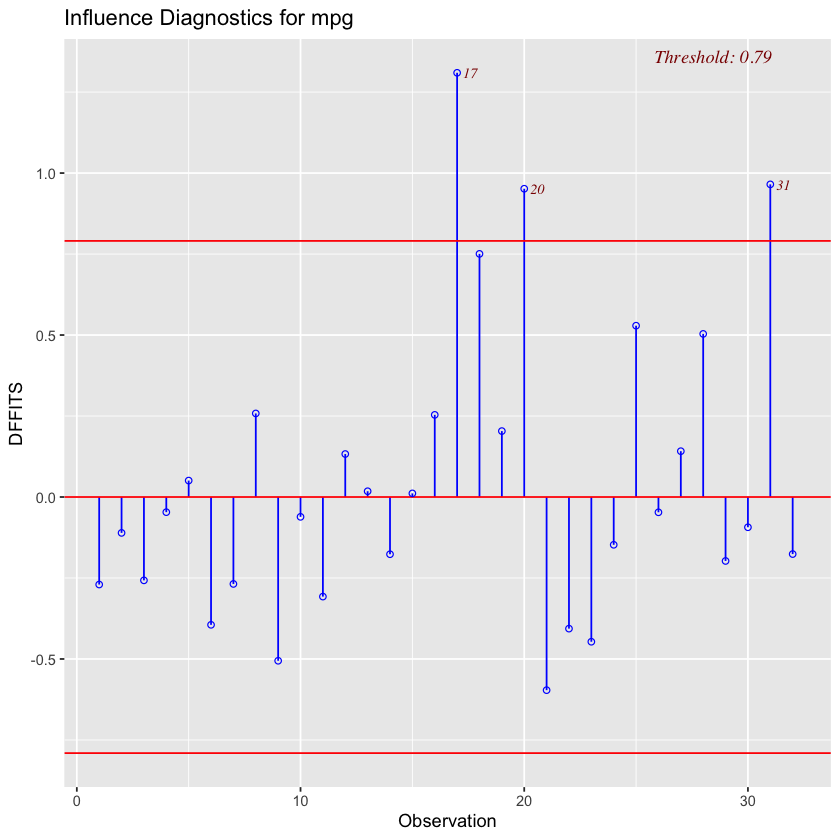

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_dffits(model)

#### Studentized Residual Plot

Plot for detecting outliers. Studentized deleted residuals (or externally studentized residuals) is the deleted residual divided by its estimated standard deviation. Studentized residuals are going to be more effective for detecting outlying Y observations than standardized residuals. If an observation has an externally studentized residual that is larger than 3 (in absolute value) we can call it an outlier.

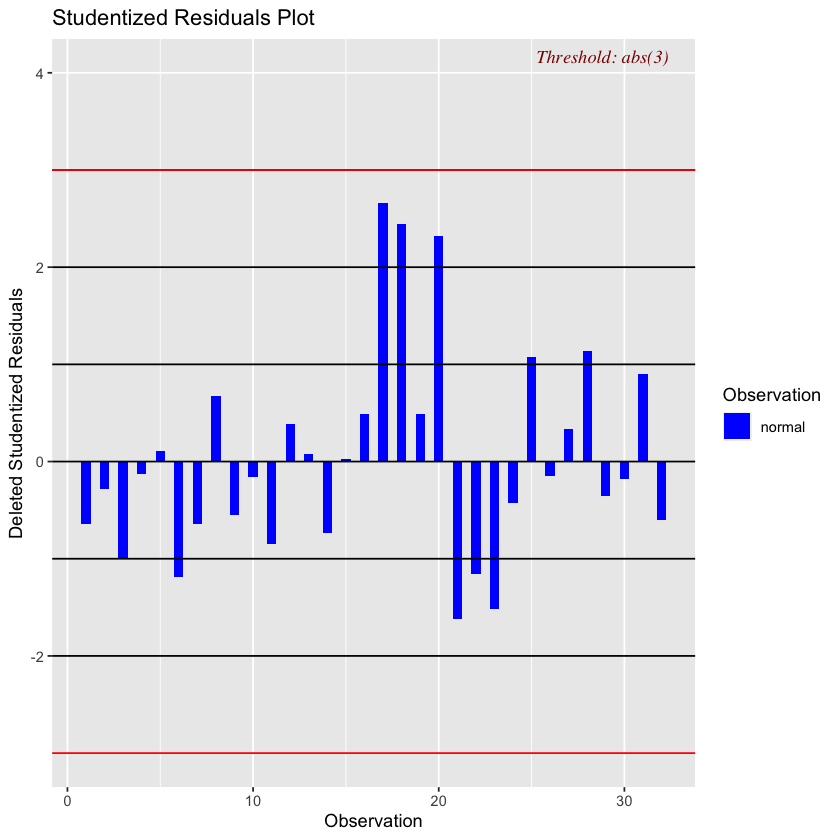

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_resid_stud(model)

#### Standardized Residual Chart

Chart for detecting outliers. Standardized residual (internally studentized) is the residual divided by estimated standard deviation.

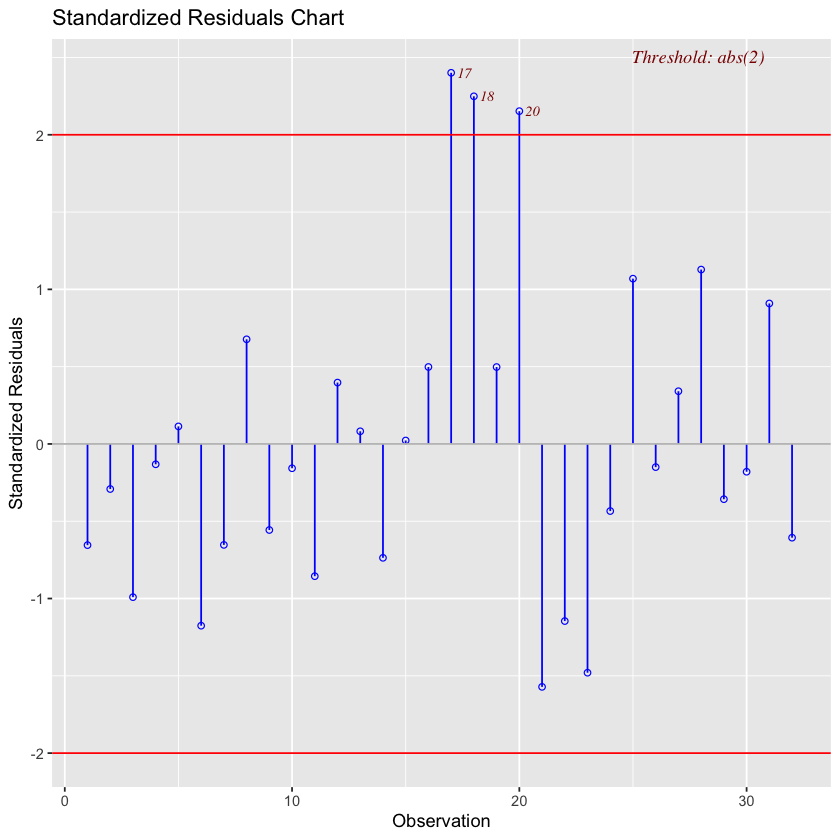

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_resid_stand(model)

#### Studentized Residuals vs Leverage Plot

Graph for detecting influential observations.

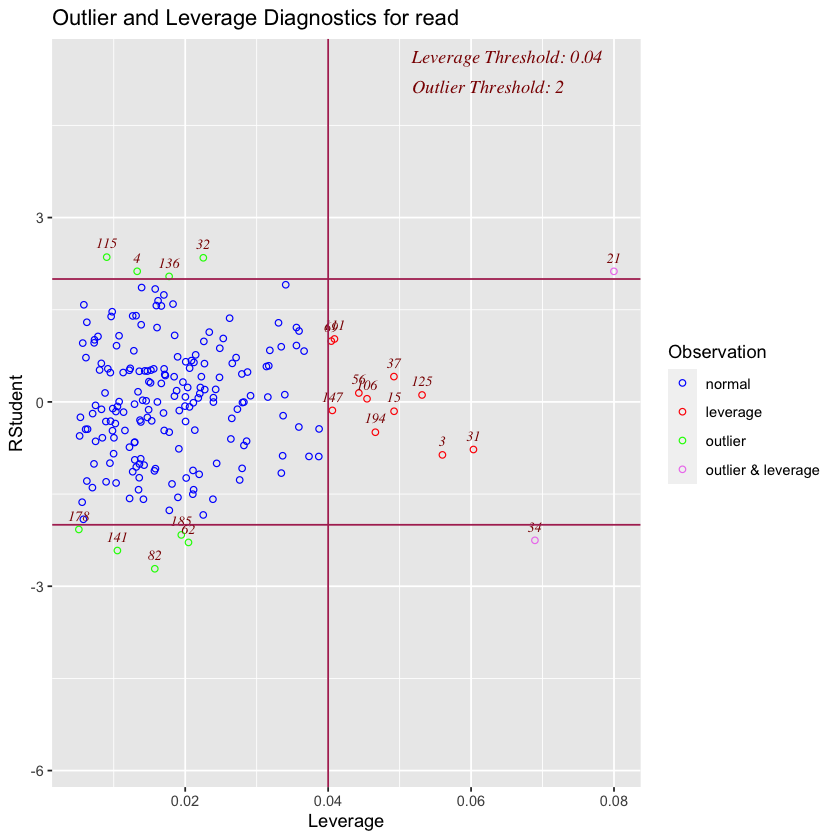

In [ ]:
model <- lm(read ~ write + math + science, data = hsb)
ols_plot_resid_lev(model)

#### Deleted Studentized Residual vs Fitted Values Plot

Graph for detecting outliers.

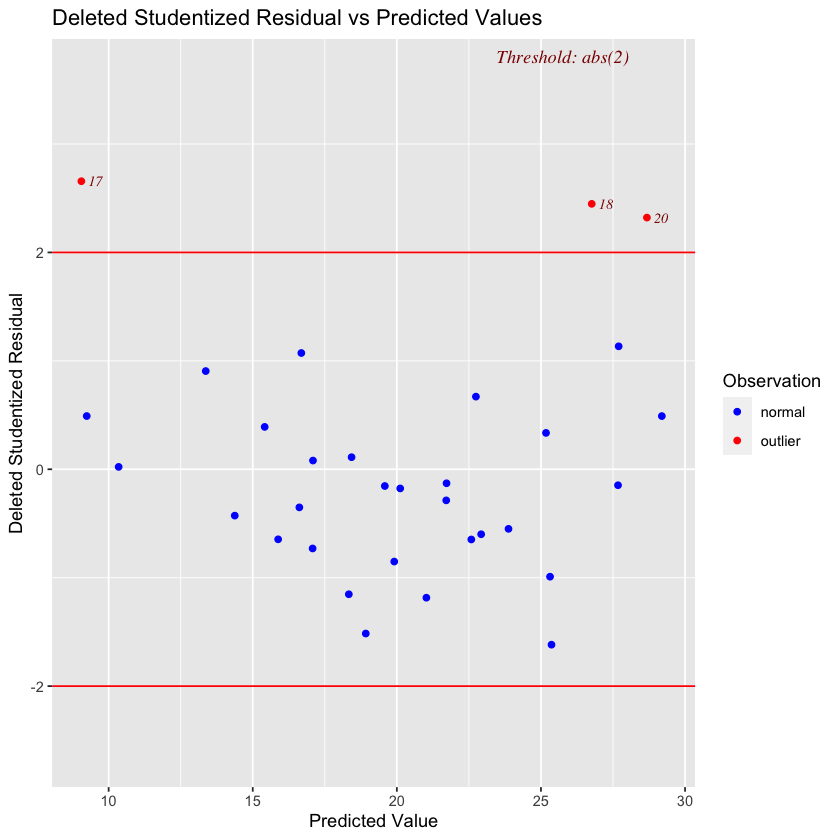

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_resid_stud_fit(model)

#### Hadi Plot

Hadi’s measure of influence based on the fact that influential observations can be present in either the response variable or in the predictors or both. The plot is used to detect influential observations based on Hadi’s measure.

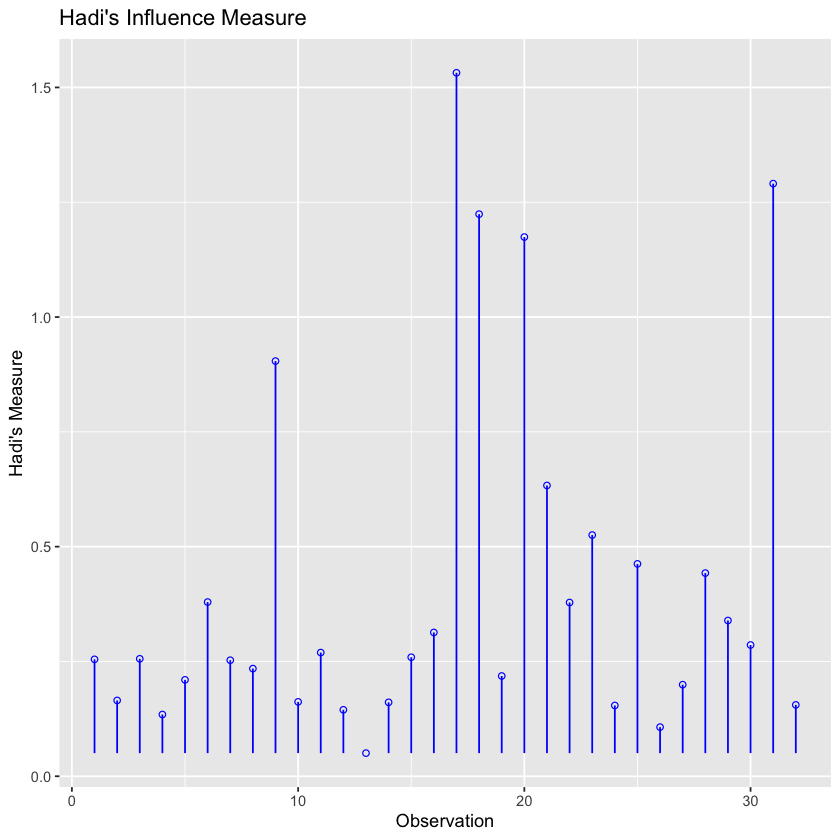

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_hadi(model)

#### Potential Residual Plot

Plot to aid in classifying unusual observations as high-leverage points, outliers, or a combination of both.

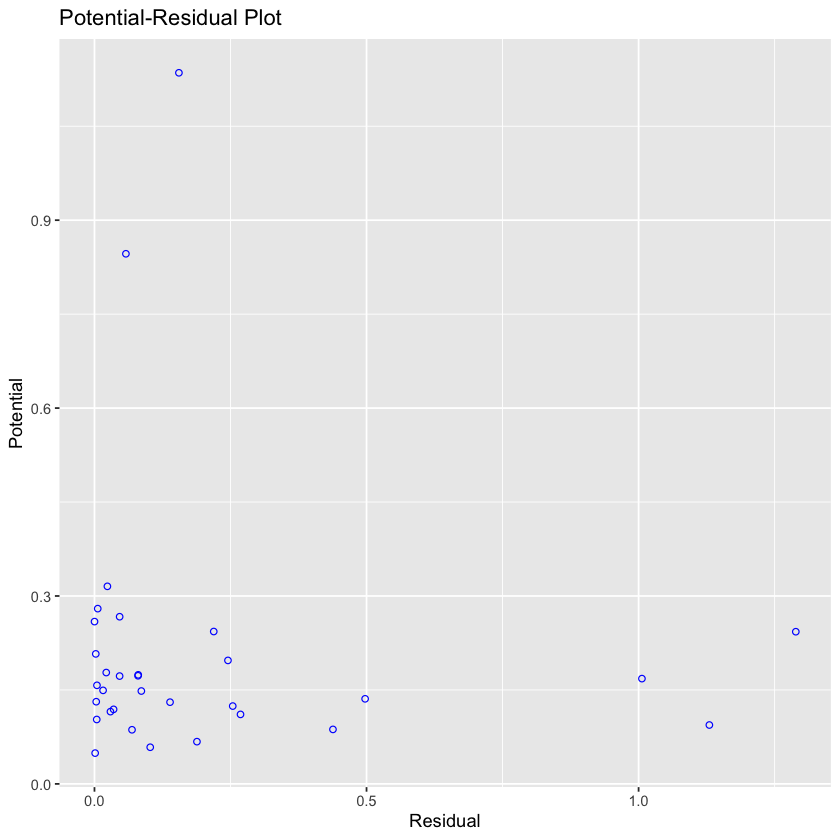

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_resid_pot(model)

### (f) Collinearity Diagnostics, Model Fit & Variable Contribution

#### Collinearity Diagnostics

Collinearity implies two variables are near perfect linear combinations of one another. Multicollinearity involves more than two variables. In the presence of multicollinearity, regression estimates are unstable and have high standard errors.

##### VIF

Variance inflation factors measure the inflation in the variances of the parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is “inflated” by the existence of correlation among the predictor variables in the model. A VIF of 1 means that there is no correlation among the kth predictor and the remaining predictor variables, and hence the variance of $\beta_k$ is not inflated at all. The general rule of thumb is that VIFs exceeding 4 warrant further investigation, while VIFs exceeding 10 are signs of serious multicollinearity requiring correction.

Steps to calculate VIF:

* Regress the $k^{th}$ predictor on rest of the predictors in the model.
* Compute the $R^2_k$

$VIF = \frac{1}{1 - {R}^{2}_{k}} = \frac{1}{Tolerance}$

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_vif_tol(model)

Variables Tolerance VIF     
1 disp      0.1252279 7.985439
2 hp        0.1935450 5.166758
3 wt        0.1445726 6.916942
4 qsec      0.3191708 3.133119

##### Tolerance

Percent of variance in the predictor that cannot be accounted for by other predictors.

Steps to calculate tolerance:
* Regress the $k^{th}$ predictor on rest of the predictors in the model.
* Compute the ${R}^{2}_{k}$

  $Tolerance = 1 - {R}^{2}_{k}$

##### Condition Index

Most multivariate statistical approaches involve decomposing a correlation matrix into linear combinations of variables. The linear combinations are chosen so that the first combination has the largest possible variance (subject to some restrictions we won’t discuss), the second combination has the next largest variance, subject to being uncorrelated with the first, the third has the largest possible variance, subject to being uncorrelated with the first and second, and so forth. The variance of each of these linear combinations is called an eigenvalue. Collinearity is spotted by finding 2 or more variables that have large proportions of variance (.50 or more) that correspond to large condition indices. A rule of thumb is to label as large those condition indices in the range of 30 or larger.

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_eigen_cindex(model)

Eigenvalue  Condition Index intercept   disp        hp          wt          
1 4.721487187  1.000000       0.000123237 0.001132468 0.001413094 0.0005253393
2 0.216562203  4.669260       0.002617424 0.036811051 0.027751289 0.0002096014
3 0.050416837  9.677242       0.001656551 0.120881424 0.392366164 0.0377028008
4 0.010104757 21.616057       0.025805998 0.777260487 0.059594623 0.7017528428
5 0.001429017 57.480524       0.969796790 0.063914571 0.518874831 0.2598094157
  qsec        
1 0.0001277169
2 0.0046789491
3 0.0001952599
4 0.0024577686
5 0.9925403056

##### Collinearity Diagnostics

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_coll_diag(model)

Tolerance and Variance Inflation Factor
---------------------------------------
  Variables Tolerance      VIF
1      disp 0.1252279 7.985439
2        hp 0.1935450 5.166758
3        wt 0.1445726 6.916942
4      qsec 0.3191708 3.133119


Eigenvalue and Condition Index
------------------------------
   Eigenvalue Condition Index   intercept        disp          hp           wt
1 4.721487187        1.000000 0.000123237 0.001132468 0.001413094 0.0005253393
2 0.216562203        4.669260 0.002617424 0.036811051 0.027751289 0.0002096014
3 0.050416837        9.677242 0.001656551 0.120881424 0.392366164 0.0377028008
4 0.010104757       21.616057 0.025805998 0.777260487 0.059594623 0.7017528428
5 0.001429017       57.480524 0.969796790 0.063914571 0.518874831 0.2598094157
          qsec
1 0.0001277169
2 0.0046789491
3 0.0001952599
4 0.0024577686
5 0.9925403056

#### Model Fit Assessment

##### Residual Fit Spread Plot

Plot to detect non-linearity, influential observations and outliers. Consists of side-by-side quantile plots of the centered fit and the residuals. It shows how much variation in the data is explained by the fit and how much remains in the residuals. For inappropriate models, the spread of the residuals in such a plot is often greater than the spread of the centered fit.

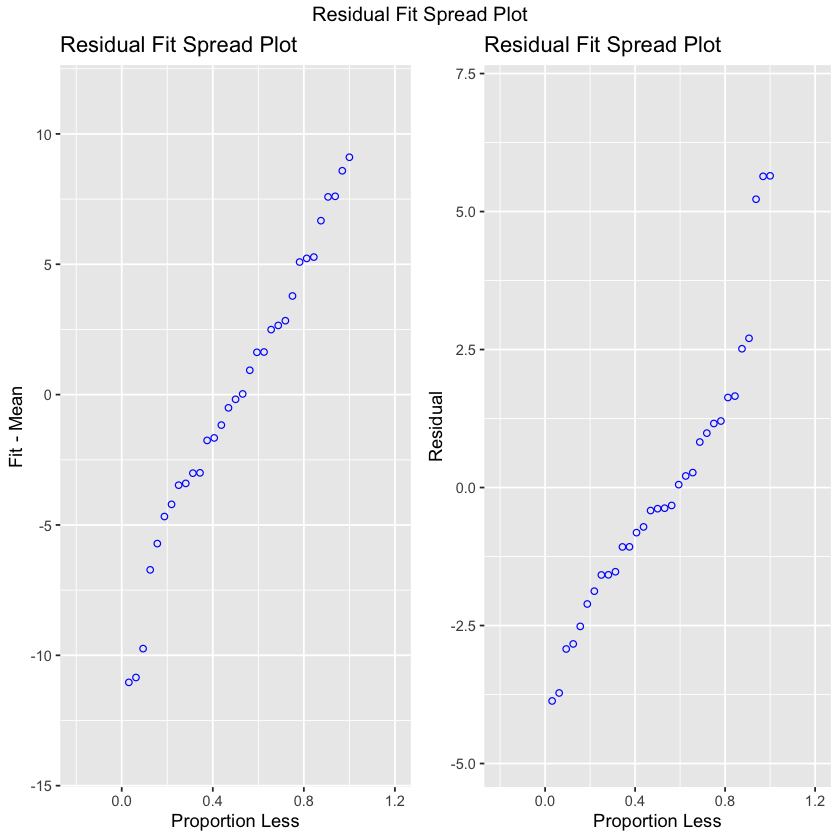

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_resid_fit_spread(model)

##### Part & Partial Correlations

###### Correlations

Relative importance of independent variables in determining Y. How much each variable uniquely contributes to $R^2$ over and above that which can be accounted for by the other predictors.

**Zero Order**  
Pearson correlation coefficient between the dependent variable and the independent variables.

**Part**  
Unique contribution of independent variables. How much $R^2$ will decrease if that variable is removed from the model?

**Partial**  
How much of the variance in Y, which is not estimated by the other independent variables in the model, is estimated by the specific variable?

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_correlations(model)

Zero-order Partial     Part       
disp -0.8475514  0.04773567  0.01940396
hp   -0.7761684 -0.22422544 -0.09341969
wt   -0.8676594 -0.57386614 -0.28451535
qsec  0.4186840  0.21903983  0.09114896

##### Observed vs Predicted Plot

Plot of observed vs fitted values to assess the fit of the model. Ideally, all your points should be close to a regressed diagonal line. Draw such a diagonal line within your graph and check out where the points lie. If your model had a high R Square, all the points would be close to this diagonal line. The lower the R Square, the weaker the Goodness of fit of your model, the more foggy or dispersed your points are from this diagonal line.

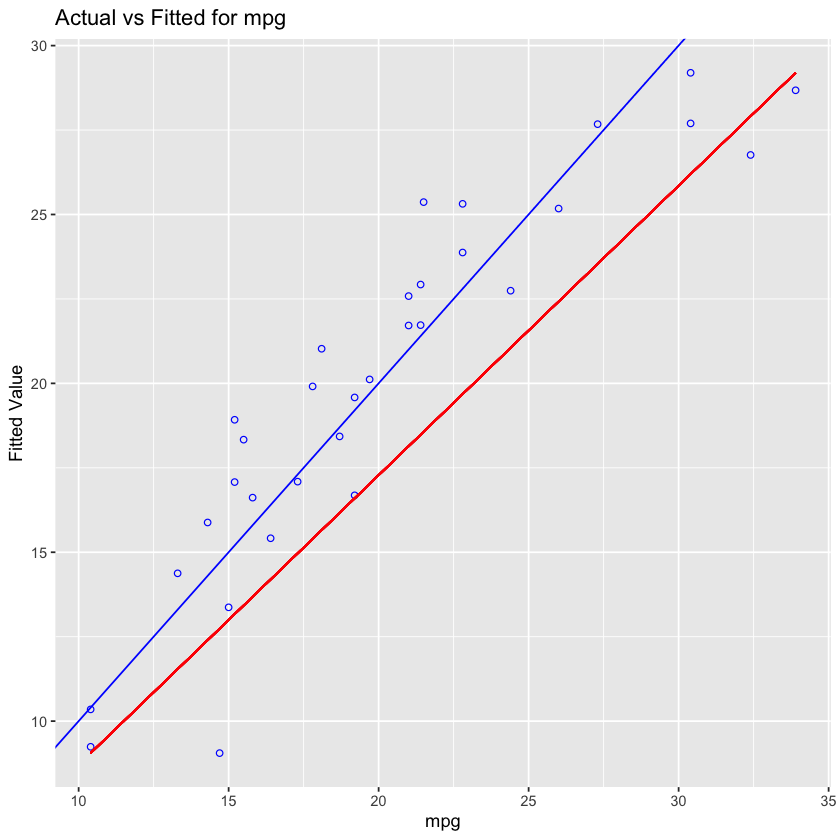

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_obs_fit(model)

##### Lack of Fit F Test

Assess how much of the error in prediction is due to lack of model fit. The residual sum of squares resulting from a regression can be decomposed into 2 components:

* Due to lack of fit
* Due to random variation

If most of the error is due to lack of fit and not just random error, the model should be discarded and a new model must be built. The lack of fit F test works only with simple linear regression. Moreover, it is important that the data contains repeat observations i.e. replicates for at least one of the values of the predictor x. This test generally only applies to datasets with plenty of replicates.

In [ ]:
model <- lm(mpg ~ disp, data = mtcars)
ols_pure_error_anova(model)

Lack of Fit F Test 
-----------------
Response :   mpg 
Predictor:   disp 

                      Analysis of Variance Table                       
----------------------------------------------------------------------
                DF     Sum Sq     Mean Sq     F Value        Pr(>F)    
----------------------------------------------------------------------
disp             1    808.8885    808.8885    314.0095    1.934413e-17 
Residual        30    317.1587    10.57196                             
 Lack of fit    25    304.2787    12.17115    4.724824      0.04563623 
 Pure Error      5       12.88       2.576                             
----------------------------------------------------------------------

##### Diagnostics Panel

Panel of plots for regression diagnostics

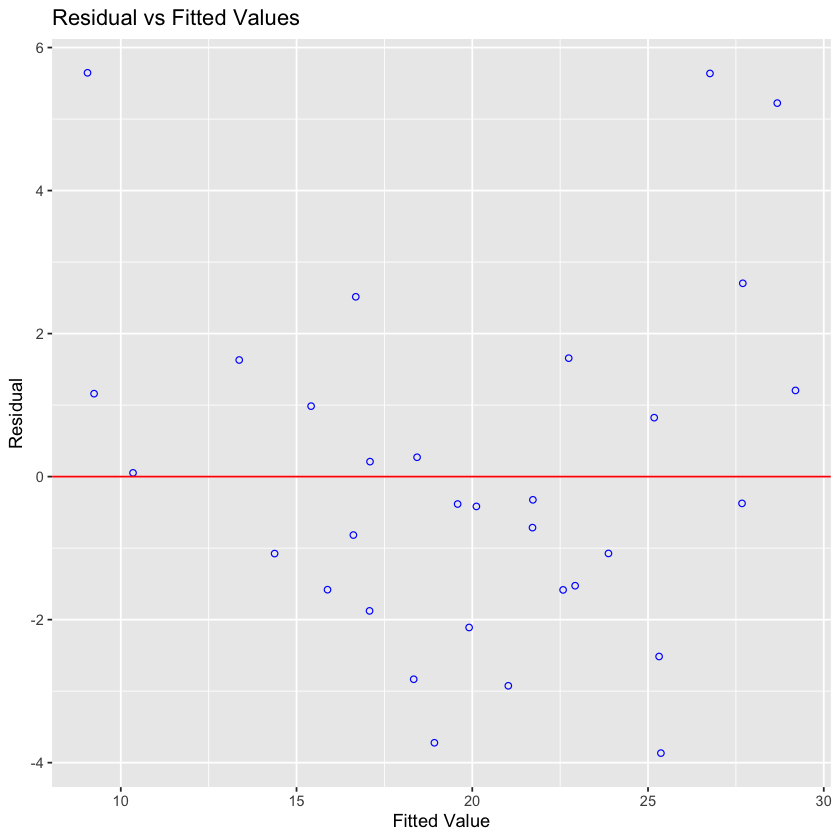

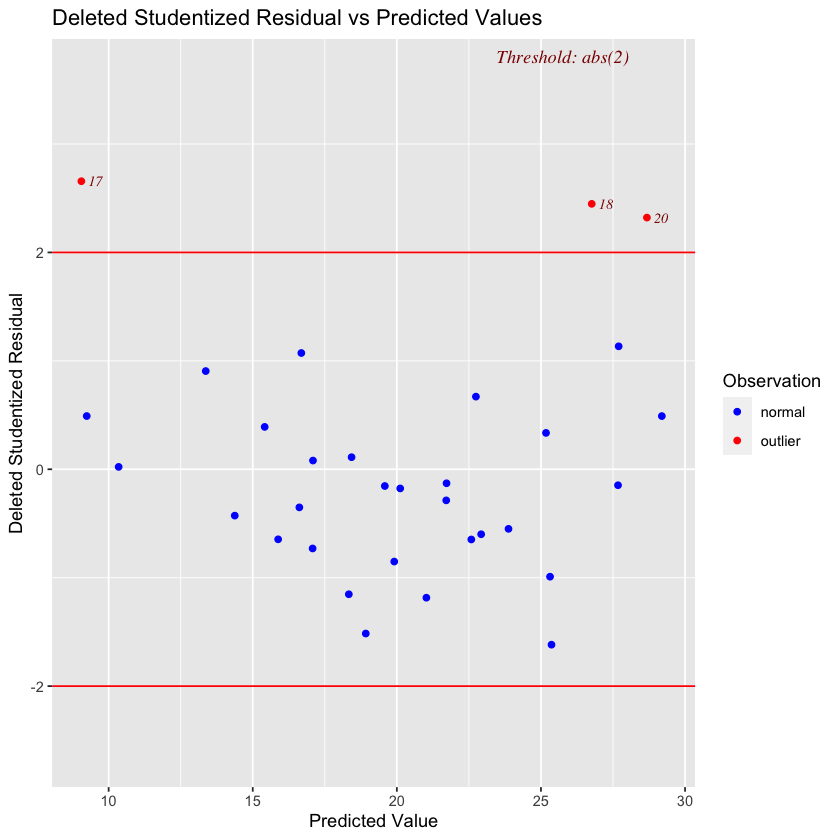

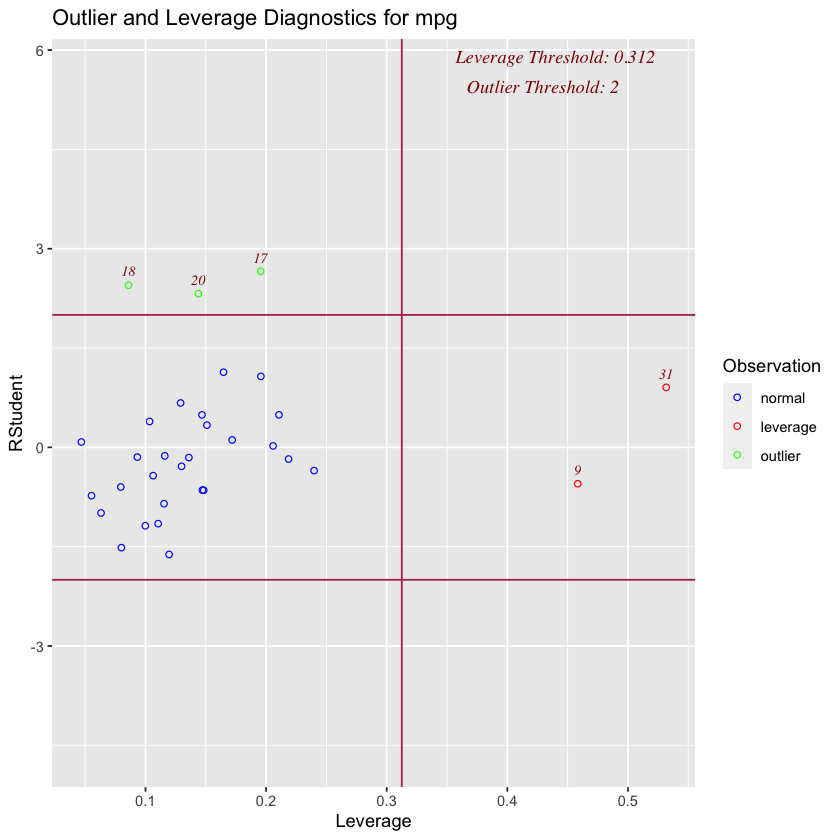

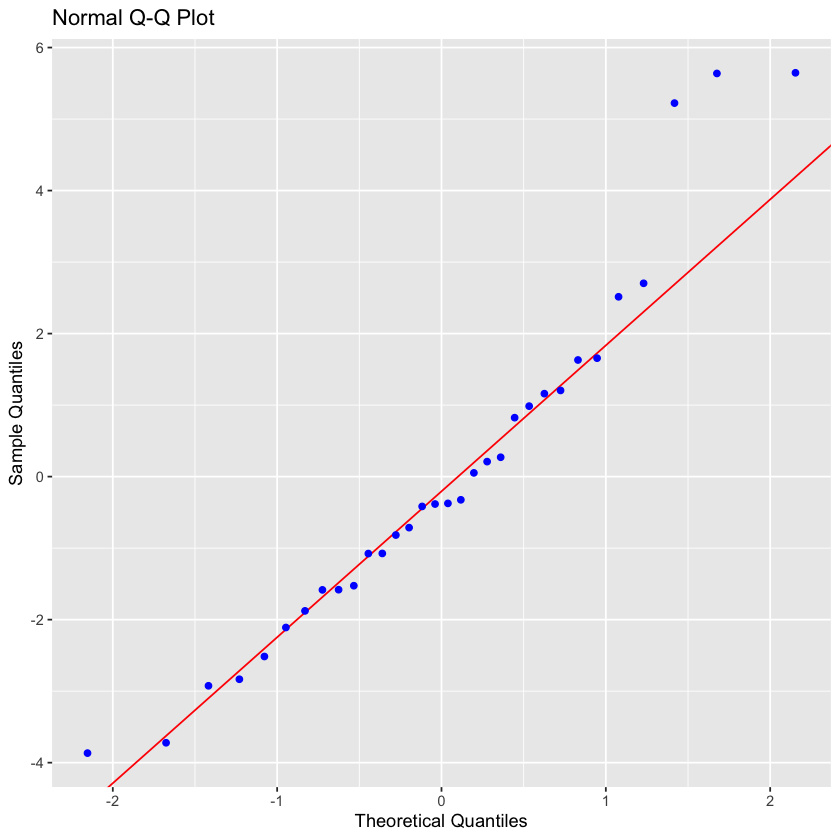

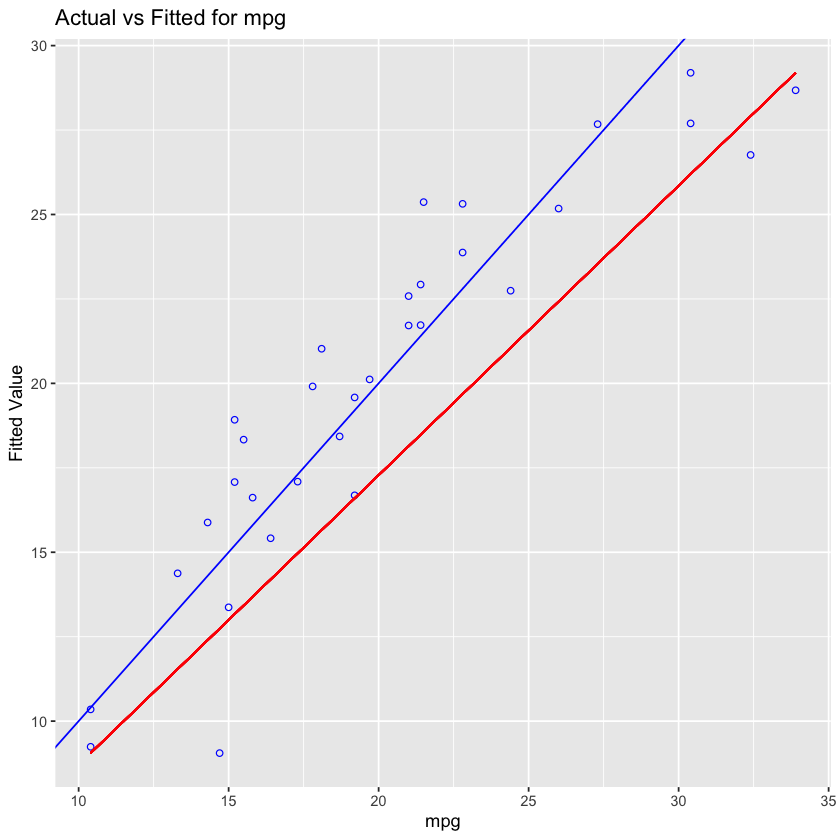

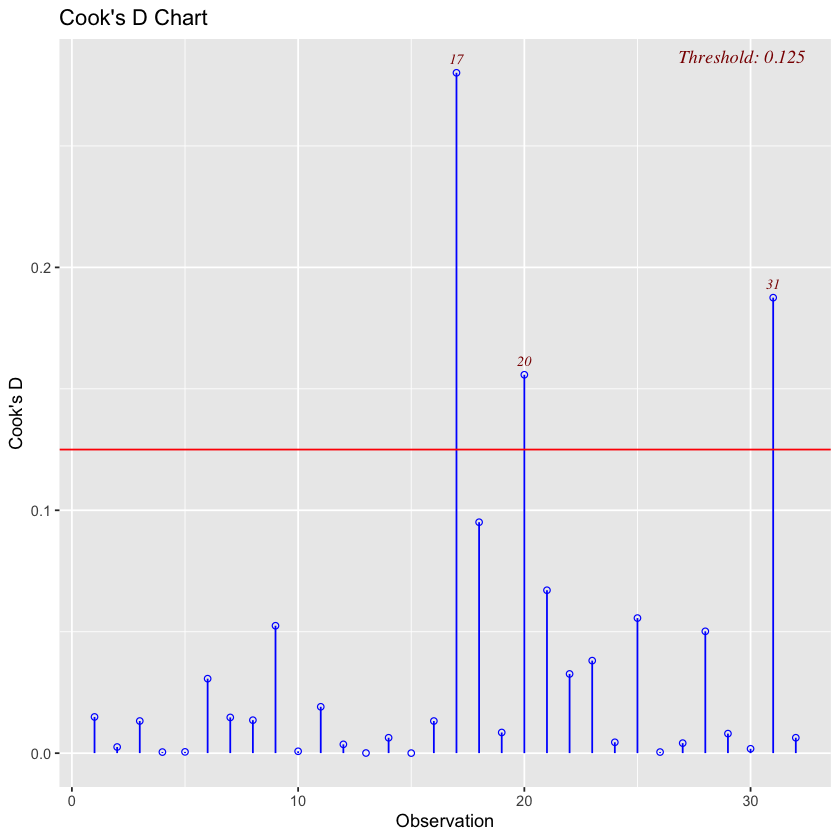

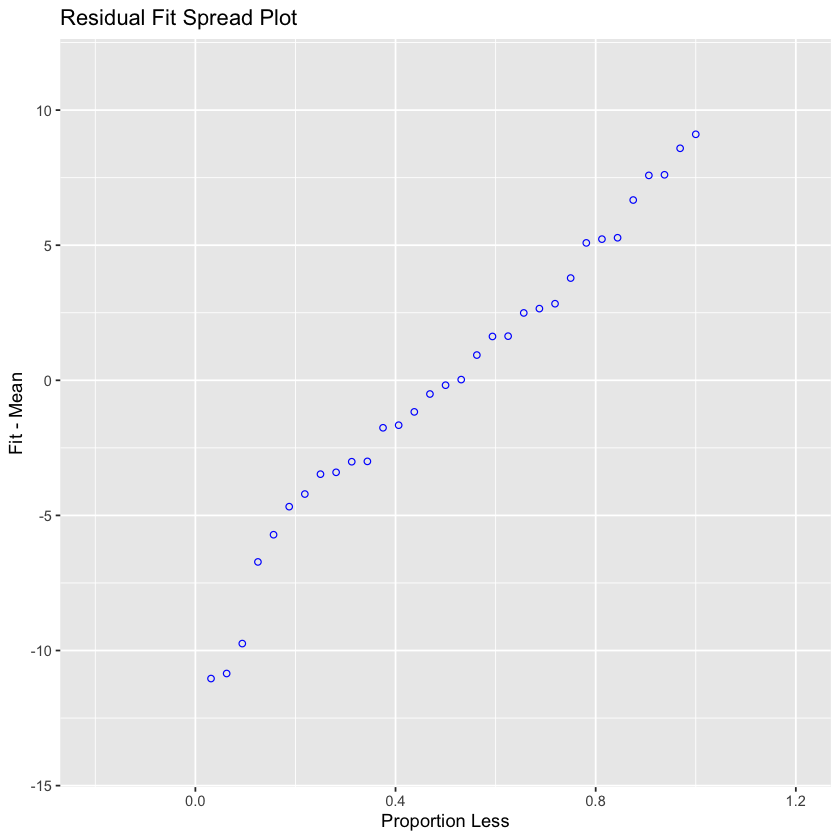

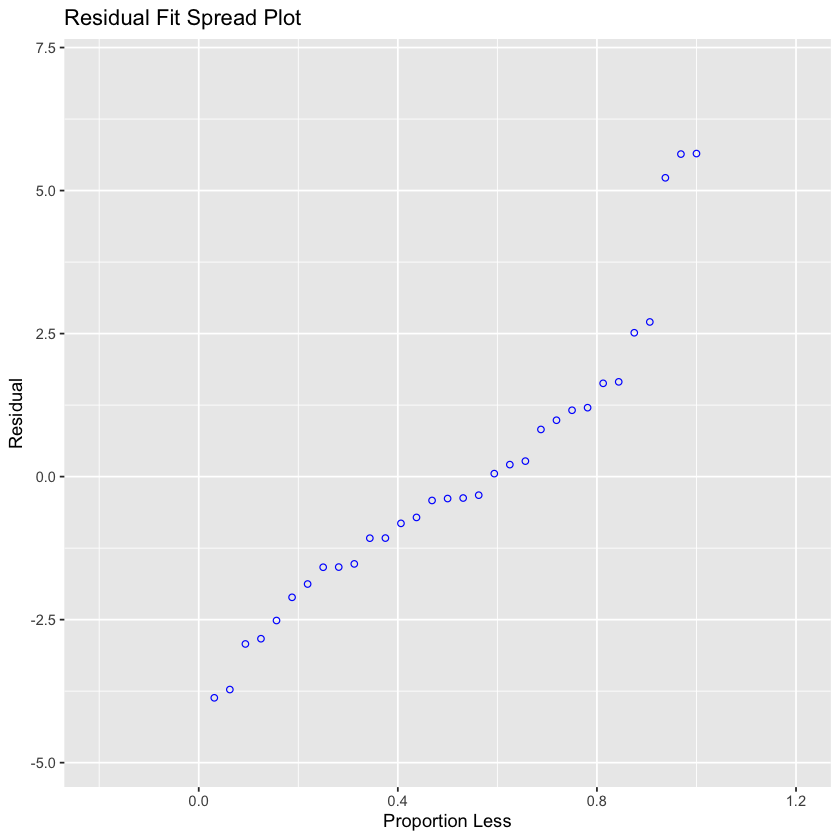

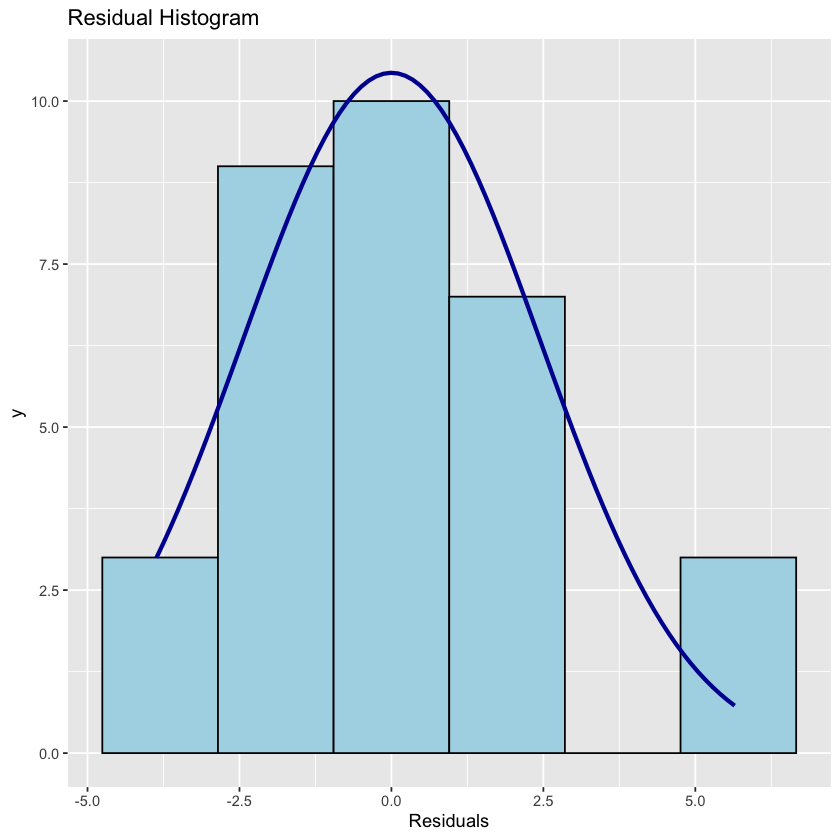

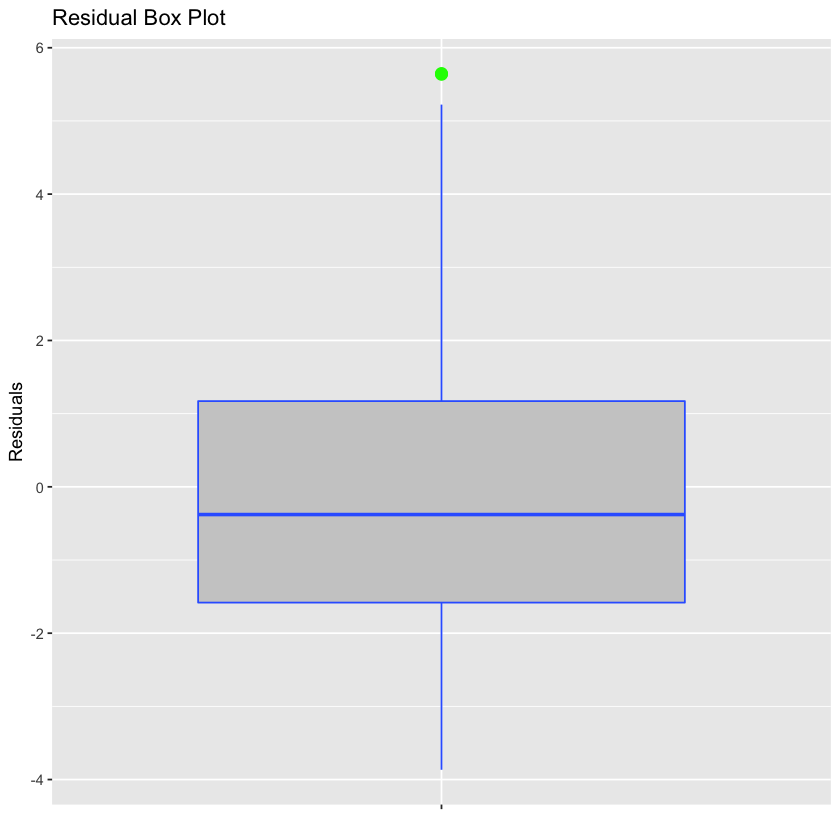

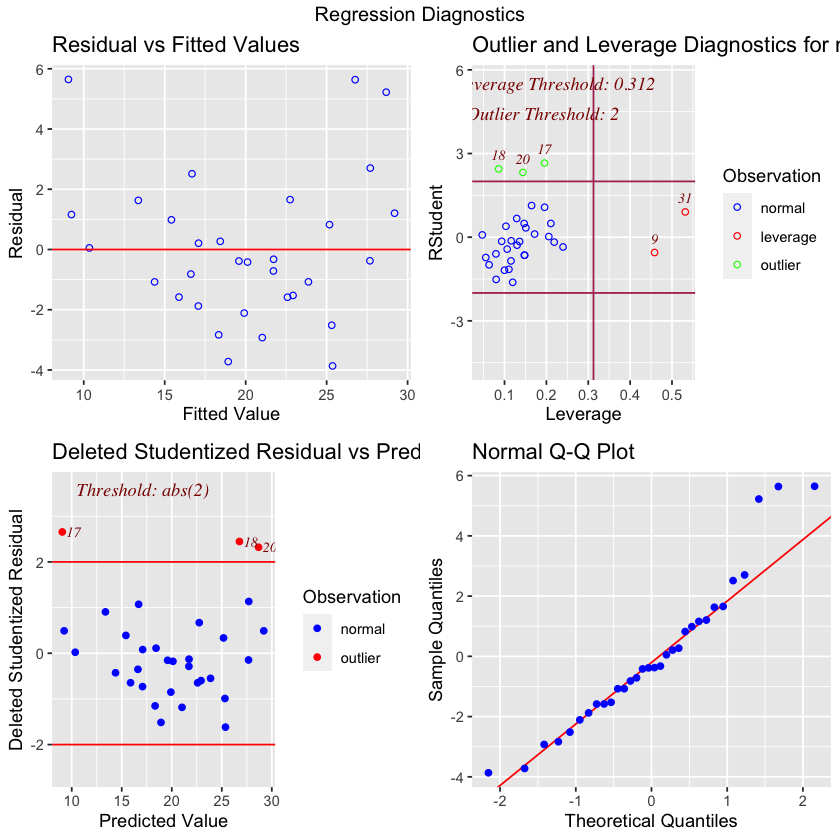

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL


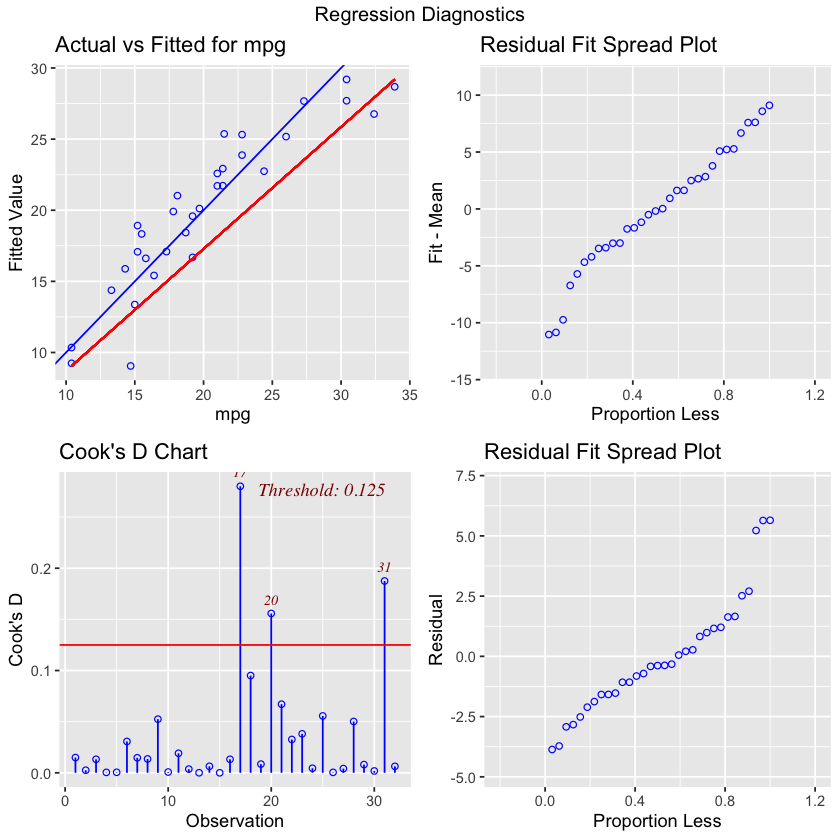

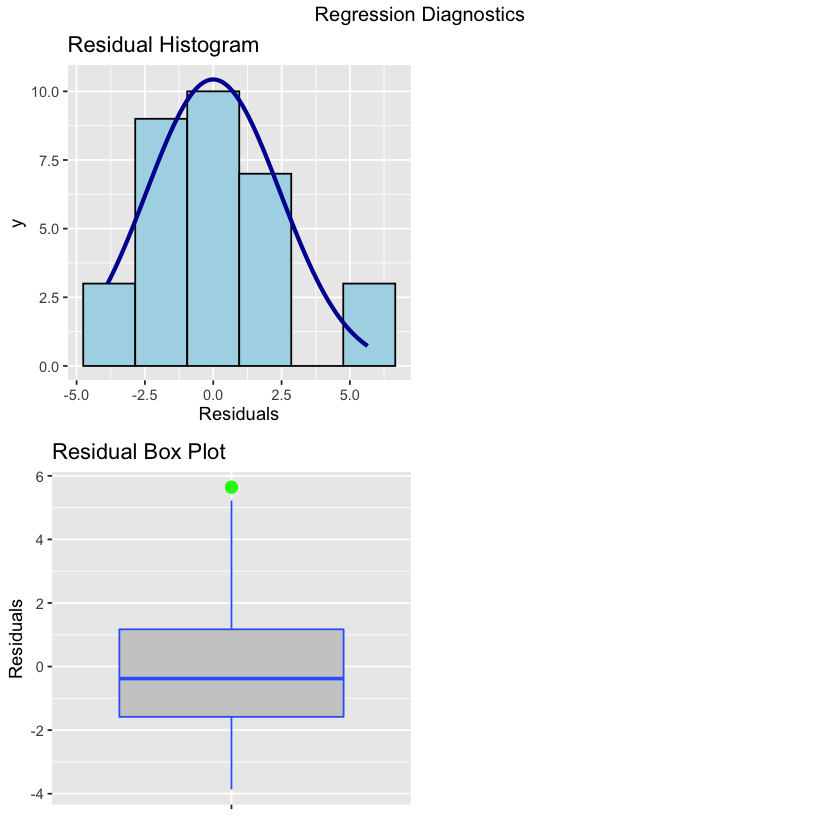

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_diagnostics(model)

#### Variable Contributions

##### Residual vs Regressor Plots

Graph to determine whether we should add a new predictor to the model already containing other predictors. The residuals from the model is regressed on the new predictor and if the plot shows non random pattern, you should consider adding the new predictor to the model.

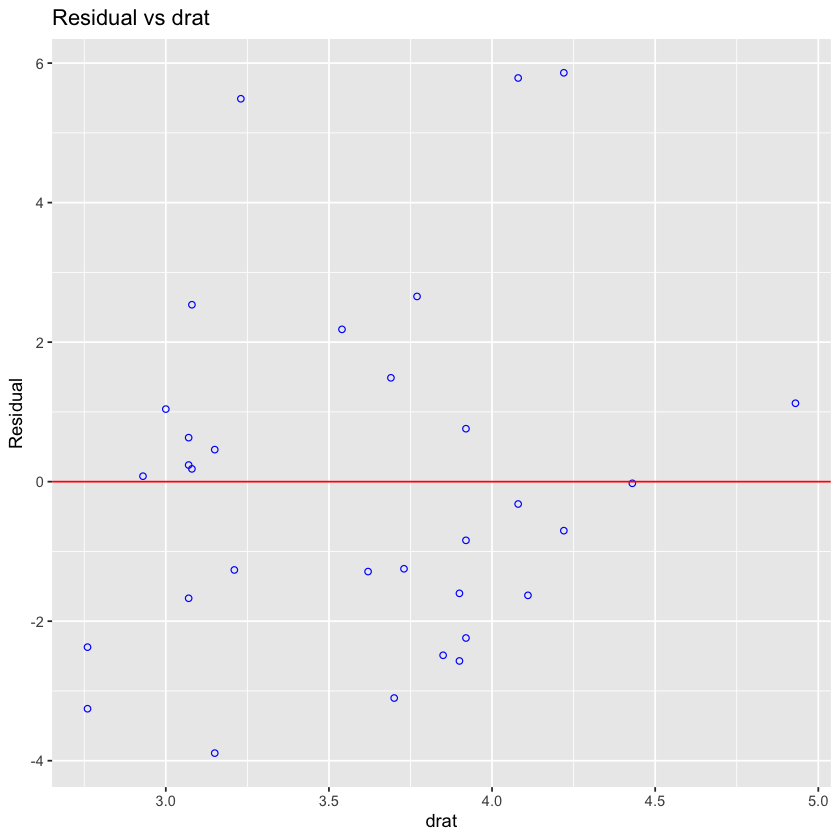

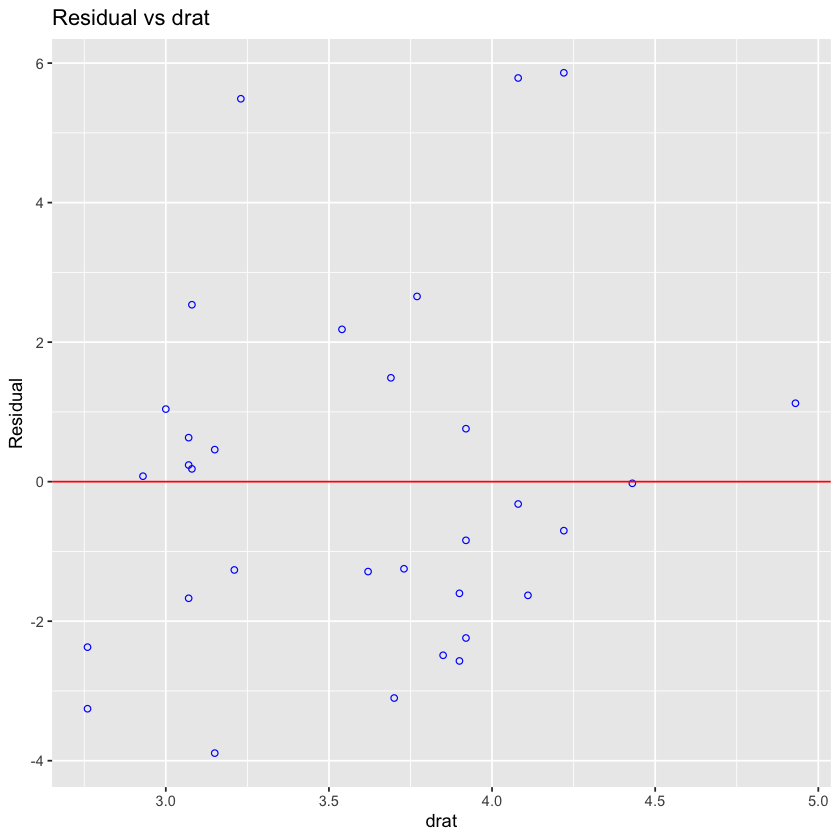

In [ ]:
model <- lm(mpg ~ disp + hp + wt, data = mtcars)
ols_plot_resid_regressor(model, 'drat')

##### Added Variable Plot

Added variable plot provides information about the marginal importance of a predictor variable $𝑘$, given the other predictor variables already in the model. It shows the marginal importance of the variable in reducing the residual variability.

The added variable plot was introduced by Mosteller and Tukey (1977). It enables us to visualize the regression coefficient of a new variable being considered to be included in a model. The plot can be constructed for each predictor variable.

Let us assume we want to test the effect of adding/removing variable X from a model. Let the response variable of the model be Y

Steps to construct an added variable plot:

* Regress Y on all variables other than X and store the residuals (Y residuals).
* Regress X on all the other variables included in the model (X residuals).
* Construct a scatter plot of Y residuals and X residuals.

What do the Y and X residuals represent? The Y residuals represent the part of Y not explained by all the variables other than X. The X residuals represent the part of X not explained by other variables. The slope of the line fitted to the points in the added variable plot is equal to the regression coefficient when Y is regressed on all variables including X.

A strong linear relationship in the added variable plot indicates the increased importance of the contribution of X to the model already containing the other predictors.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



[[1]]
NULL


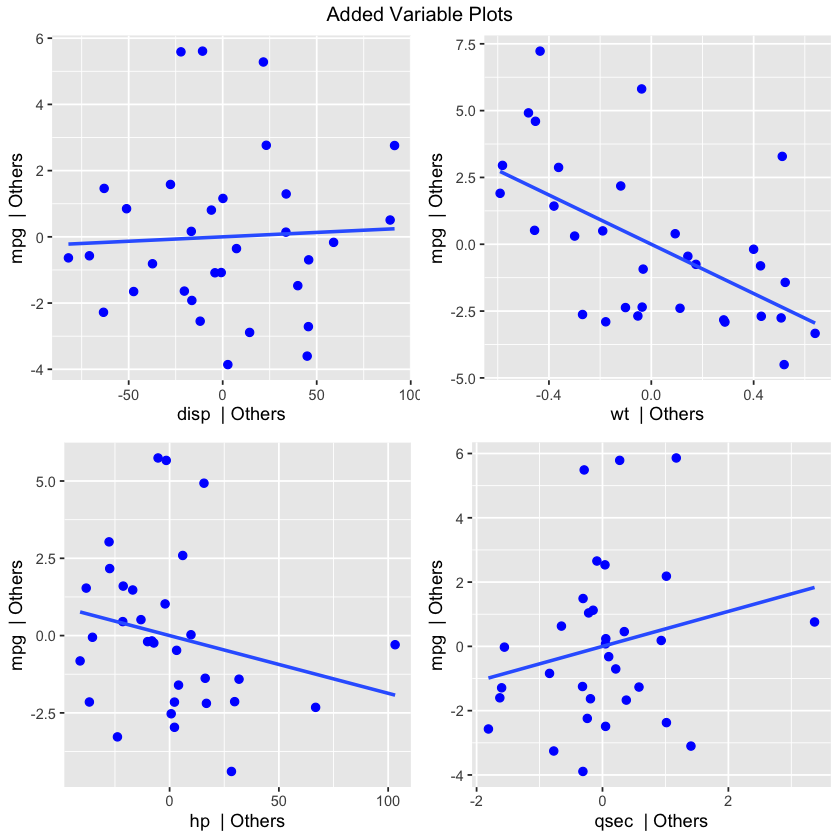

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_added_variable(model)

##### Residual Plus Component Plot

The residual plus component plot was introduced by Ezekeil (1924). It was called as Partial Residual Plot by Larsen and McCleary (1972). Hadi and Chatterjee (2012) called it the residual plus component plot.

Steps to construct the plot:

* Regress Y on all variables including X and store the residuals (e).
* Multiply e with regression coefficient of X (eX).
* Construct scatter plot of eX and X

The residual plus component plot indicates whether any non-linearity is present in the relationship between Y and X and can suggest possible transformations for linearizing the data.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



[[1]]
NULL


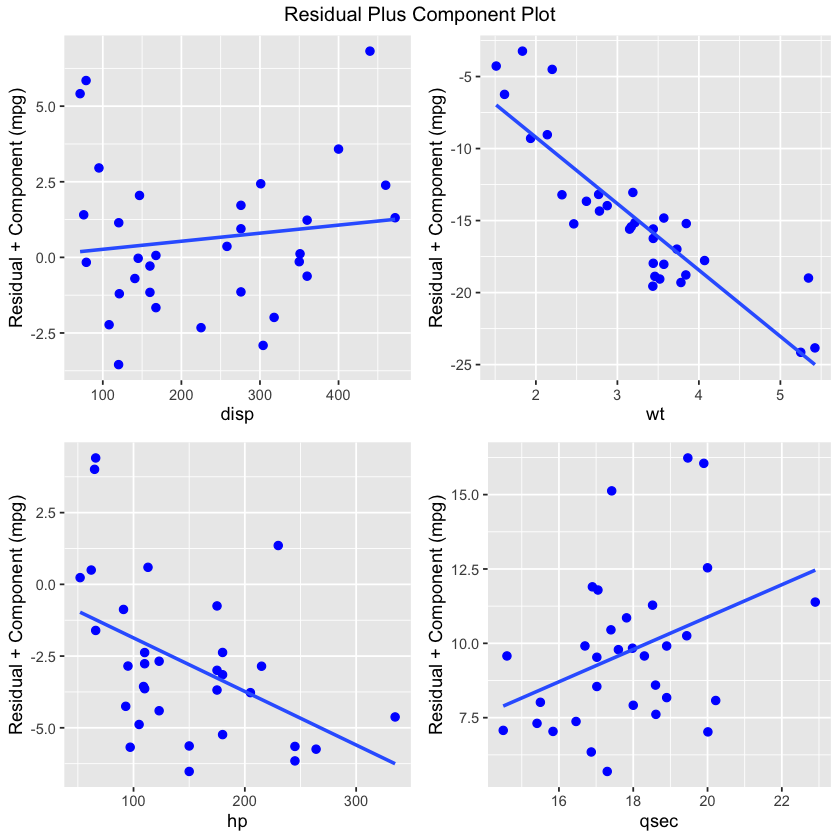

In [ ]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_comp_plus_resid(model)

## The blorr Package

In [ ]:
#Installation
# Install blorr from CRAN
#install.packages("blorr")

# Install development version from GitHub
# install.packages("devtools")
#devtools::install_github("rsquaredacademy/blorr")

# Install the development version from `rsquaredacademy` universe
#install.packages("blorr", repos = "https://rsquaredacademy.r-universe.dev")

#install.packages("magrittr")

In [ ]:
#Usage
#blorr uses consistent prefix blr_* for easy tab completion.
library(blorr)
library(magrittr)

Warning message:
"package 'blorr' was built under R version 4.1.3"
Warning message:
"package 'magrittr' was built under R version 4.1.2"


### (a) A Short Introduction to the blorr Package

#### Introduction

The blorr package offers tools for building and validating binary logistic regression models. It is most suitable for beginner/intermediate R users and those who teach statistics using R. The API is very simple and most of the functions take either a data.frame/tibble or a model as input. blorr use consistent prefix blr_ for easy tab completion.

#### Data

To demonstrate the features of blorr, we will use the bank marketing data set. The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (‘yes’) or not (‘no’) subscribed. It contains a random sample (~4k) of the original data set which can be found at https://archive.ics.uci.edu/ml/datasets/bank+marketing.

#### Bivariate Analysis

Let us begin with careful bivariate analysis of each possible variable and the outcome variable. We will use information value and likelihood ratio chi square test for selecting the initial set of predictors for our model. The bivariate analysis is currently avialable for categorical predictors only.

In [ ]:
blr_bivariate_analysis(bank_marketing, y, job, marital, education, default, 
  housing, loan, contact, poutcome)

                          Bivariate Analysis                           
----------------------------------------------------------------------
Variable     Information Value    LR Chi Square    LR DF    LR p-value 
----------------------------------------------------------------------
   job             0.16              75.2690        11        0.0000   
 marital           0.05              21.6821         2        0.0000   
education          0.05              25.0466         3        0.0000   
 default           0.02              6.0405          1        0.0140   
 housing           0.16              72.2813         1        0.0000   
  loan             0.06              26.6615         1        0.0000   
 contact           0.31             124.3834         2        0.0000   
poutcome           0.53             270.6450         3        0.0000   
----------------------------------------------------------------------

##### Weight of Evidence & Information Value

Weight of evidence (WoE) is used to assess the relative risk of di¤erent attributes for a characteristic and as a means to transform characteristics into variables. It is also a very useful tool for binning. The WoE for any group with average odds is zero. A negative WoE indicates that the proportion of defaults is higher for that attribute than the overall proportion and indicates higher risk.

The information value is used to rank order variables in terms of their predictive power. A high information value indicates a high ability to discriminate. Values for the information value will always be positive and may be above 3 when assessing highly predictive characteristics. Characteristics with information values less than 0:10 are typically viewed as weak, while values over 0.30 are sought after.

In [ ]:
blr_woe_iv(bank_marketing, job, y)

                               Weight of Evidence                                
--------------------------------------------------------------------------------
   levels        count_0s    count_1s    dist_0s    dist_1s        woe      iv   
--------------------------------------------------------------------------------
 management        809         130          0.20       0.25      -0.22     0.01  
 technician        682          79          0.17       0.15       0.11     0.00  
entrepreneur       139          12          0.03       0.02       0.40     0.00  
 blue-collar       937          73          0.23       0.14       0.51     0.05  
   unknown          29          2           0.01       0.00       0.61     0.00  
   retired         152          47          0.04       0.09      -0.87     0.05  
   admin.          433          61          0.11       0.12      -0.09     0.00  
  services         392          39          0.10       0.08       0.26     0.01  
self-employed     

###### Plot

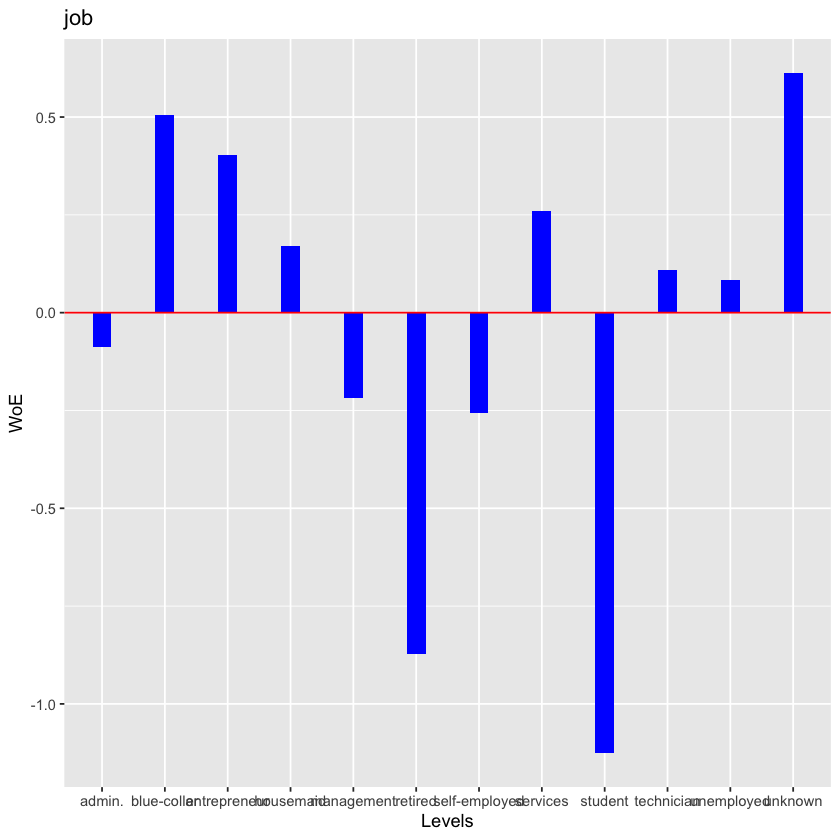

In [ ]:
k <- blr_woe_iv(bank_marketing, job, y)
plot(k)

###### Multiple Variables

We can generate the weight of evidence and information value for multiple variables using blr_woe_iv_stats().

In [ ]:
blr_woe_iv_stats(bank_marketing, y, job, marital, education)

Variable: job

                               Weight of Evidence                                
--------------------------------------------------------------------------------
   levels        count_0s    count_1s    dist_0s    dist_1s        woe      iv   
--------------------------------------------------------------------------------
 management        809         130          0.20       0.25      -0.22     0.01  
 technician        682          79          0.17       0.15       0.11     0.00  
entrepreneur       139          12          0.03       0.02       0.40     0.00  
 blue-collar       937          73          0.23       0.14       0.51     0.05  
   unknown          29          2           0.01       0.00       0.61     0.00  
   retired         152          47          0.04       0.09      -0.87     0.05  
   admin.          433          61          0.11       0.12      -0.09     0.00  
  services         392          39          0.10       0.08       0.26     0.01  
sel

blr_woe_iv() and blr_woe_iv_stats() are currently avialable for categorical predictors only.

#### Stepwise Selection

For the initial/ first cut model, all the independent variables are put into the model. Our goal is to include a limited number of independent variables (5-15) which are all significant, without sacrificing too much on the model performance. The rationale behind not-including too many variables is that the model would be over fitted and would become unstable when tested on the validation sample. The variable reduction is done using forward or backward or stepwise variable selection procedures. We will use blr_step_aic_both() to shortlist predictors for our model.

##### Model

In [ ]:
model <- glm(y ~ ., data = bank_marketing, family = binomial(link = 'logit'))

###### Selection Summary

In [ ]:
blr_step_aic_both(model)

Stepwise Selection Method 
-------------------------

Candidate Terms: 

1 . age 
2 . job 
3 . marital 
4 . education 
5 . default 
6 . balance 
7 . housing 
8 . loan 
9 . contact 
10 . day 
11 . month 
12 . duration 
13 . campaign 
14 . pdays 
15 . previous 
16 . poutcome 


Variables Entered/Removed: 

- duration added 
- poutcome added 
- month added 
- contact added 
- housing added 
- loan added 
- campaign added 
- marital added 
- education added 
- age added 

No more variables to be added or removed.



                     Stepwise Summary                      
---------------------------------------------------------
Variable      Method       AIC         BIC       Deviance 
---------------------------------------------------------
duration     addition    2674.384    2687.217    2670.384 
poutcome     addition    2396.014    2428.097    2386.014 
month        addition    2274.109    2376.773    2242.109 
contact      addition    2207.884    2323.381    2171.884 
housing      addition    2184.550    2306.463    2146.550 
loan         addition    2171.972    2300.302    2131.972 
campaign     addition    2164.164    2298.910    2122.164 
marital      addition    2158.524    2306.103    2112.524 
education    addition    2155.837    2322.666    2103.837 
age          addition    2154.272    2327.517    2100.272 
---------------------------------------------------------


###### Plot

Stepwise Selection Method 
-------------------------

Candidate Terms: 

1 . age 
2 . job 
3 . marital 
4 . education 
5 . default 
6 . balance 
7 . housing 
8 . loan 
9 . contact 
10 . day 
11 . month 
12 . duration 
13 . campaign 
14 . pdays 
15 . previous 
16 . poutcome 


Variables Entered/Removed: 

- duration added 
- poutcome added 
- month added 
- contact added 
- housing added 
- loan added 
- campaign added 
- marital added 
- education added 
- age added 

No more variables to be added or removed.

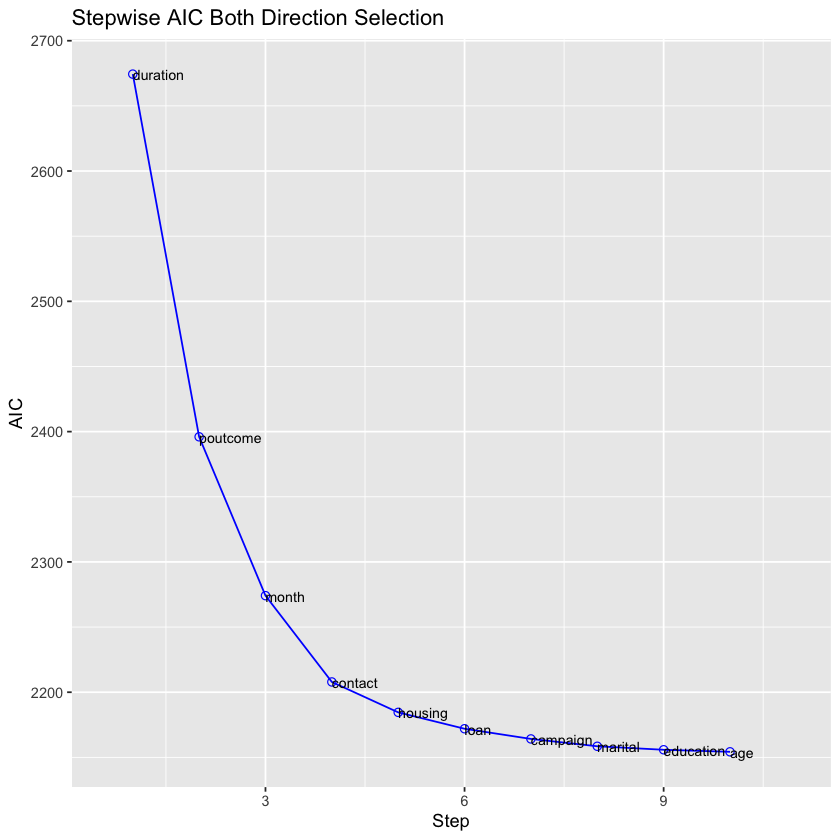

In [ ]:
model %>%
  blr_step_aic_both() %>%
  plot()

#### Regression Output

##### Model

We can use bivariate analysis and stepwise selection procedure to shortlist predictors and build the model using the glm(). The predictors used in the below model are for illustration purposes and not necessarily shortlisted from the bivariate analysis and variable selection procedures.

In [ ]:
model <- glm(y ~  age + duration + previous + housing + default +
             loan + poutcome + job + marital, data = bank_marketing, 
             family = binomial(link = 'logit'))

Use blr_regress() to generate comprehensive regression output. It accepts either of the following

* model built using glm()
* model formula and data

###### Using Model

Let us look at the output generated from blr_regress():

In [ ]:
blr_regress(model)

                             Model Overview                              
------------------------------------------------------------------------
Data Set    Resp Var    Obs.    Df. Model    Df. Residual    Convergence 
------------------------------------------------------------------------
  data         y        4521      4520           4498           TRUE     
------------------------------------------------------------------------

                    Response Summary                     
--------------------------------------------------------
Outcome        Frequency        Outcome        Frequency 
--------------------------------------------------------
   0             4004              1              517    
--------------------------------------------------------

                     Maximum Likelihood Estimates                       
-----------------------------------------------------------------------
   Parameter        DF    Estimate    Std. Error    z value     Pr(

If you want to examine the odds ratio estimates, set odd_conf_limit to TRUE. The odds ratio estimates are not explicitly computed as we observed considerable increase in computation time when dealing with large data sets.

###### Using Formula

Let us use the model formula and the data set to generate the above results.

In [ ]:
blr_regress(y ~  age + duration + previous + housing + default +
             loan + poutcome + job + marital, data = bank_marketing)

                             Model Overview                              
------------------------------------------------------------------------
Data Set    Resp Var    Obs.    Df. Model    Df. Residual    Convergence 
------------------------------------------------------------------------
  data         y        4521      4520           4498           TRUE     
------------------------------------------------------------------------

                    Response Summary                     
--------------------------------------------------------
Outcome        Frequency        Outcome        Frequency 
--------------------------------------------------------
   0             4004              1              517    
--------------------------------------------------------

                     Maximum Likelihood Estimates                       
-----------------------------------------------------------------------
   Parameter        DF    Estimate    Std. Error    z value     Pr(

#### Model Fit Statistics

Model fit statistics are available to assess how well the model fits the data and to compare two different models.The output includes likelihood ratio test, AIC, BIC and a host of pseudo r-squared measures. You can read more about pseudo r-squared at https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-pseudo-r-squareds/.

##### Single Model

In [ ]:
blr_model_fit_stats(model)

                               Model Fit Statistics                                
----------------------------------------------------------------------------------
Log-Lik Intercept Only:     -1607.330    Log-Lik Full Model:             -1123.340 
Deviance(4498):              2246.679    LR(22):                           967.980 
                                         Prob > LR:                          0.000 
MCFadden's R2                   0.301    McFadden's Adj R2:                  0.287 
ML (Cox-Snell) R2:              0.193    Cragg-Uhler(Nagelkerke) R2:         0.379 
McKelvey & Zavoina's R2:        0.388    Efron's R2:                         0.278 
Count R2:                       0.904    Adj Count R2:                       0.157 
BIC:                         2440.259    AIC:                             2292.679 
----------------------------------------------------------------------------------


#### Model Validation

##### Confusion Matrix

In the event of deciding a cut-off point on the probability scores of a logistic regression model, a confusion matrix is created corresponding to a particular cut-off. The observations with probability scores above the cut-off score are predicted to be events and those below the cut-off score, as non-events. The confusion matrix, a 2X2 table, then calculates the number of correctly classified and miss-classified observations.

In [ ]:
blr_confusion_matrix(model, cutoff = 0.5)

Confusion Matrix and Statistics 

          Reference
Prediction    0    1
         0 3920  352
         1   84  165


                Accuracy : 0.9036 
     No Information Rate : 0.8856 

                   Kappa : 0.3851 

McNemars's Test P-Value  : 0.0000 

             Sensitivity : 0.3191 
             Specificity : 0.9790 
          Pos Pred Value : 0.6627 
          Neg Pred Value : 0.9176 
              Prevalence : 0.1144 
          Detection Rate : 0.0365 
    Detection Prevalence : 0.0551 
       Balanced Accuracy : 0.6491 
               Precision : 0.6627 
                  Recall : 0.3191 

        'Positive' Class : 1

The validity of a cut-off is measured using sensitivity, specificity and accuracy.

* Sensitivity: The % of correctly classified events out of all events = TP / (TP + FN)
* Specificity: The % of correctly classified non-events out of all non-events = TN / (TN + FP)
* Accuracy: The % of correctly classified observation over all observations = (TP + TN) / (TP + FP + TN + FN)
* True Positive (TP) : Events correctly classified as events.
* True Negative (TN) : Non-Events correctly classified as non-events.
* False Positive (FP): Non-events miss-classified as events.
* False Negative (FN): Events miss-classified as non-events.

For a standard logistic model, the higher is the cut-off, the lower will be the sensitivity and the higher would be the specificity. As the cut-off is decreased, sensitivity will go up, as then more events would be captured. Also, specificity will go down, as more non-events would miss-classified as events. Hence a trade-off is done based on the requirements. For example, if we are looking to capture as many events as possible, and we can afford to have miss-classified non-events, then a low cut-off is taken.

##### Hosmer Lemeshow Test

Hosmer and Lemeshow developed a goodness-of-fit test for logistic regression models with binary responses. The test involves dividing the data into approximately ten groups of roughly equal size based on the percentiles of the estimated probabilities. The observations are sorted in increasing order of their estimated probability of having an even outcome. The discrepancies between the observed and expected number of observations in these groups are summarized by the Pearson chi-square statistic, which is then compared to chi-square distribution with t degrees of freedom, where t is the number of groups minus 2. Lower values of Goodness-of-fit are preferred.

In [ ]:
blr_test_hosmer_lemeshow(model)

           Partition for the Hosmer & Lemeshow Test            
--------------------------------------------------------------
                        def = 1                 def = 0        
Group    Total    Observed    Expected    Observed    Expected 
--------------------------------------------------------------
  1       453        2          5.14        451        447.86  
  2       452        3          8.63        449        443.37  
  3       452        4         11.88        448        440.12  
  4       452        7         15.29        445        436.71  
  5       452        14        19.39        438        432.61  
  6       452        10        24.97        442        427.03  
  7       452        31        33.65        421        418.35  
  8       452        62        49.74        390        402.26  
  9       452       128        88.10        324        363.90  
 10       452       256        260.21       196        191.79  
------------------------------------------

##### Gains Table & Lift Chart

A lift curve is a graphical representation of the % of cumulative events captured at a specific cut-off. The cut-off can be a particular decile or a percentile. Similar, to rank ordering procedure, the data is in descending order of the scores and is then grouped into deciles/percentiles. The cumulative number of observations and events are then computed for each decile/percentile. The lift curve is the created using the cumulative % population as the x-axis and the cumulative percentage of events as the y-axis.

In [ ]:
blr_gains_table(model)

   decile total   1   0       ks  tp   tn   fp  fn sensitivity specificity
1       1   452 256 196 44.62134 256 3808  196 261    49.51644    95.10490
2       2   452 128 324 61.28765 384 3484  520 133    74.27466    87.01299
3       3   452  62 390 63.53965 446 3094  910  71    86.26692    77.27273
4       4   452  31 421 59.02130 477 2673 1331  40    92.26306    66.75824
5       5   452  10 442 49.91657 487 2231 1773  30    94.19729    55.71928
6       6   452  14 438 41.68544 501 1793 2211  16    96.90522    44.78022
7       7   452   7 445 31.92552 508 1348 2656   9    98.25919    33.66633
8       8   452   4 448 21.51040 512  900 3104   5    99.03288    22.47752
9       9   452   3 449 10.87689 515  451 3553   2    99.61315    11.26374
10     10   453   2 451  0.00000 517    0 4004   0   100.00000     0.00000
   accuracy
1  89.89162
2  85.55629
3  78.30126
4  69.67485
5  60.11944
6  50.74099
7  41.05286
8  31.23203
9  21.36695
10 11.43552

###### Lift Chart

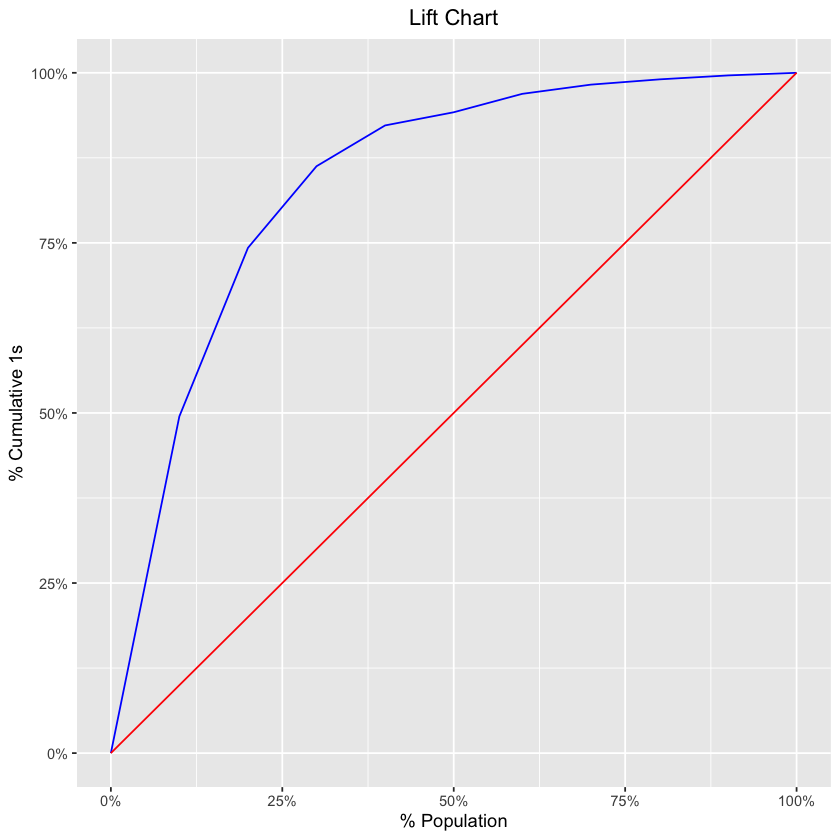

In [ ]:
model %>%
    blr_gains_table() %>%
    plot()

##### ROC Curve

ROC curve is a graphical representation of the validity of cut-offs for a logistic regression model. The ROC curve is plotted using the sensitivity and specificity for all possible cut-offs, i.e., all the probability scores. The graph is plotted using sensitivity on the y-axis and 1-specificity on the x-axis. Any point on the ROC curve represents a sensitivity X (1-specificity) measure corresponding to a cut-off. The area under the ROC curve is used as a validation measure for the model – the bigger the area the better is the model.

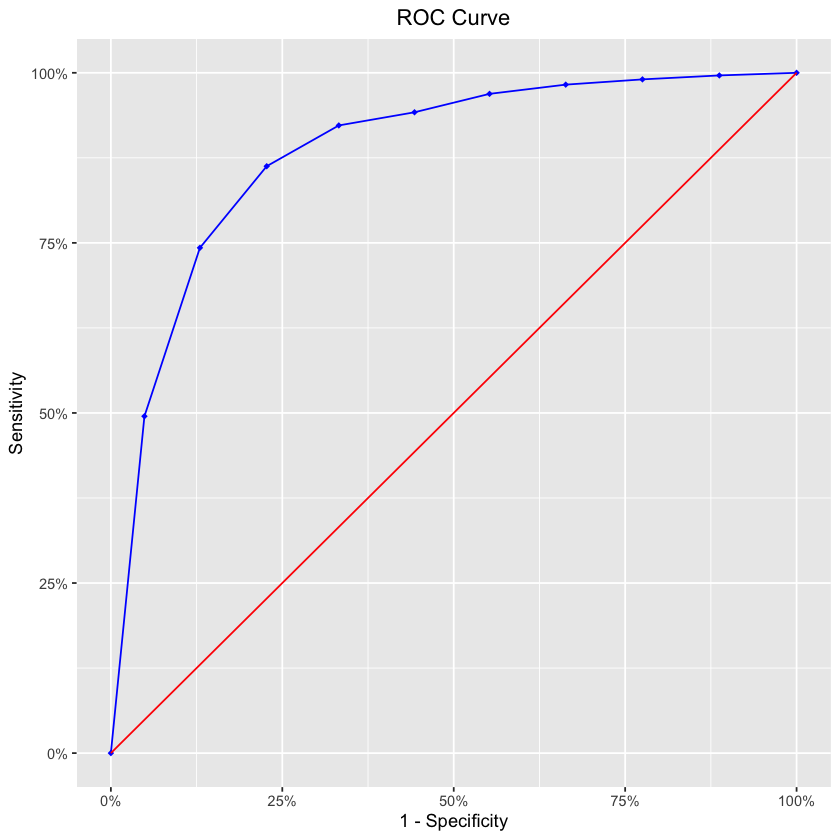

In [ ]:
model %>%
    blr_gains_table() %>%
  blr_roc_curve()

##### KS Chart

The KS Statistic is again a measure of model efficiency, and it is created using the lift curve. The lift curve is created to plot % events. If we also plot % non-events on the same scale, with % population at x-axis, we would get another curve. The maximum distance between the lift curve for events and that for non-events is termed as KS. For a good model, KS should be big (>=0.3) and should occur as close to the event rate as possible.

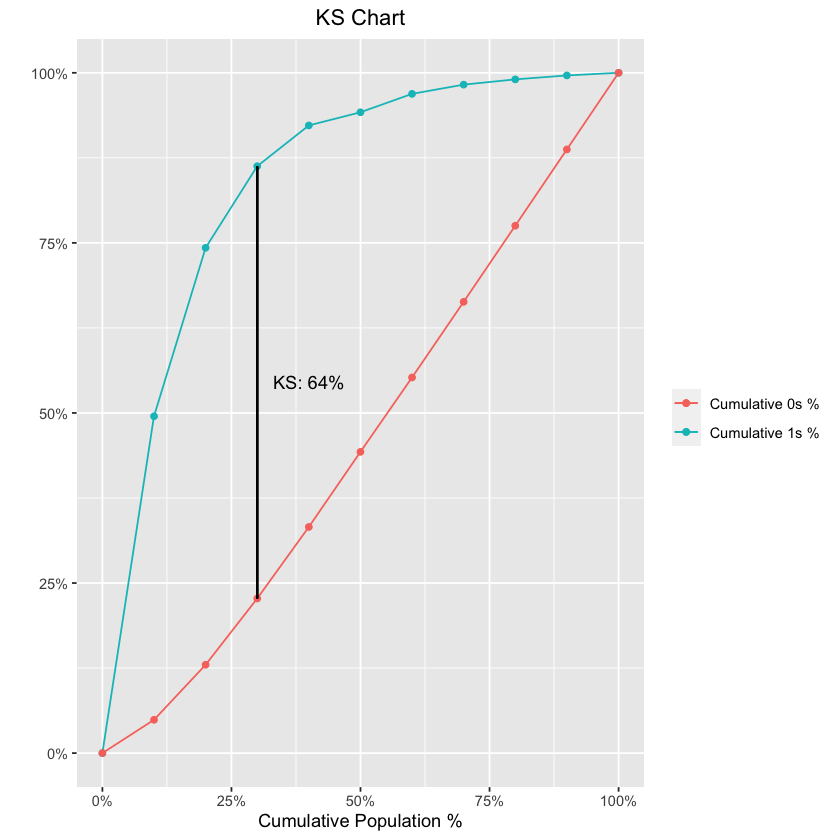

In [ ]:
model %>%
    blr_gains_table() %>%
  blr_ks_chart()

##### Decile Lift Chart

The decile lift chart displays the lift over the global mean event rate for each decile. For a model with good discriminatory power, the top deciles should have an event/conversion rate greater than the global mean.

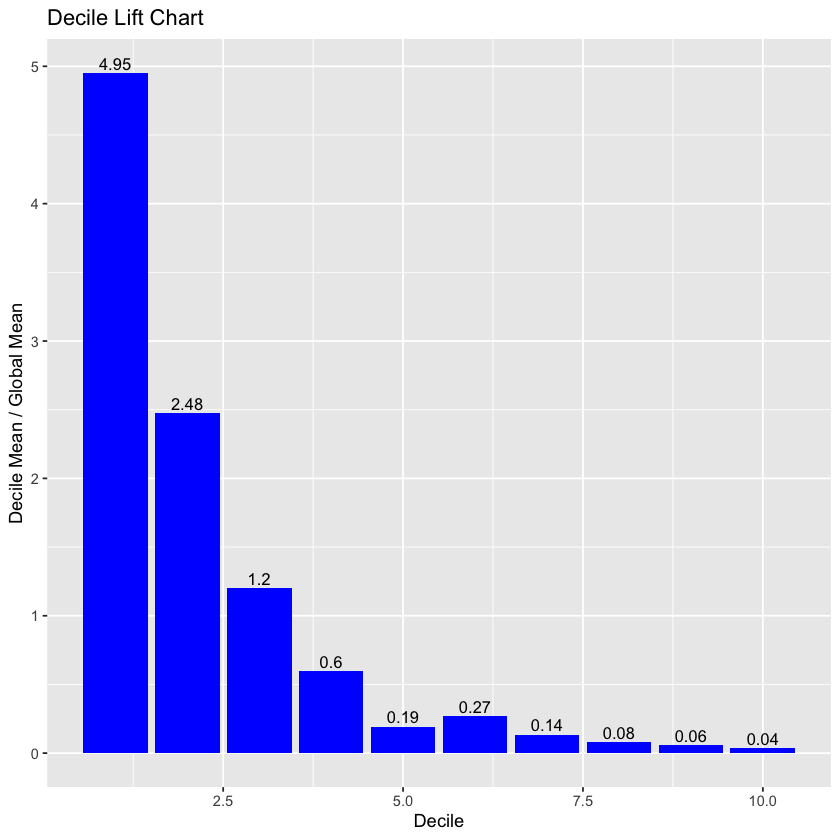

In [ ]:
model %>%
  blr_gains_table() %>%
  blr_decile_lift_chart()

##### Capture Rate by Decile

If the model has good discriminatory power, the top deciles should have a higher event/conversion rate compared to the bottom deciles.

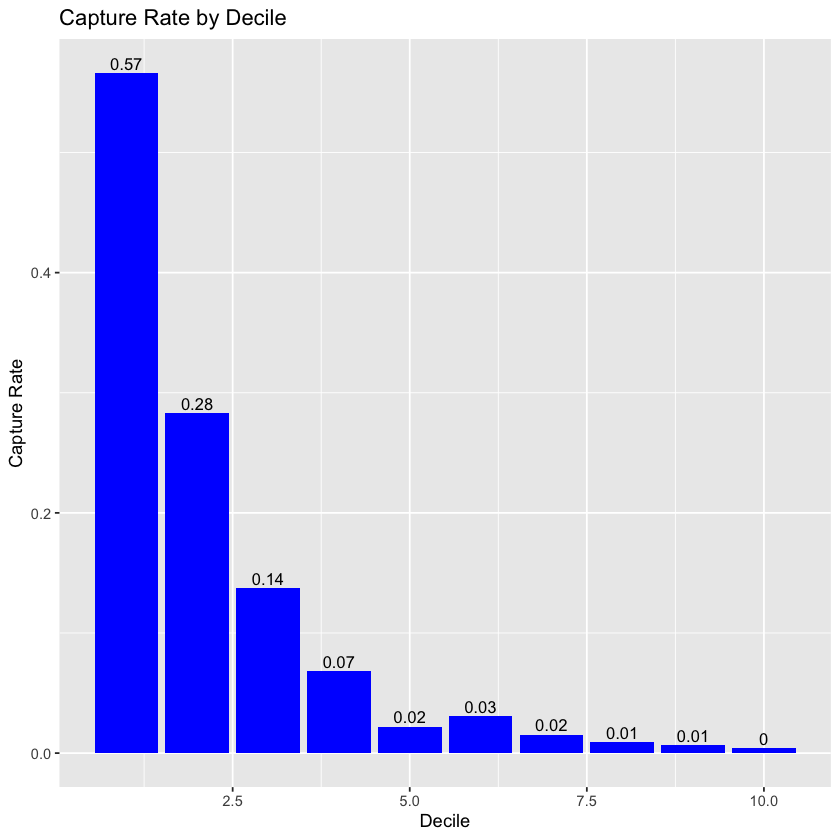

In [ ]:
model %>%
  blr_gains_table() %>%
  blr_decile_capture_rate()

##### Lorenz Curve

The Lorenz curve is a simple graphic device which illustrates the degree of inequality in the distribution of thevariable concerned. It is a visual representation of inequality used to measure the discriminatory power of the predictive model.

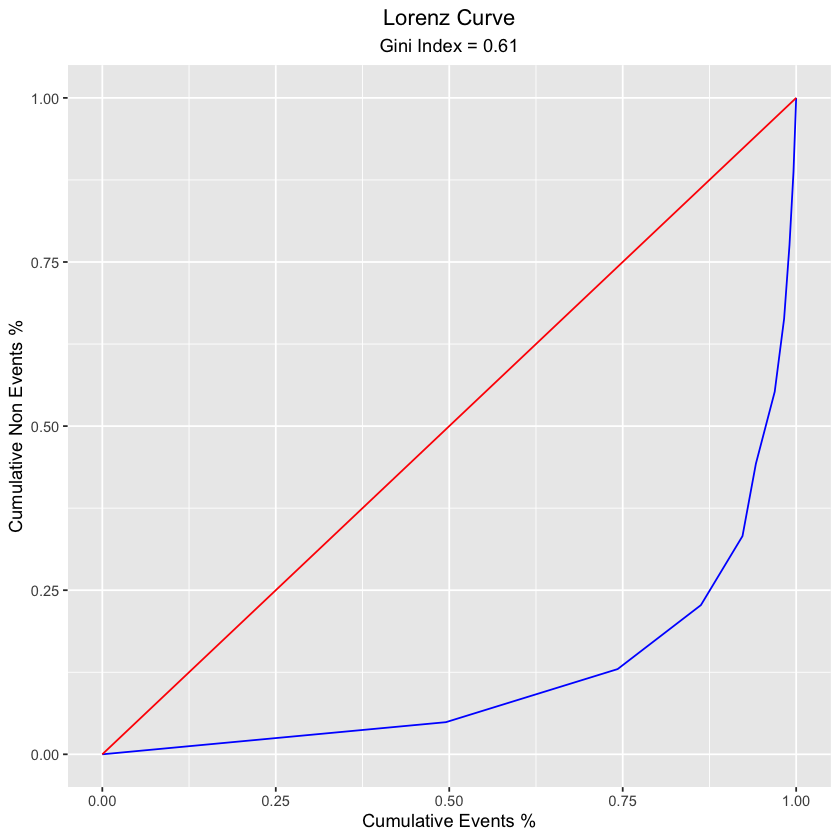

In [ ]:
blr_lorenz_curve(model)

#### Residual & Influence Diagnostics

blorr can generate 22 plots for residual, influence and leverage diagnostics.

##### Influence Diagnostics

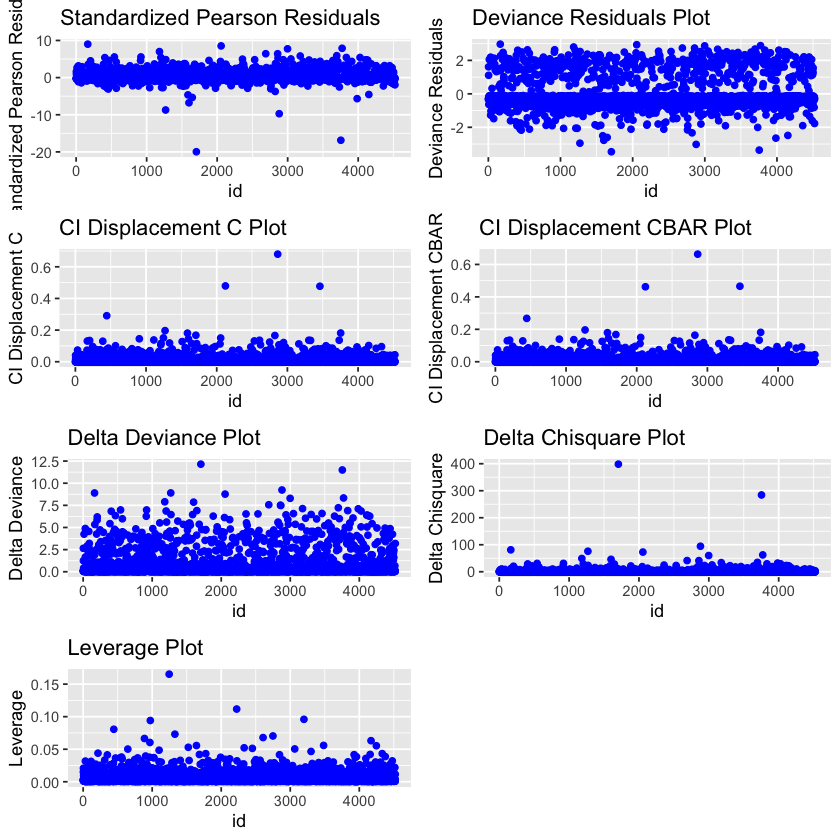

In [ ]:
blr_plot_diag_influence(model)

##### Leverage Diagnostics

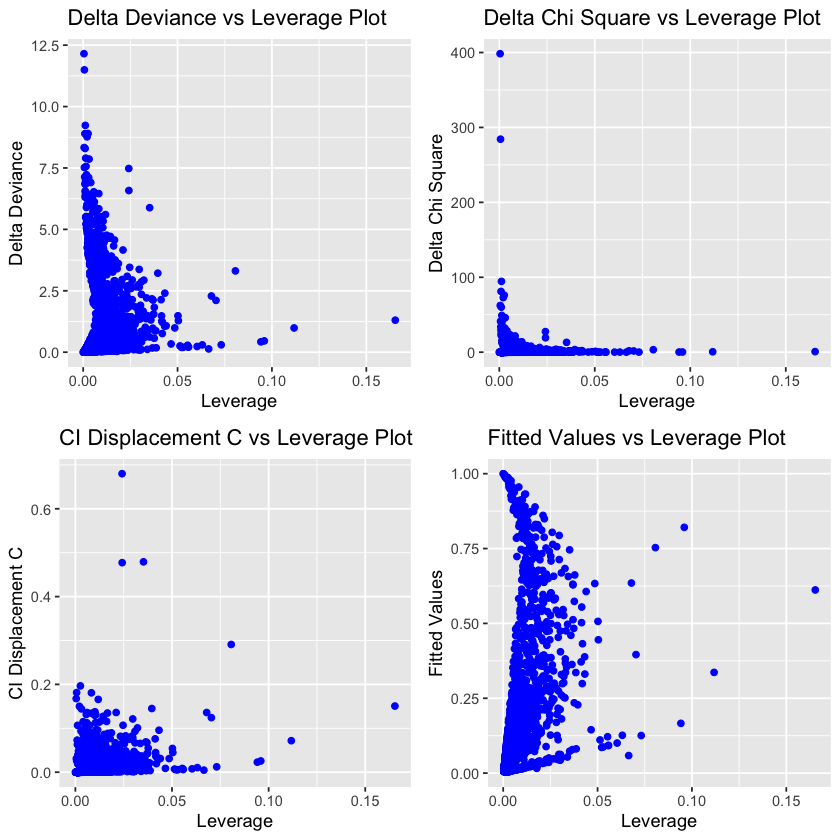

In [ ]:
blr_plot_diag_leverage(model)

##### Fitted Values Diagnostics

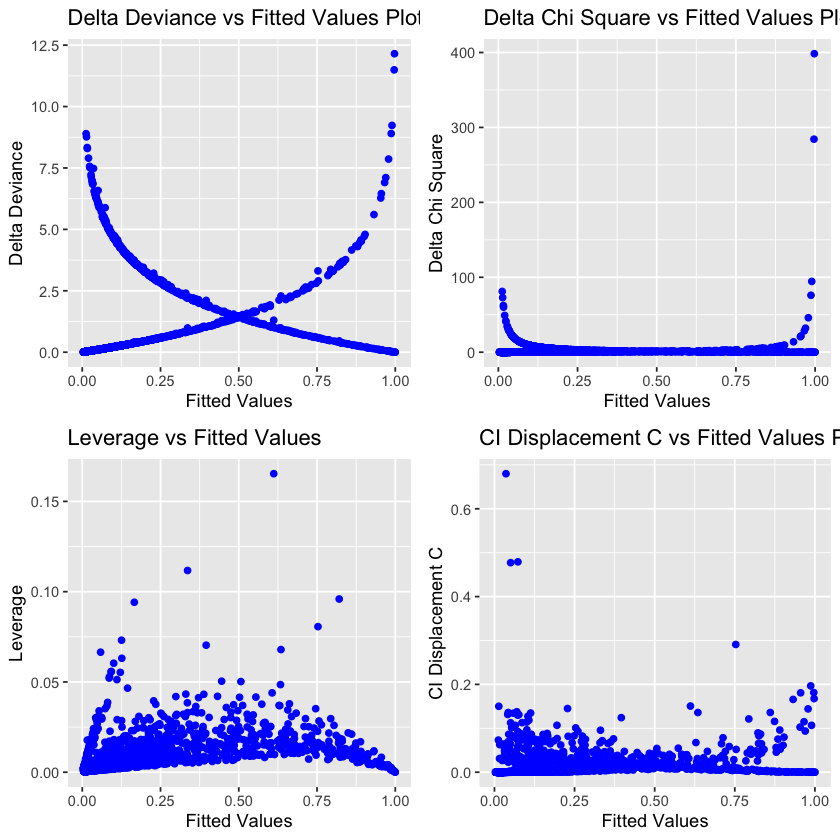

In [ ]:
blr_plot_diag_fit(model)